In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
def normalizer(dataframe):
    return (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min() )

In [3]:
soldpermonth = pd.read_csv('datasets/saveprogress-classifysales-foreach-category.csv')
soldpermonth['date'] = pd.to_datetime(soldpermonth['date'])
soldpermonth.set_index('date',inplace=True)
soldpermonth


100 PROOF VODKA  100% AGAVE TEQUILA  AGED DARK RUM  \
date                                                             
2012-01-03              110                   0              0   
2012-01-04               89                   0              0   
2012-01-05              108                   0              0   
2012-01-06                0                   0              0   
2012-01-07                0                   0              0   
...                     ...                 ...            ...   
2023-08-27                0                   0              0   
2023-08-28                0                 300             25   
2023-08-29                0                 731             42   
2023-08-30                0                 432             37   
2023-08-31                0                 598             33   

            AMARETTO - IMPORTED  AMERICAN ALCOHOL  AMERICAN AMARETTO  \
date                                                                   
2012-01-03                    0                51                 94   
2012-01-04                    0                46                 78   
2012-01-05                    0                28                 63   
2012-01-06                    0                 0                  0   
2012-01-07                    0                 0                  0   
...                         ...               ...                ...   
2023-08-27                    0                 0                  0   
2023-08-28                    0                 0                  0   
2023-08-29                    0                 0                  0   
2023-08-30                    0                 0                  0   
2023-08-31                    0                 0                  0   

            AMERICAN BRANDIES  AMERICAN COCKTAILS  \
date                                                
2012-01-03                  0                 422   
2012-01-04                  0                 459   
2012-01-05                  0                 375   
2012-01-06                  0                   0   
2012-01-07                  0                   0   
...                       ...                 ...   
2023-08-27                  0                   0   
2023-08-28                 67                   0   
2023-08-29                344                   0   
2023-08-30                145                   0   
2023-08-31                218                   0   

            AMERICAN CORDIALS & LIQUEURS  \
date                                       
2012-01-03                             0   
2012-01-04                             0   
2012-01-05                             0   
2012-01-06                             0   
2012-01-07                             0   
...                                  ...   
2023-08-27                             0   
2023-08-28                           120   
2023-08-29                           296   
2023-08-30                           204   
2023-08-31                           253   

            AMERICAN DISTILLED SPIRITS SPECIALTY  ...  TEQUILA  TRIPLE SEC  \
date                                              ...                        
2012-01-03                                     0  ...      428          62   
2012-01-04                                     0  ...      403          52   
2012-01-05                                     0  ...      436          49   
2012-01-06                                     0  ...        0           0   
2012-01-07                                     0  ...        0           0   
...                                          ...  ...      ...         ...   
2023-08-27                                     0  ...        0           0   
2023-08-28                                    20  ...        0          21   
2023-08-29                                    43  ...        0          38   
2023-08-30                                    39  ...        0          34   
2023-08-31       

In [7]:
mindate, maxdate = soldpermonth.index.min() - pd.Timedelta(days=1) ,soldpermonth.index.max()
mindate, maxdate

(Timestamp('2012-01-02 00:00:00'), Timestamp('2023-08-31 00:00:00'))

/tmp/ipykernel_9810/2220233431.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,10))


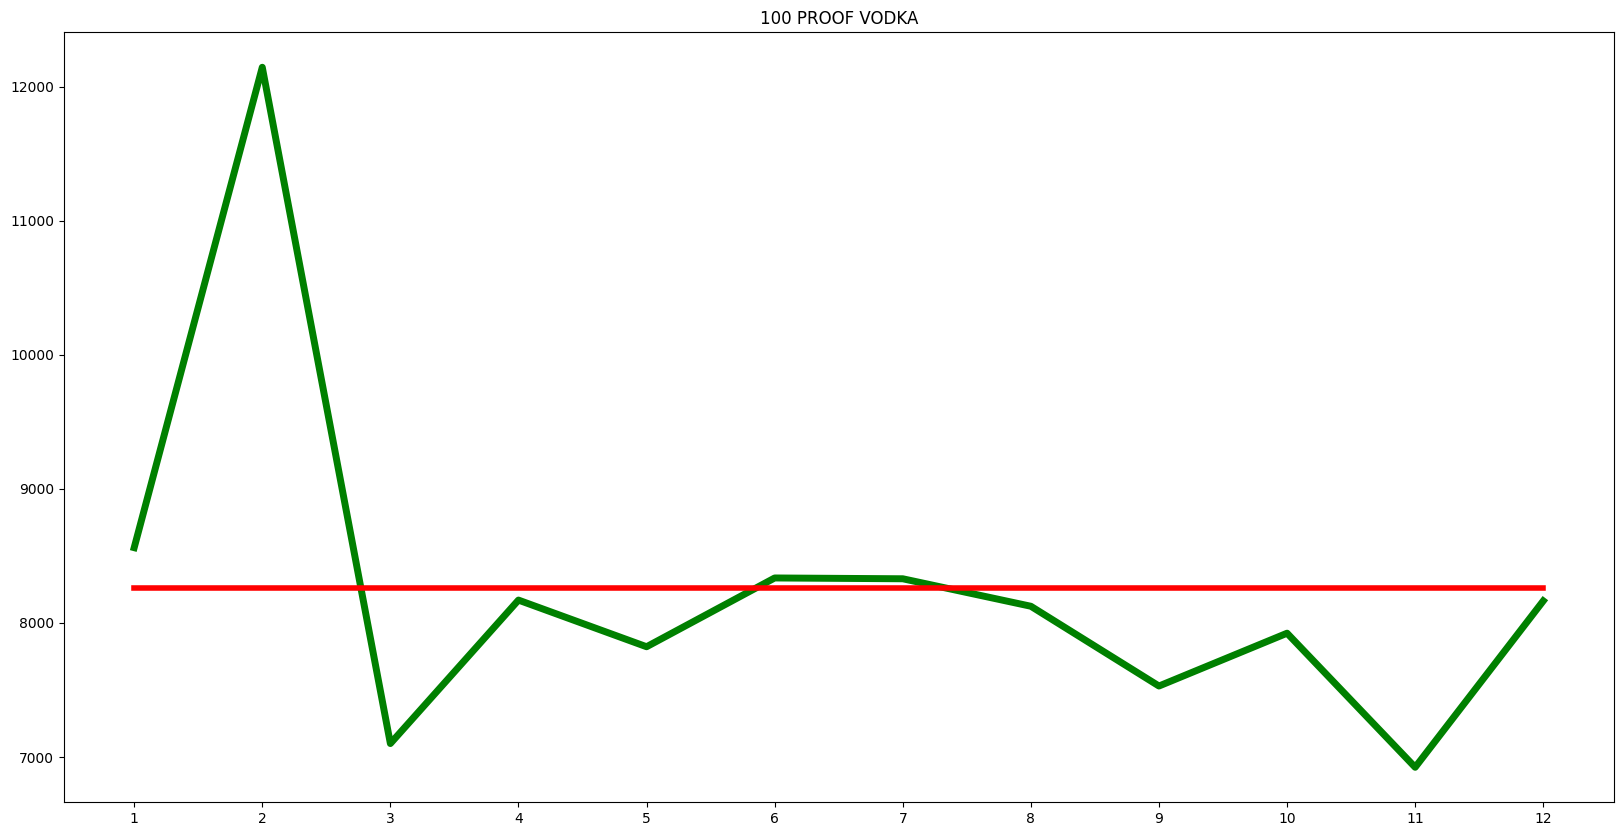

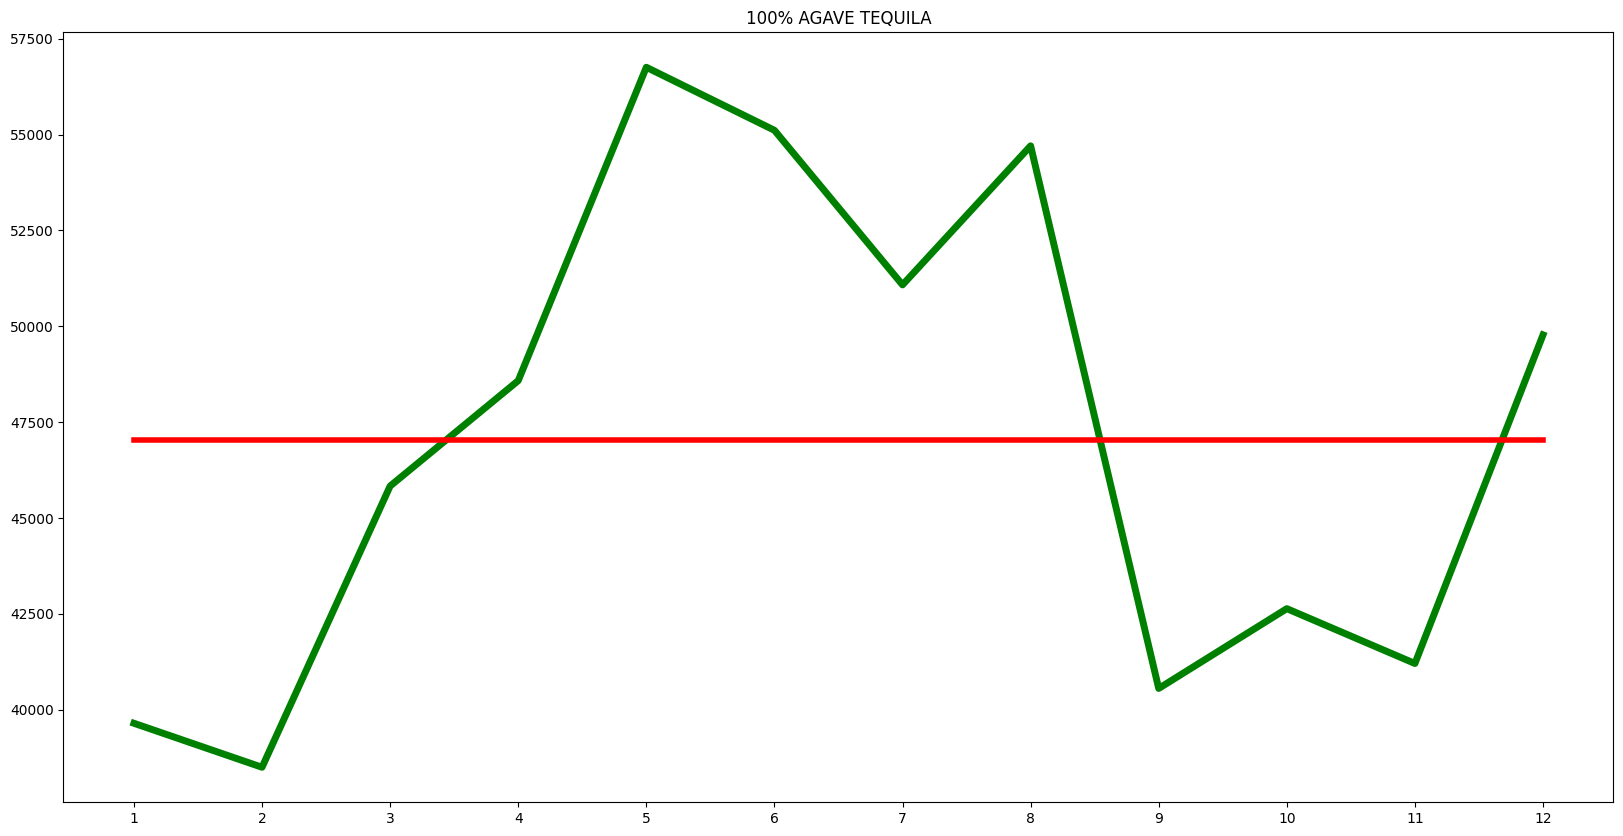

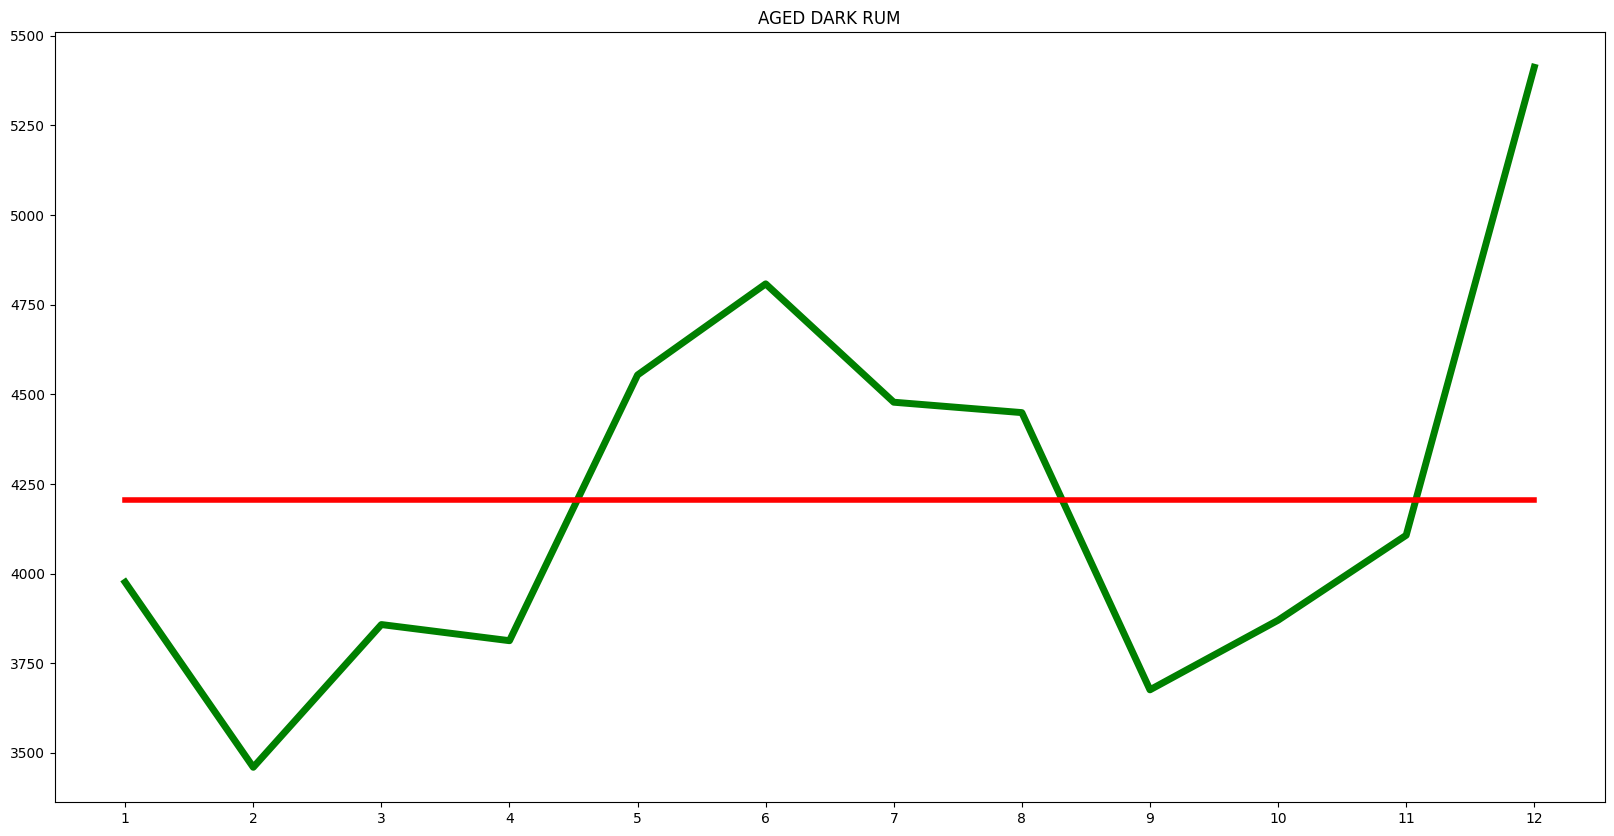

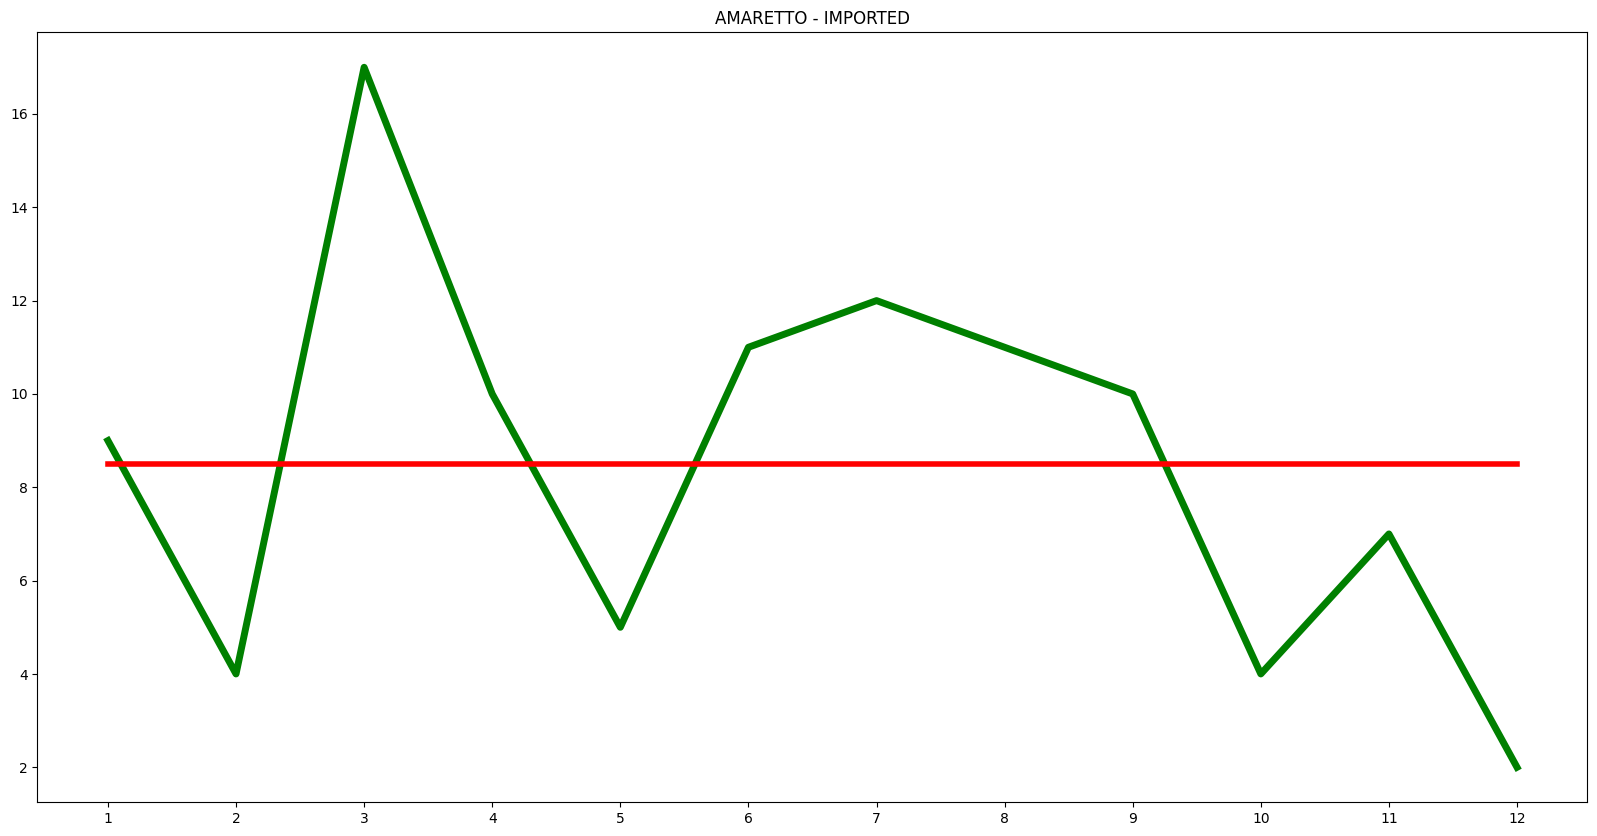

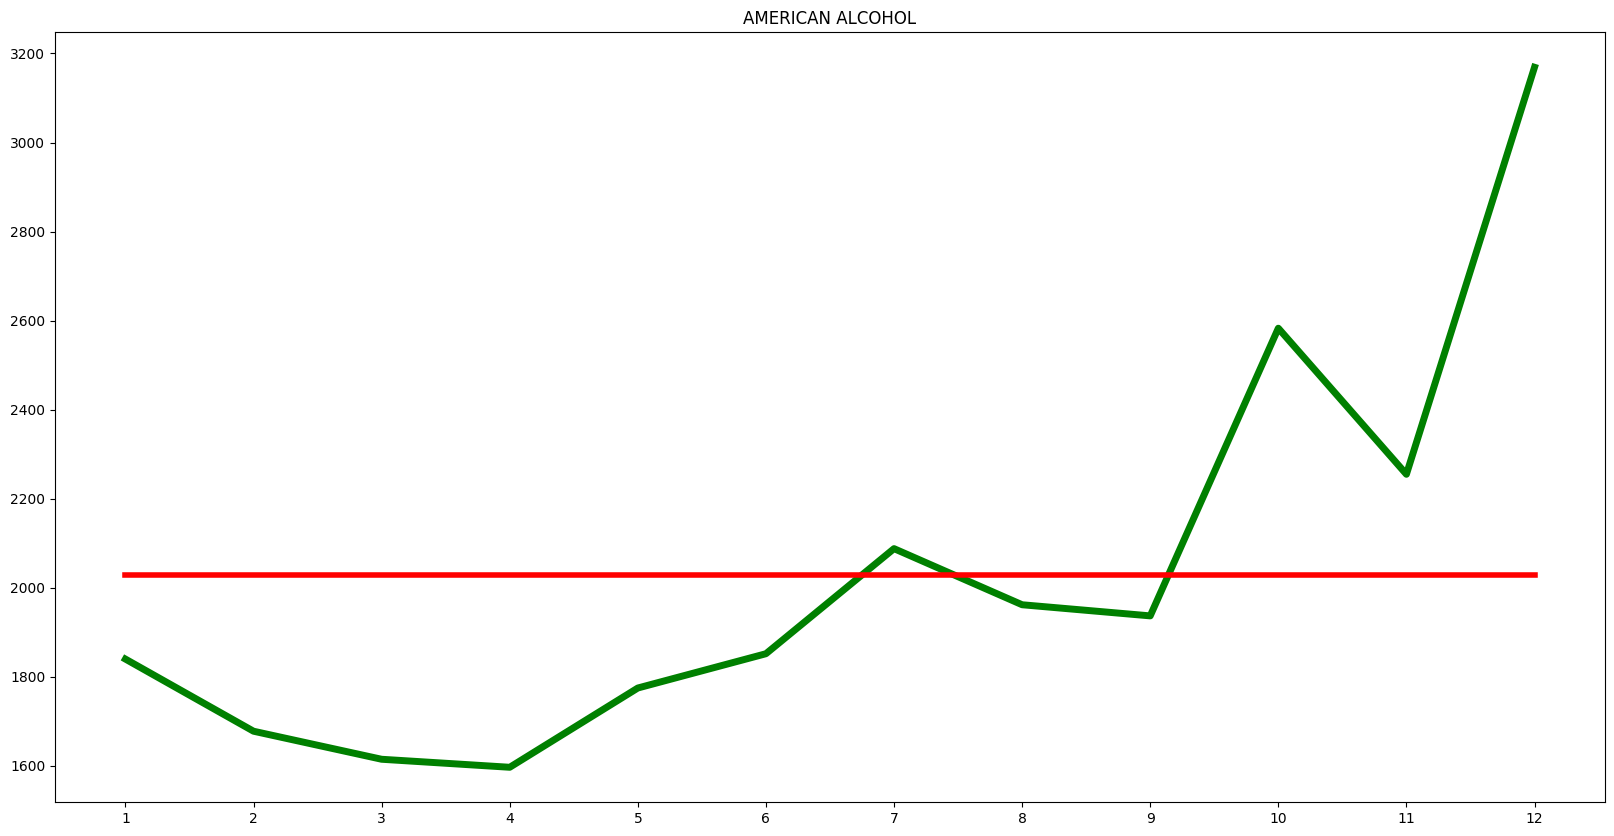

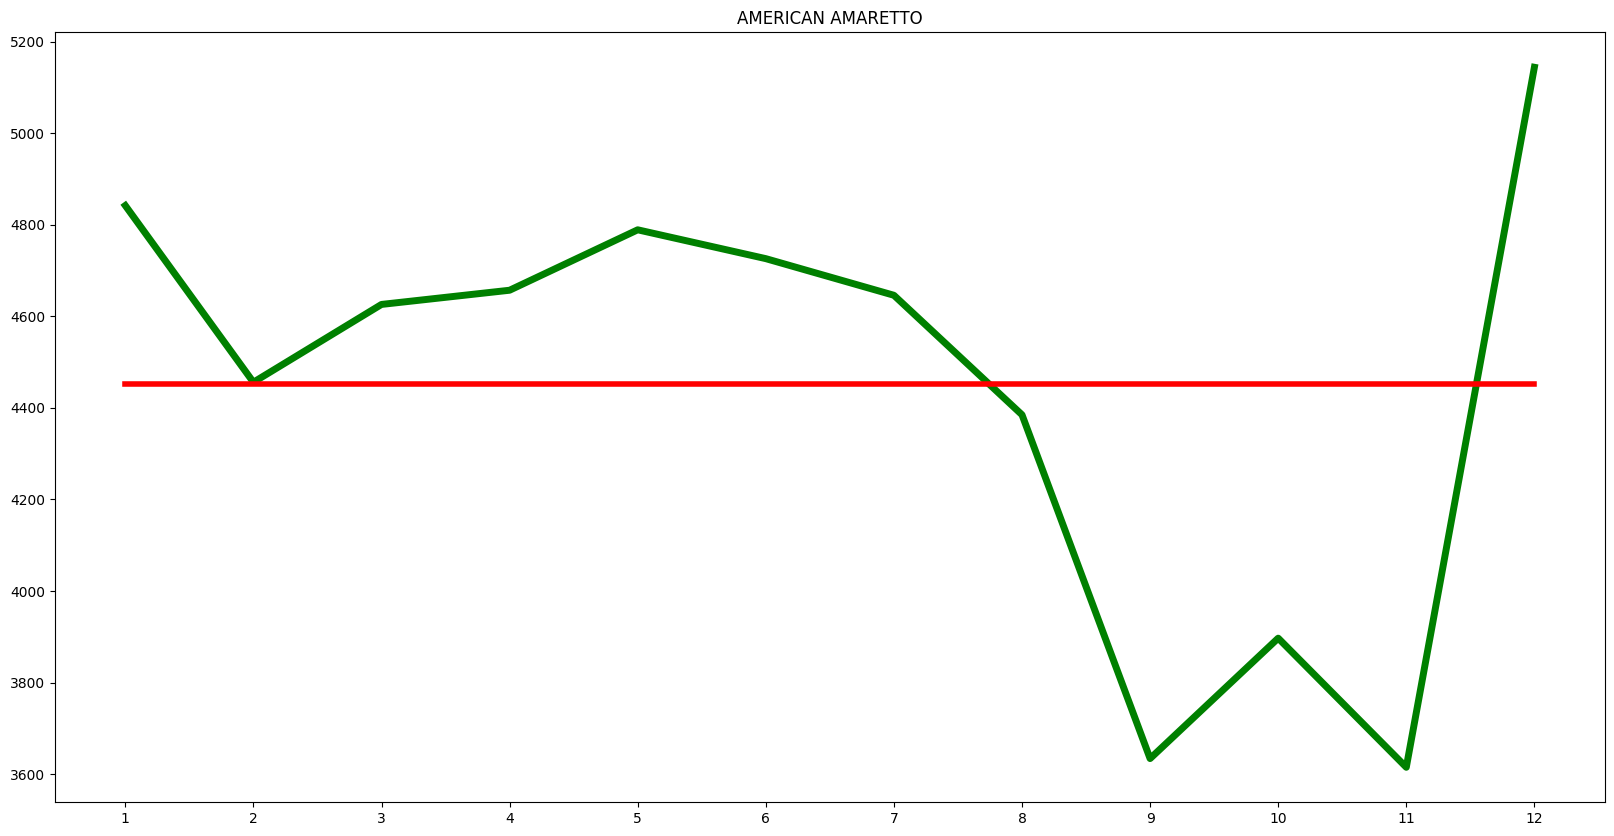

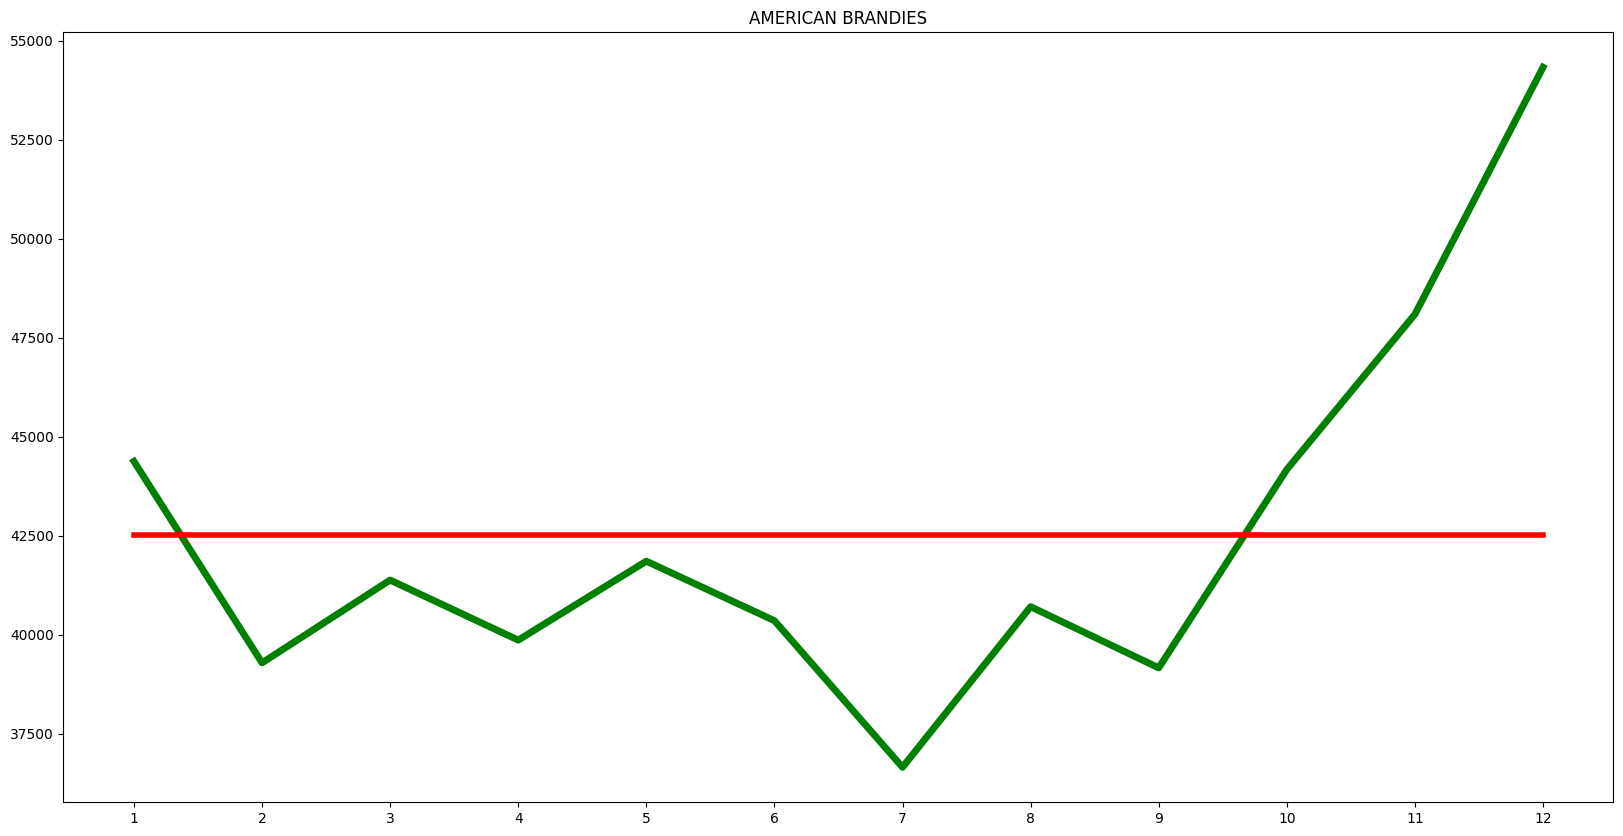

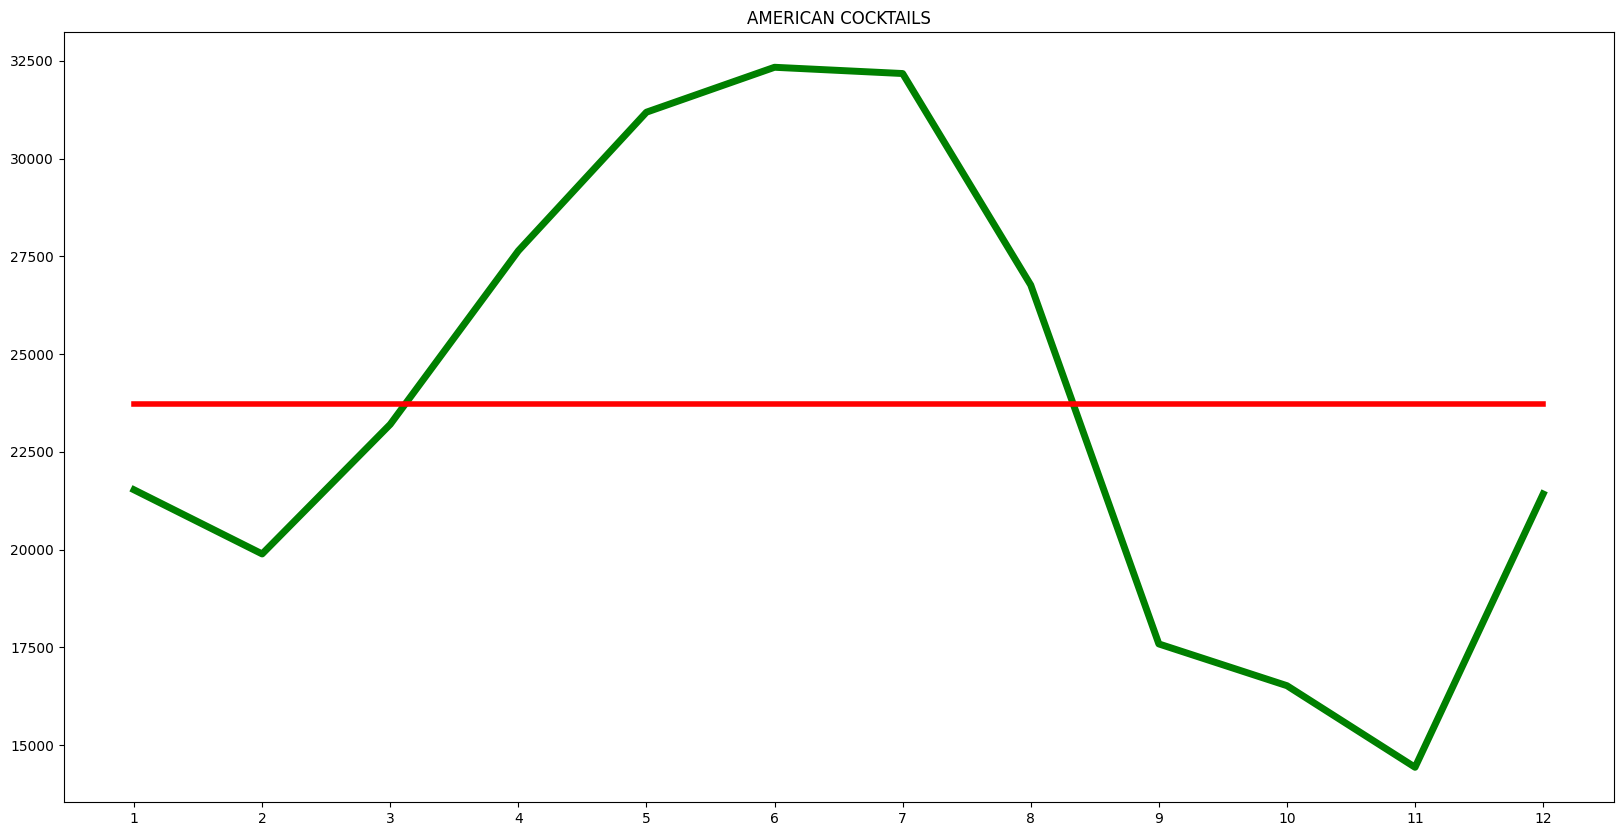

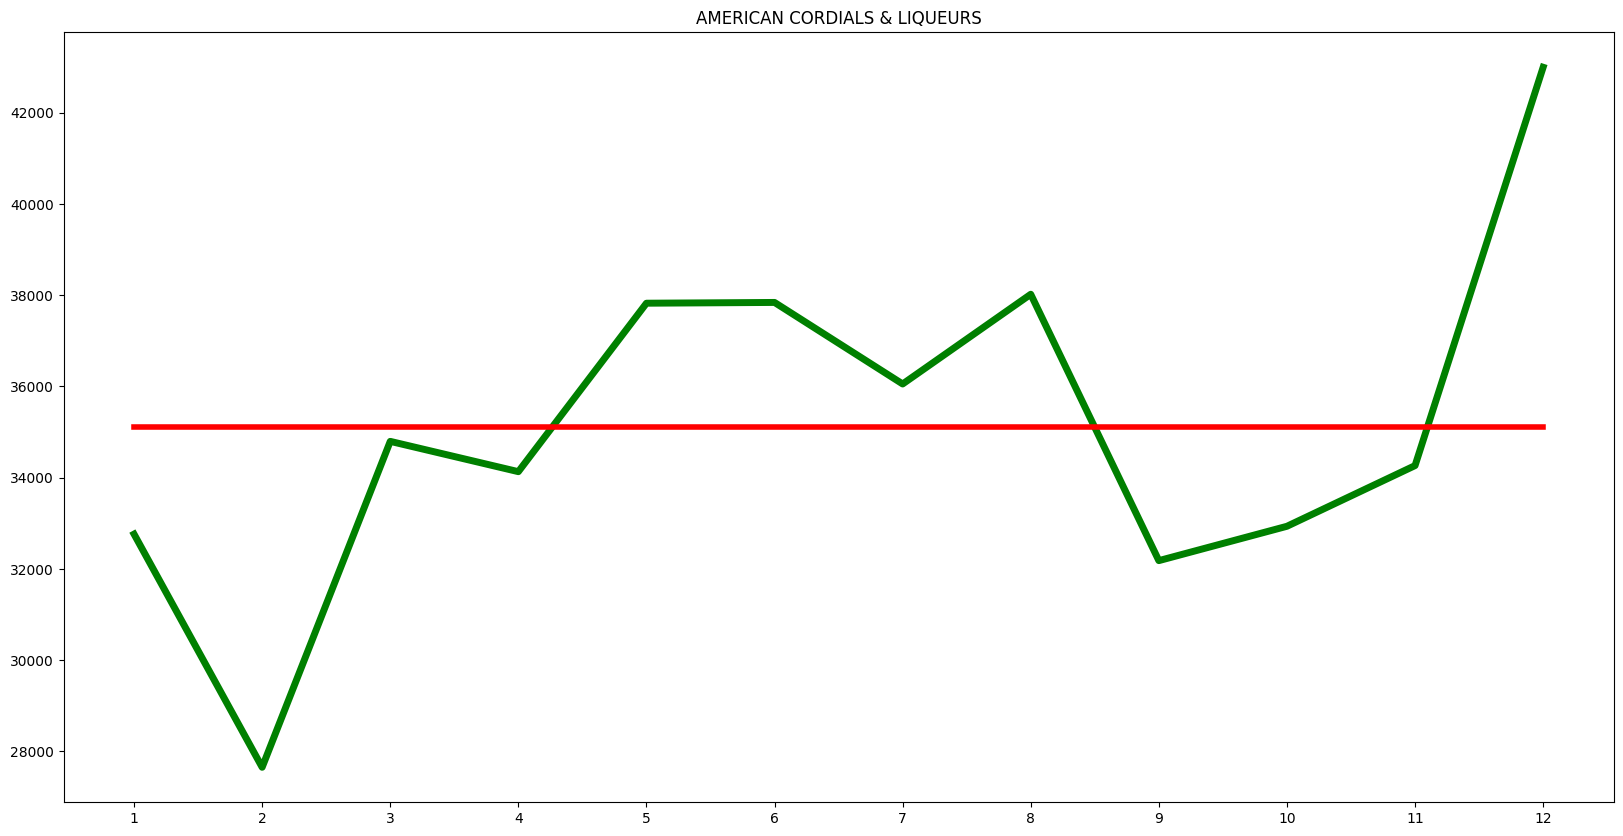

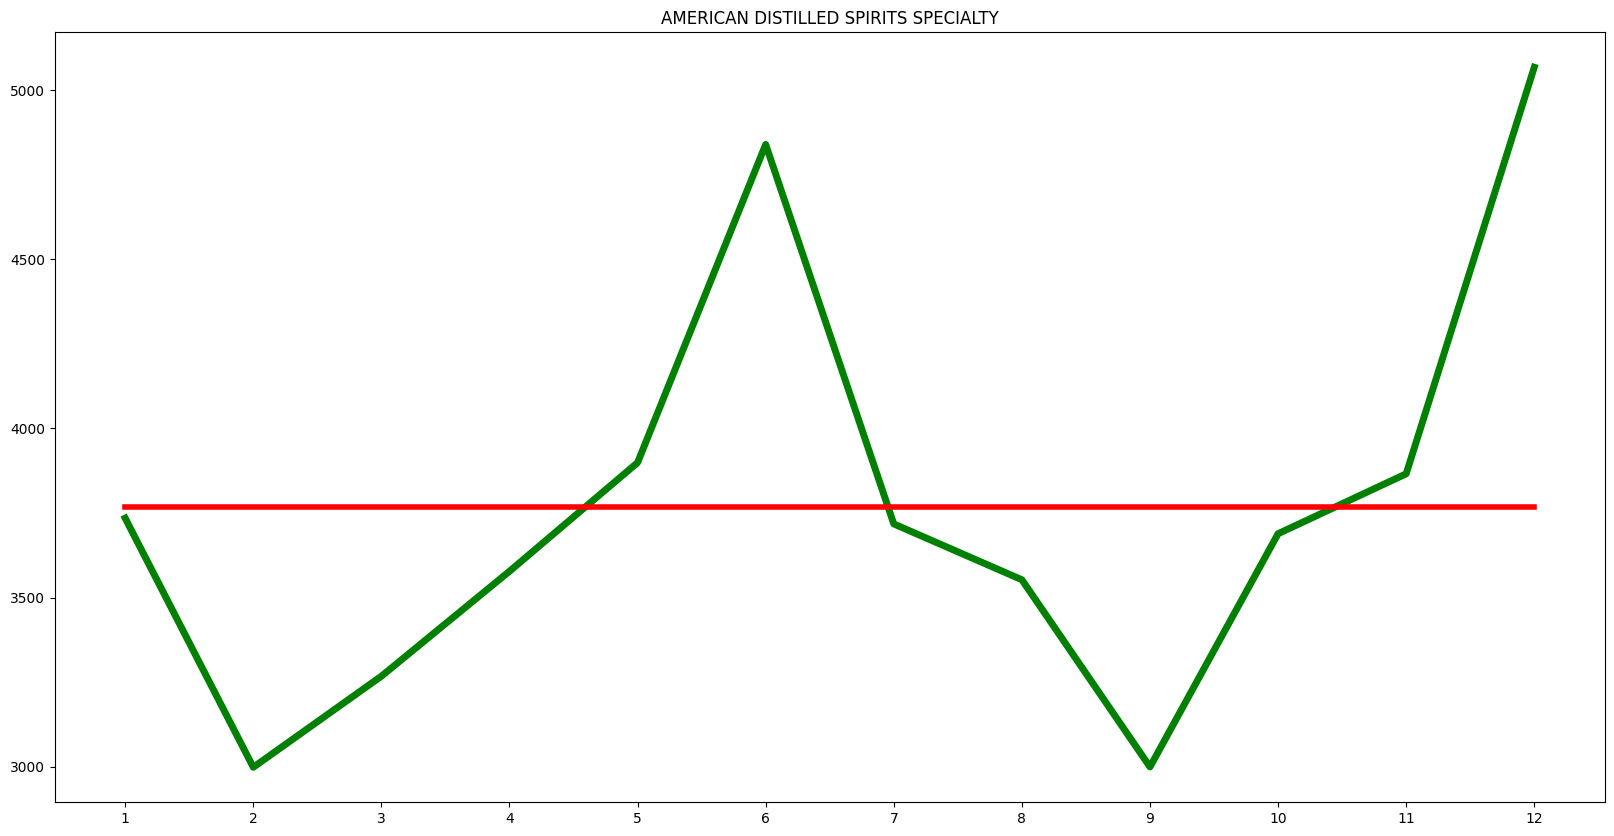

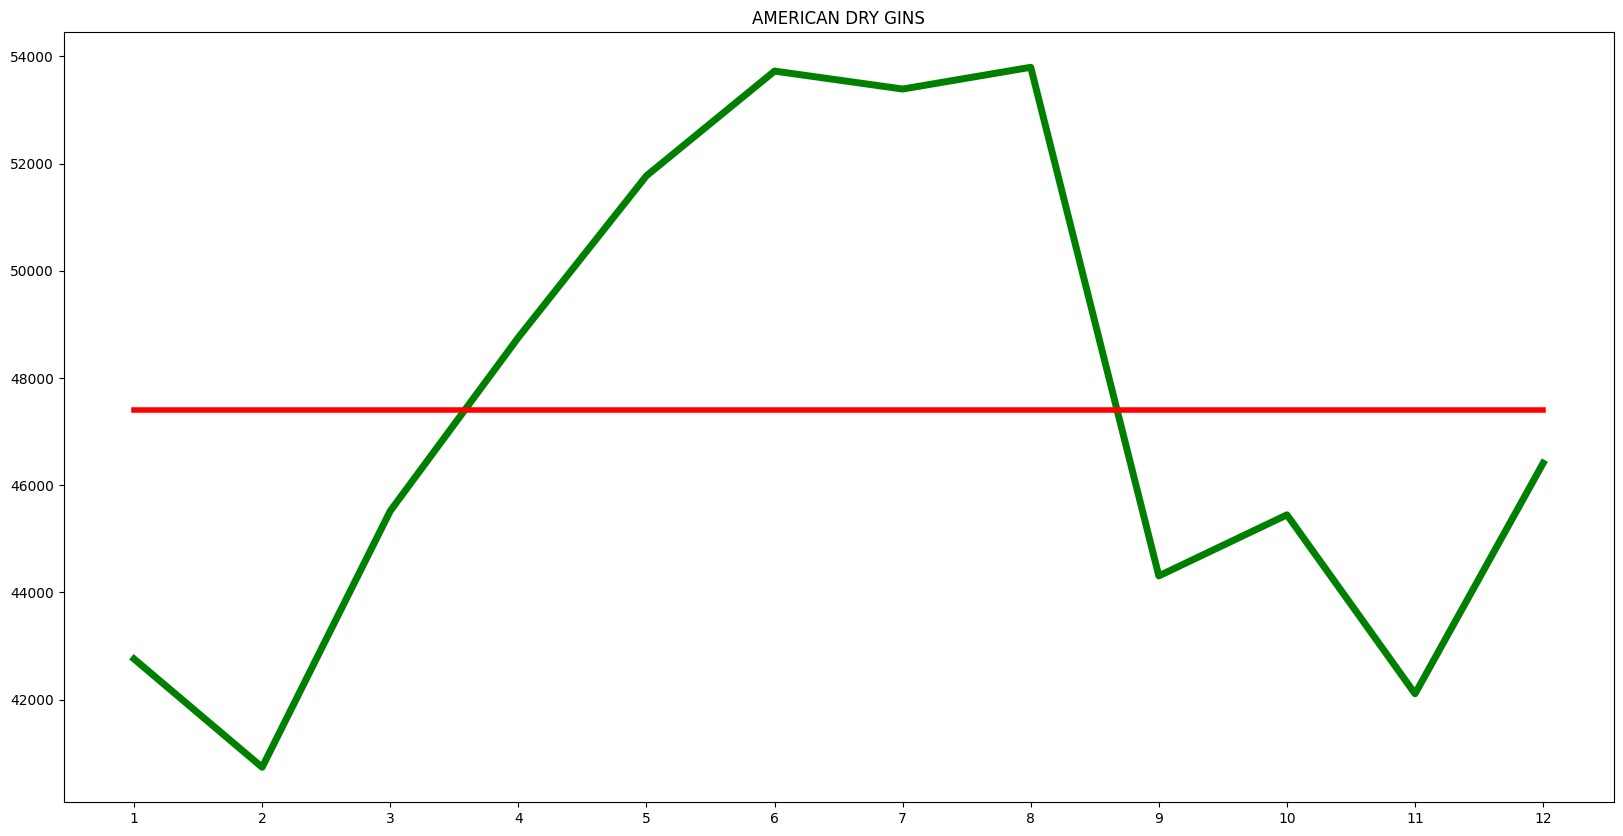

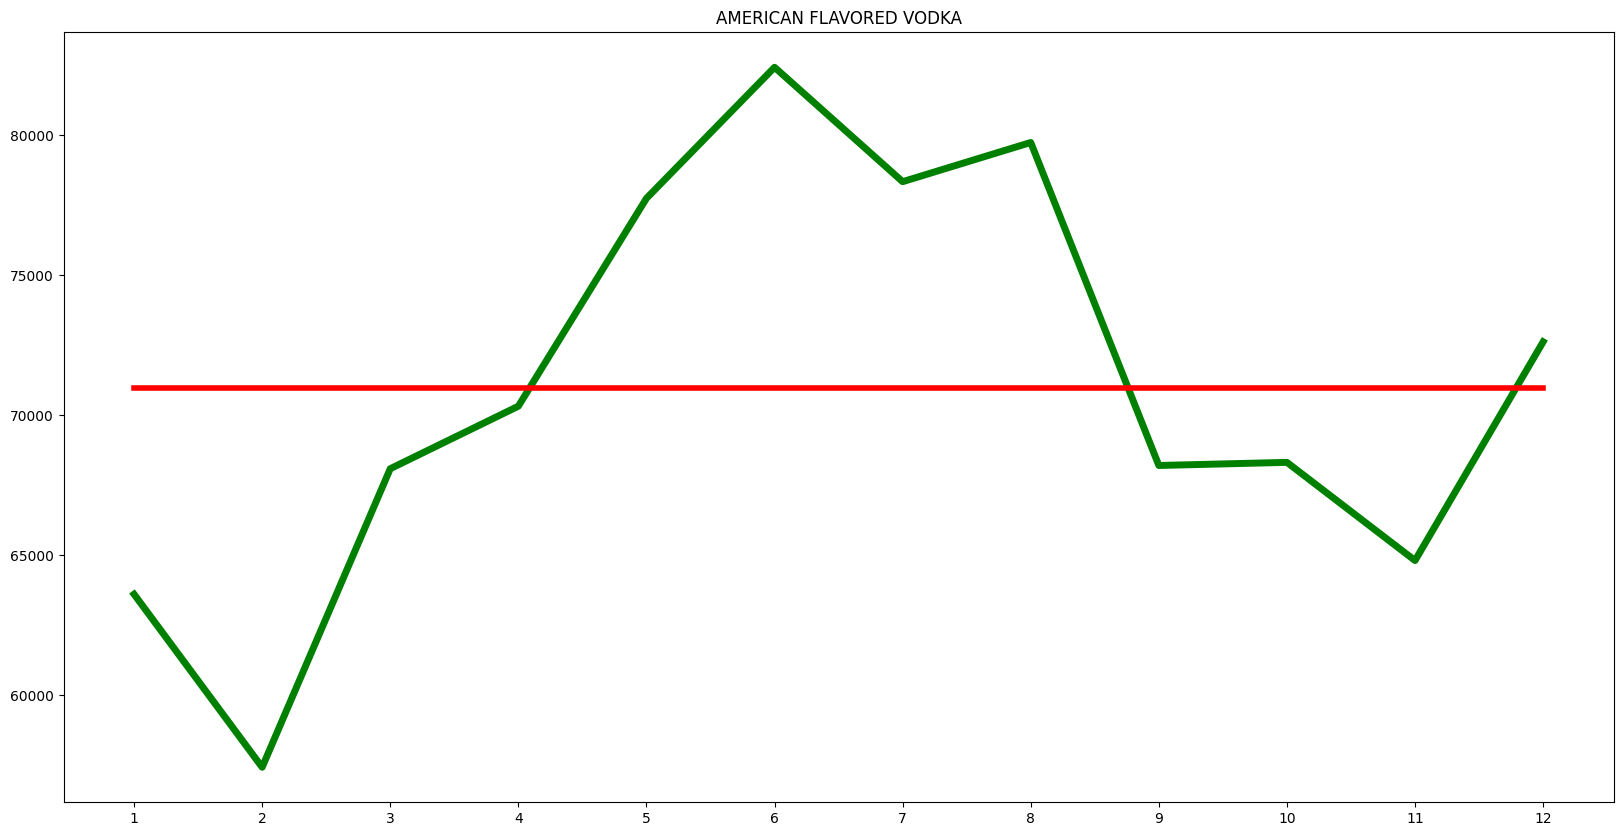

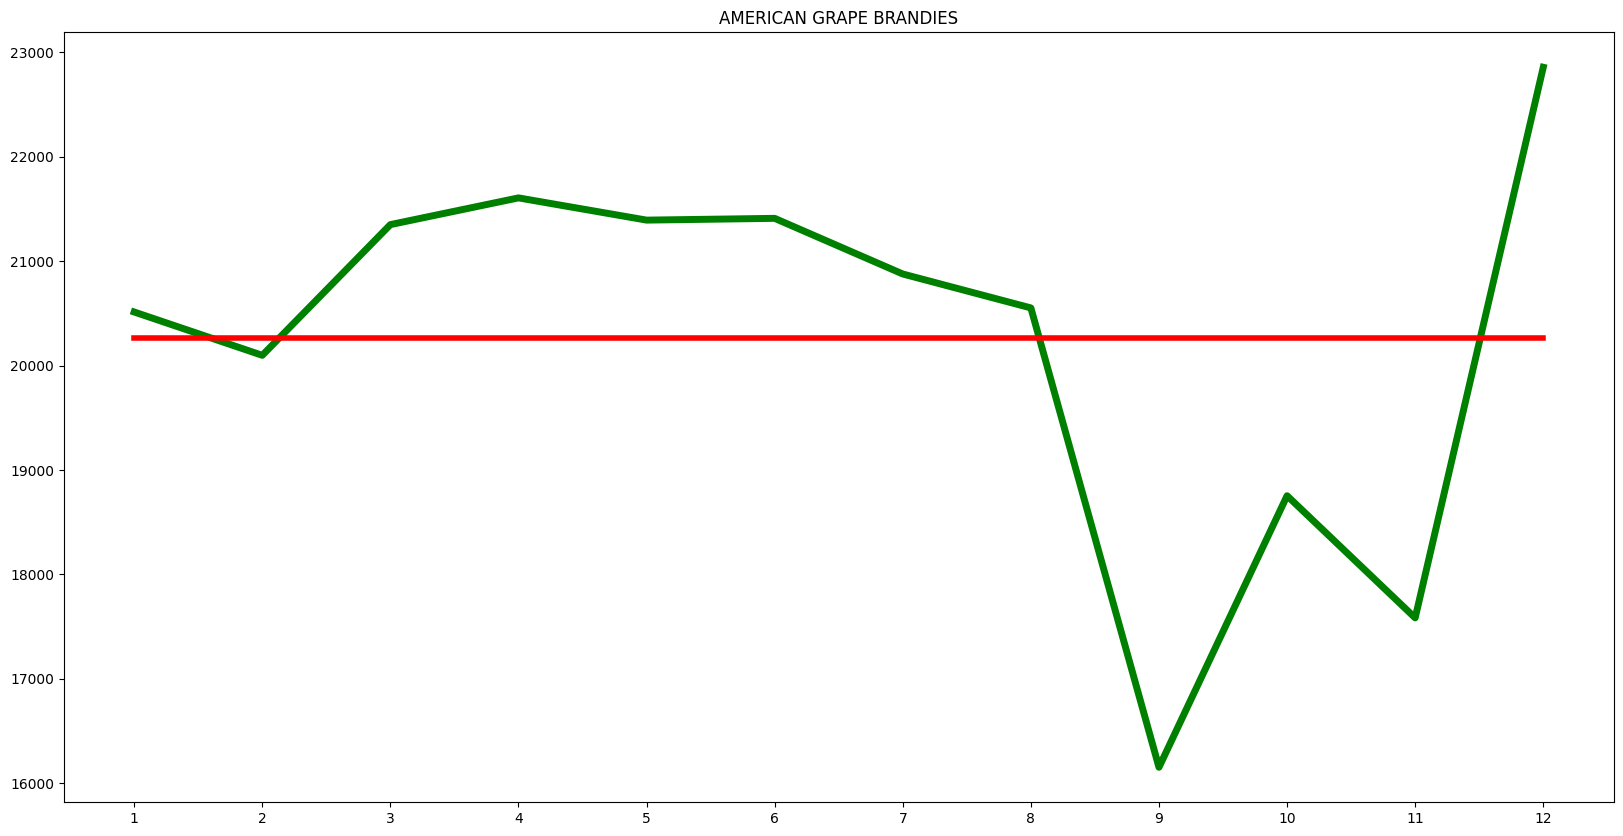

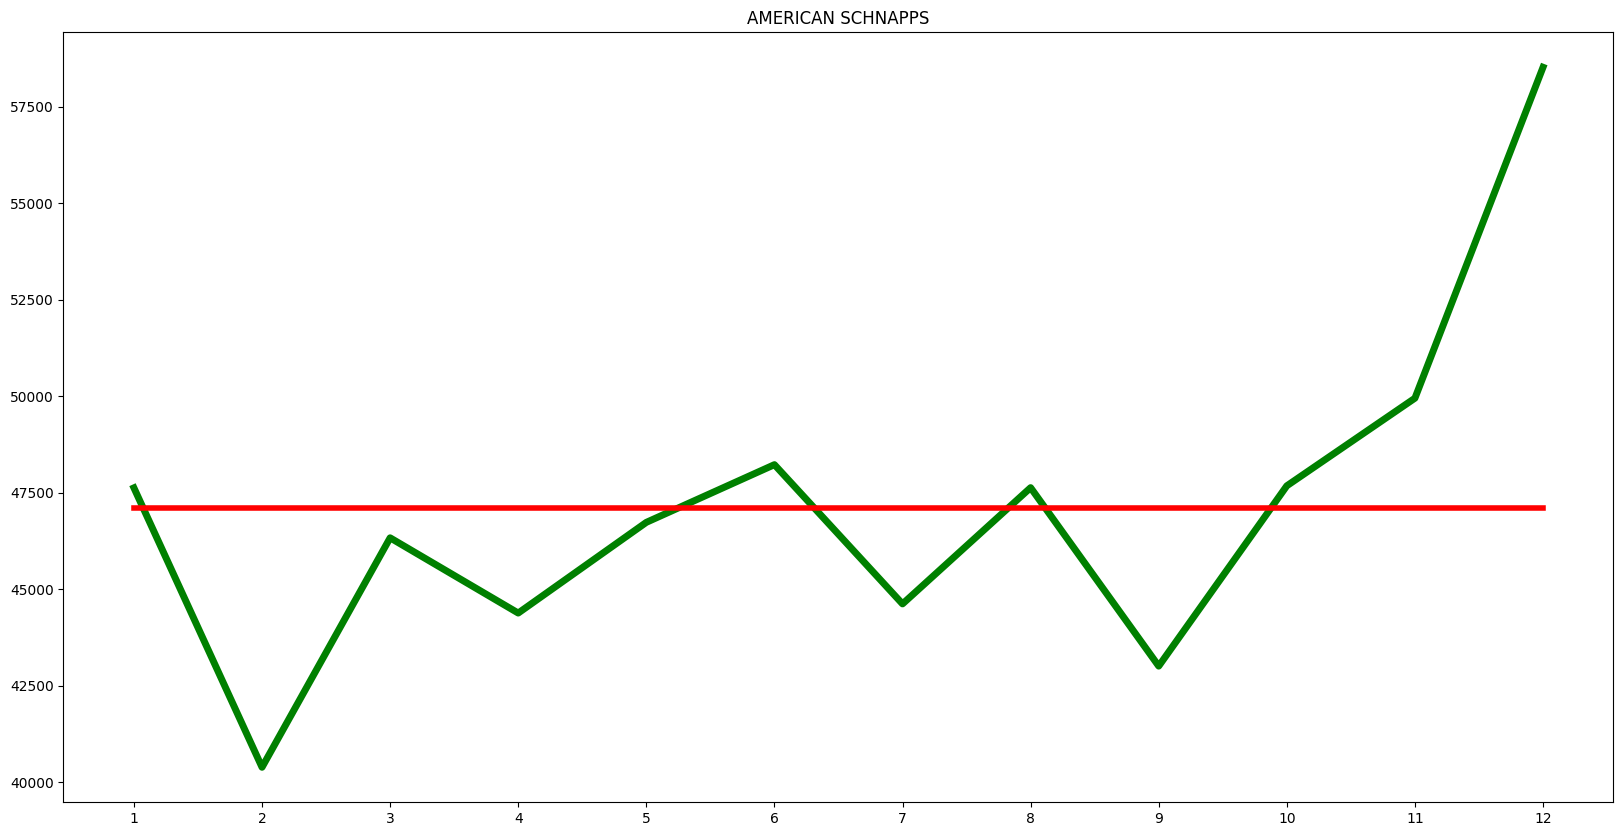

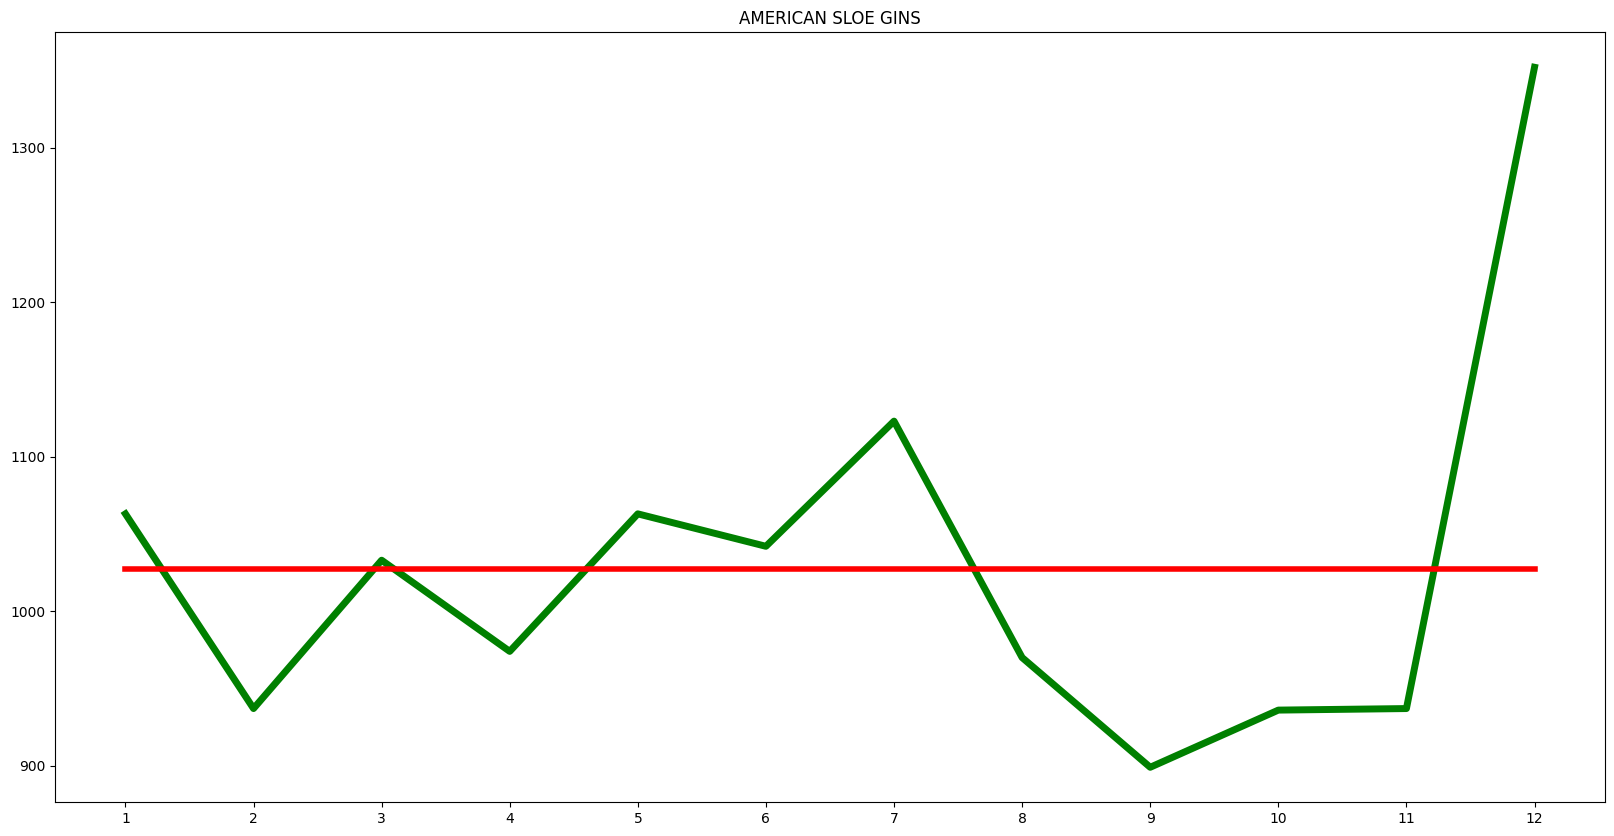

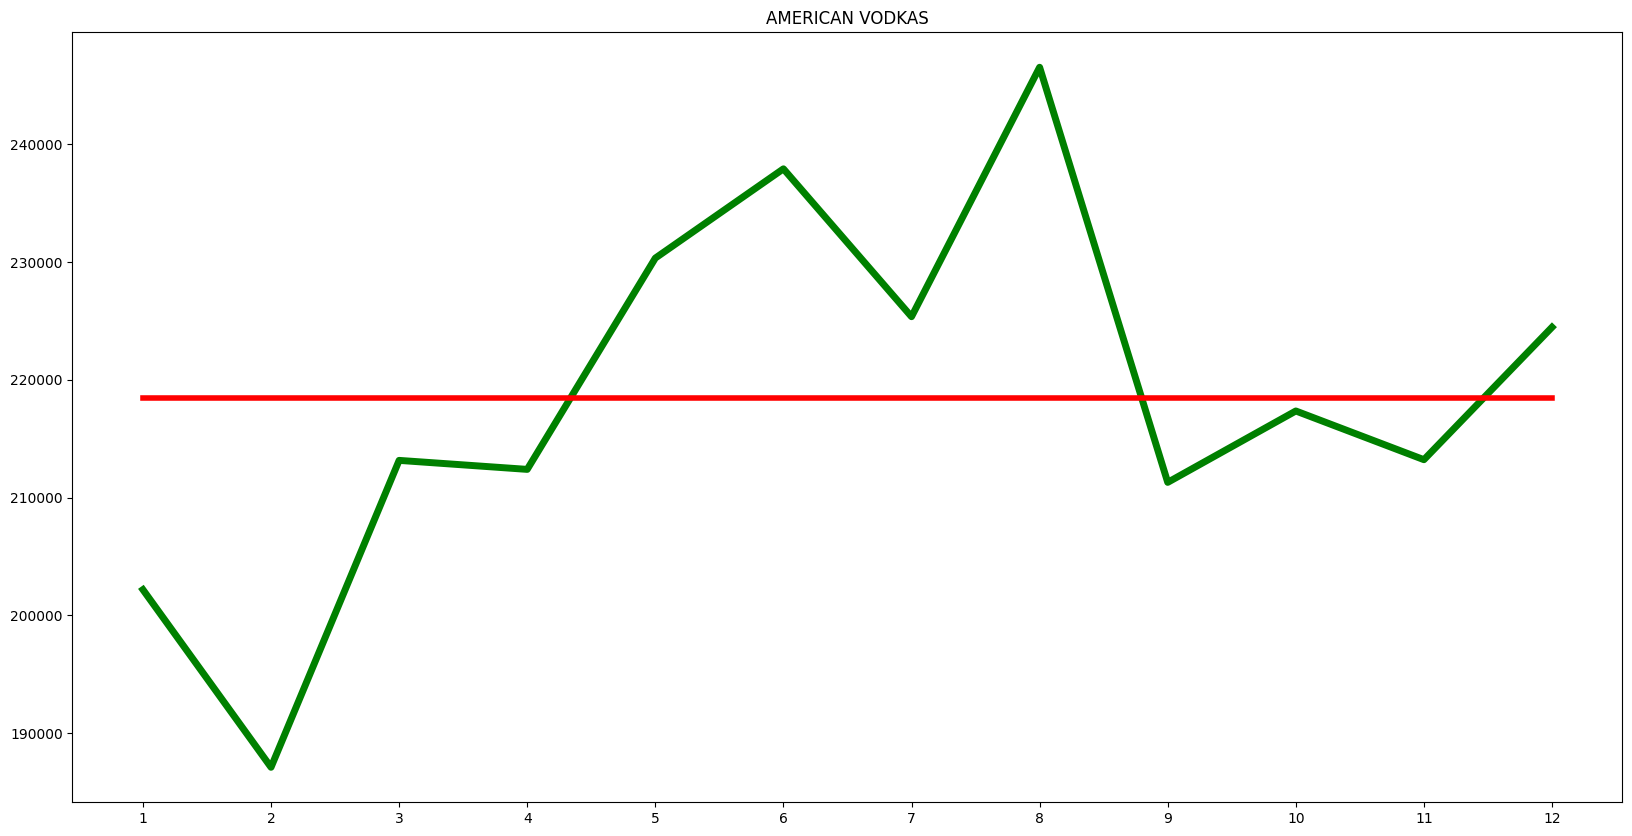

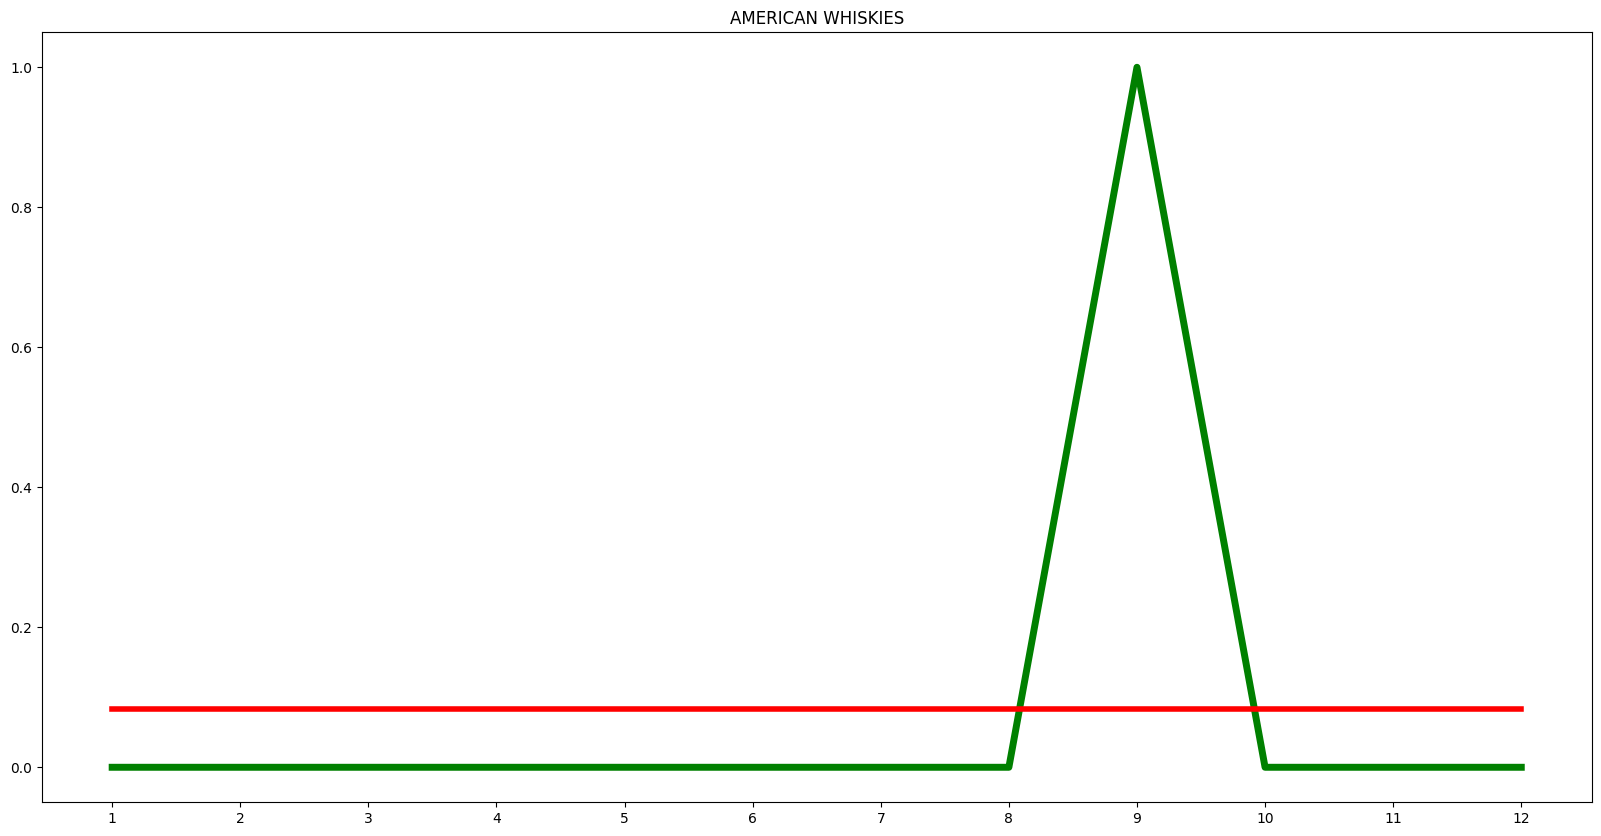

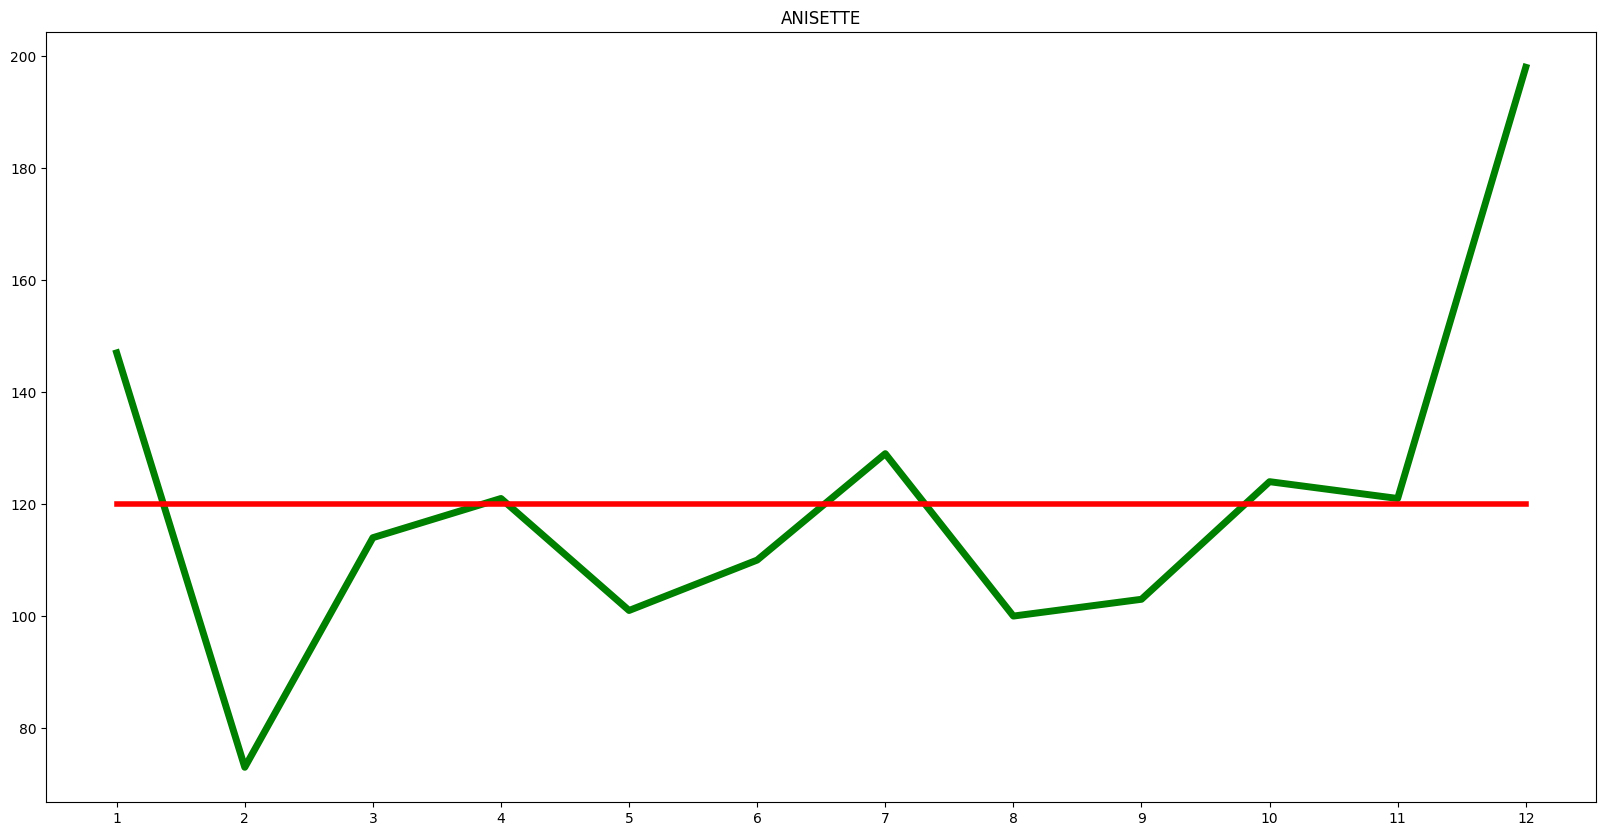

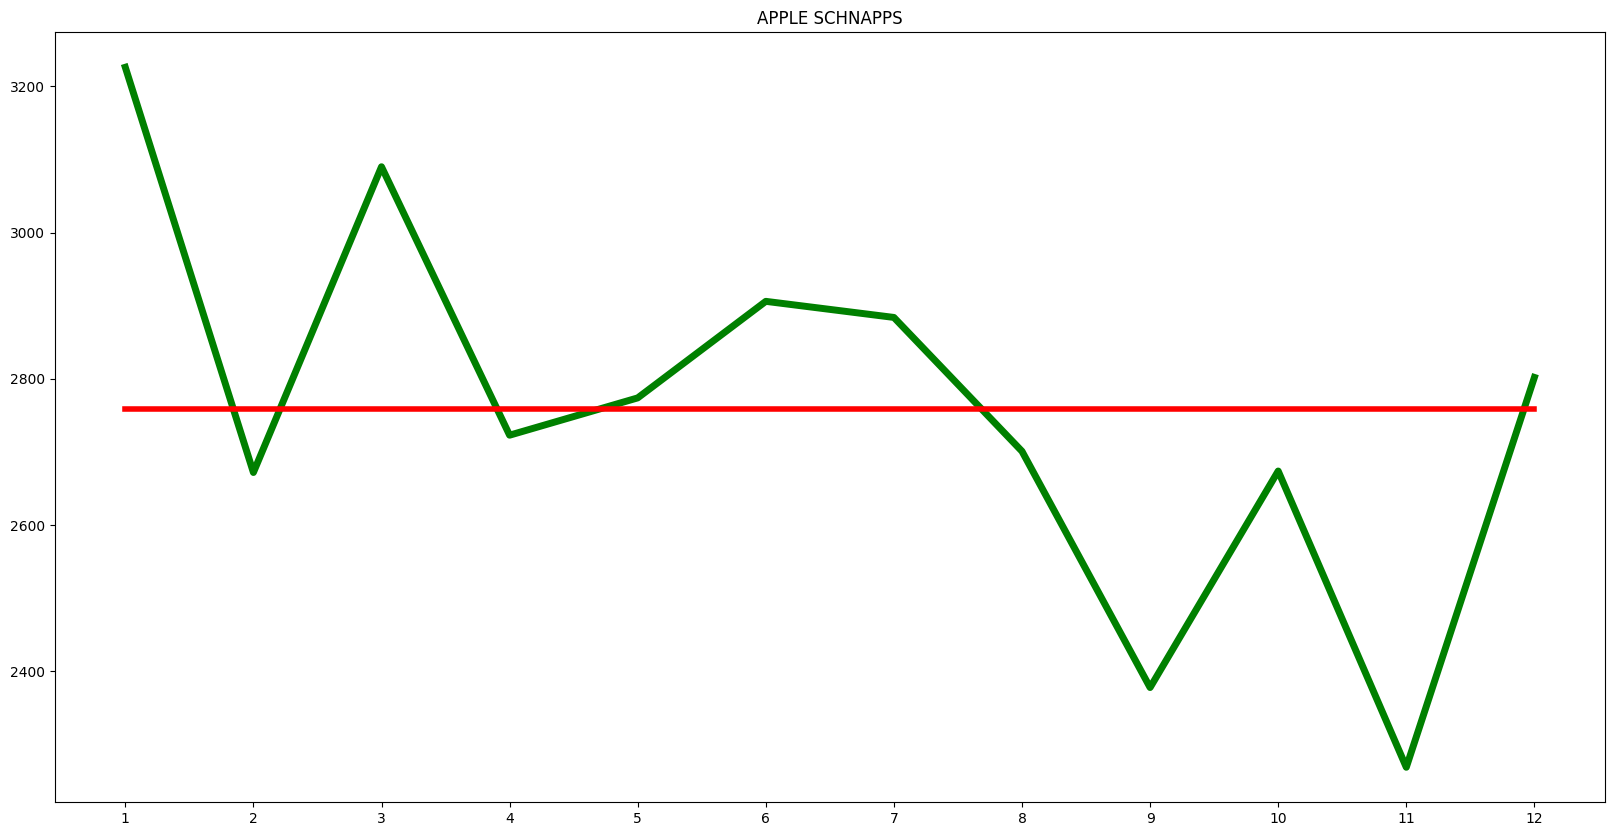

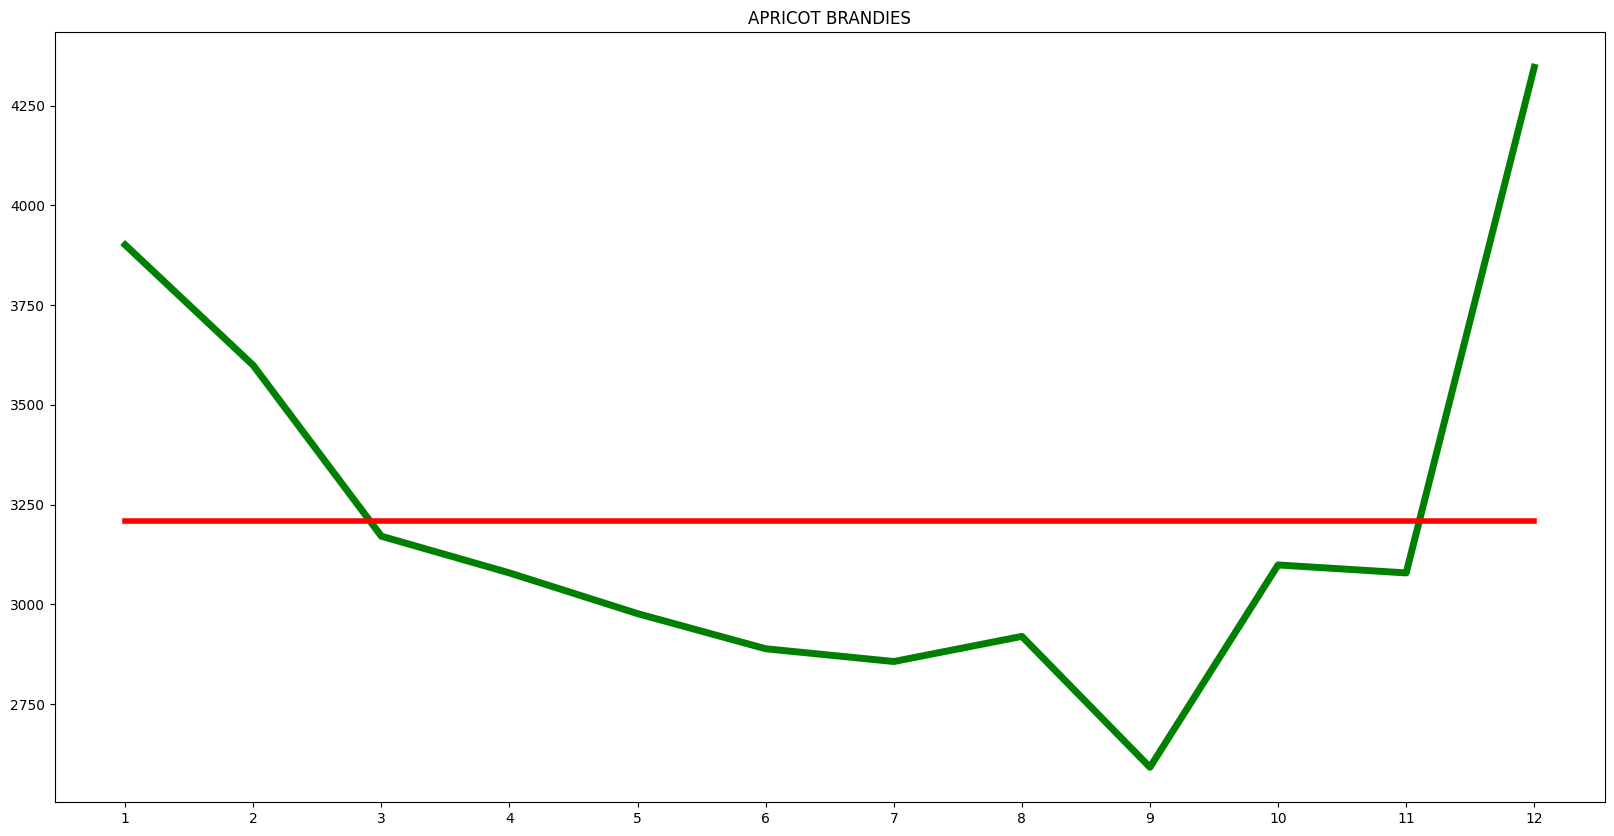

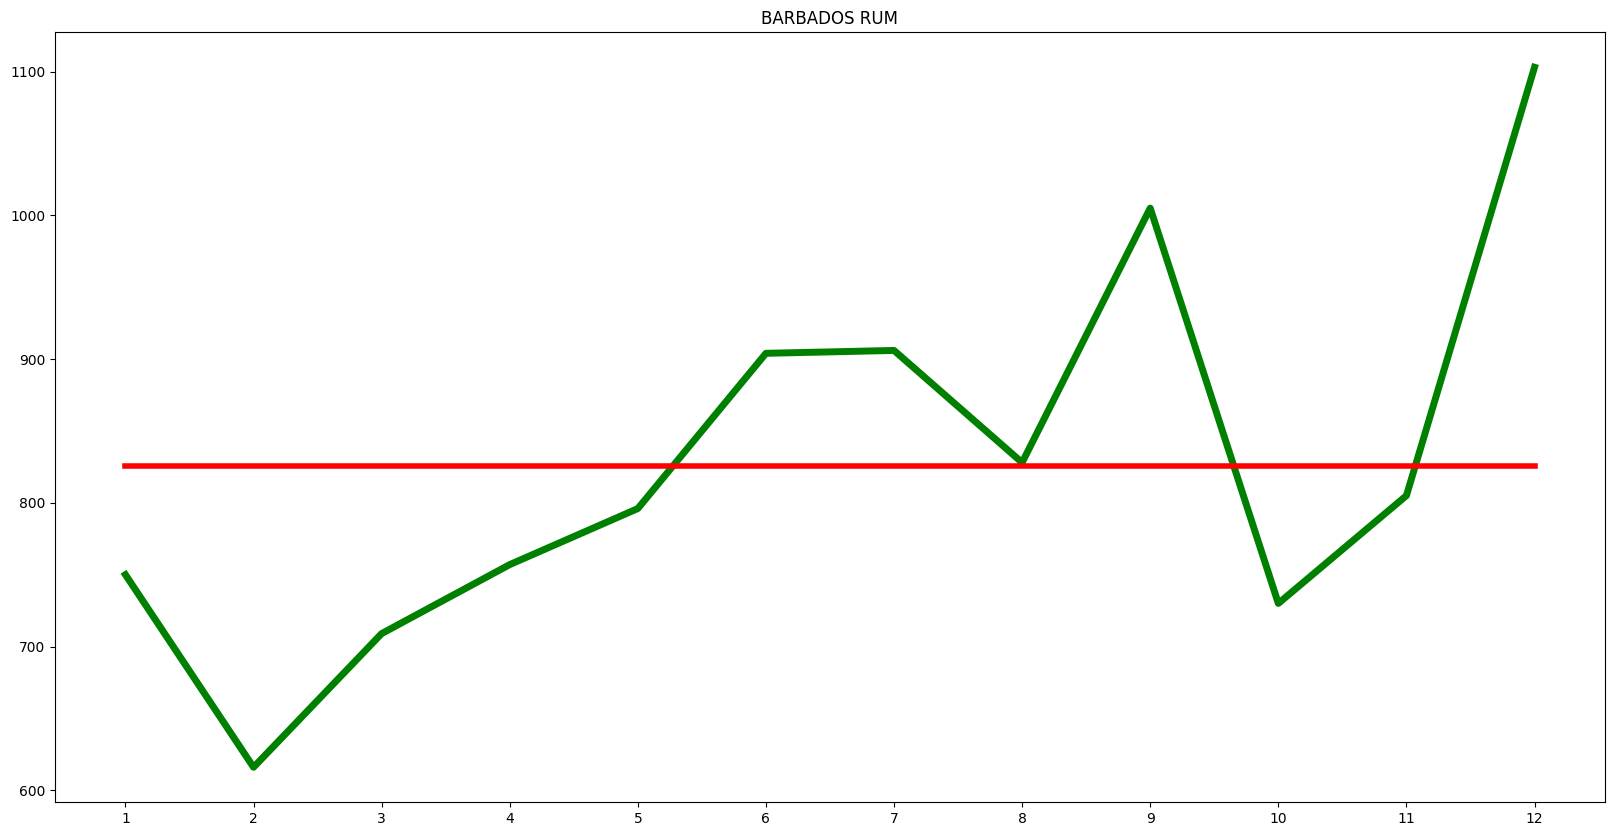

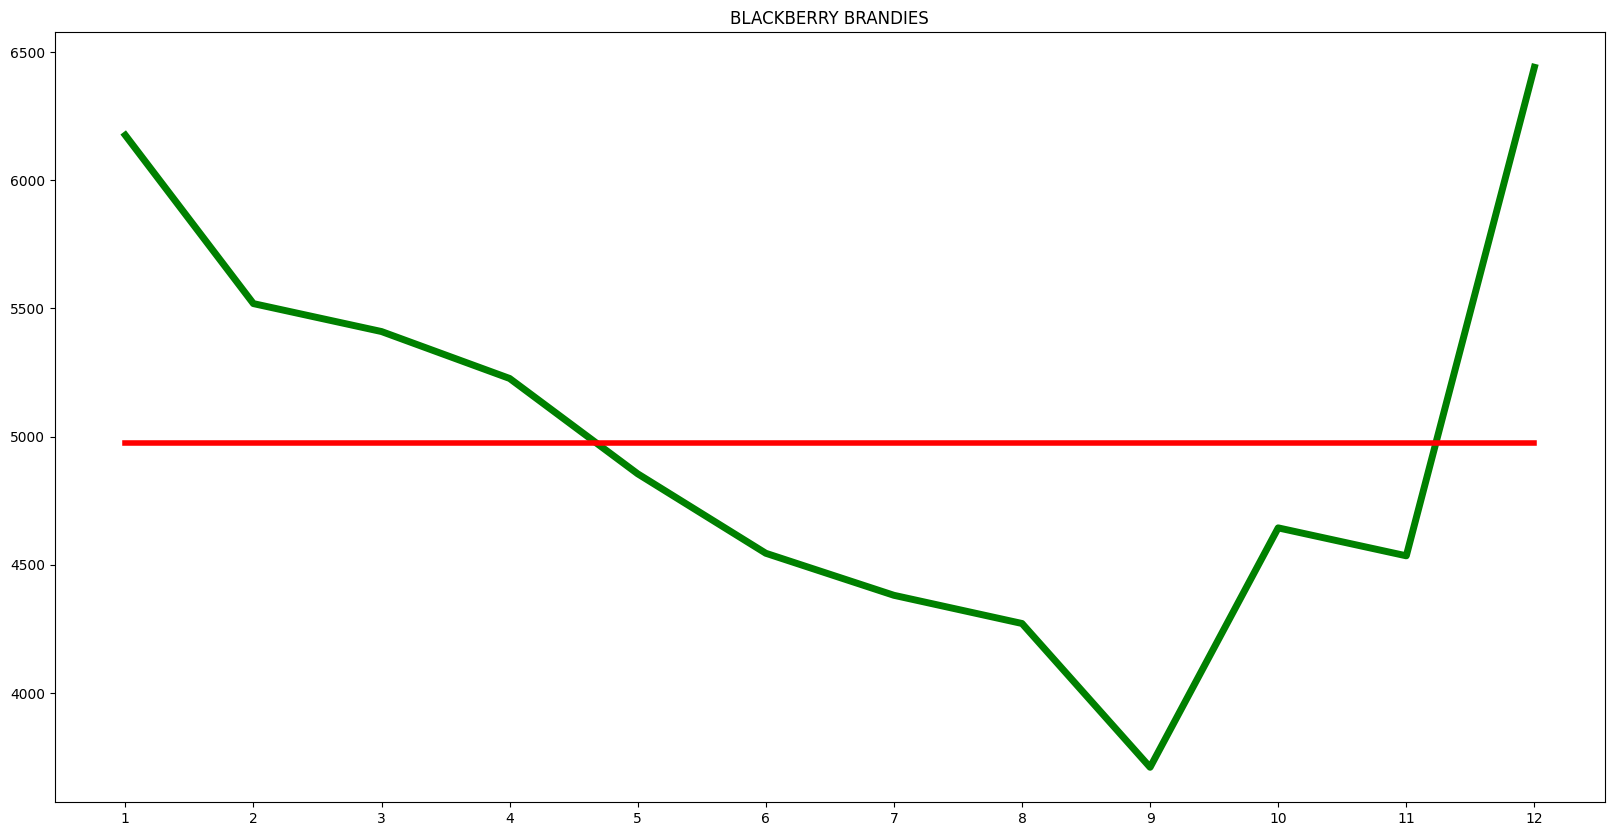

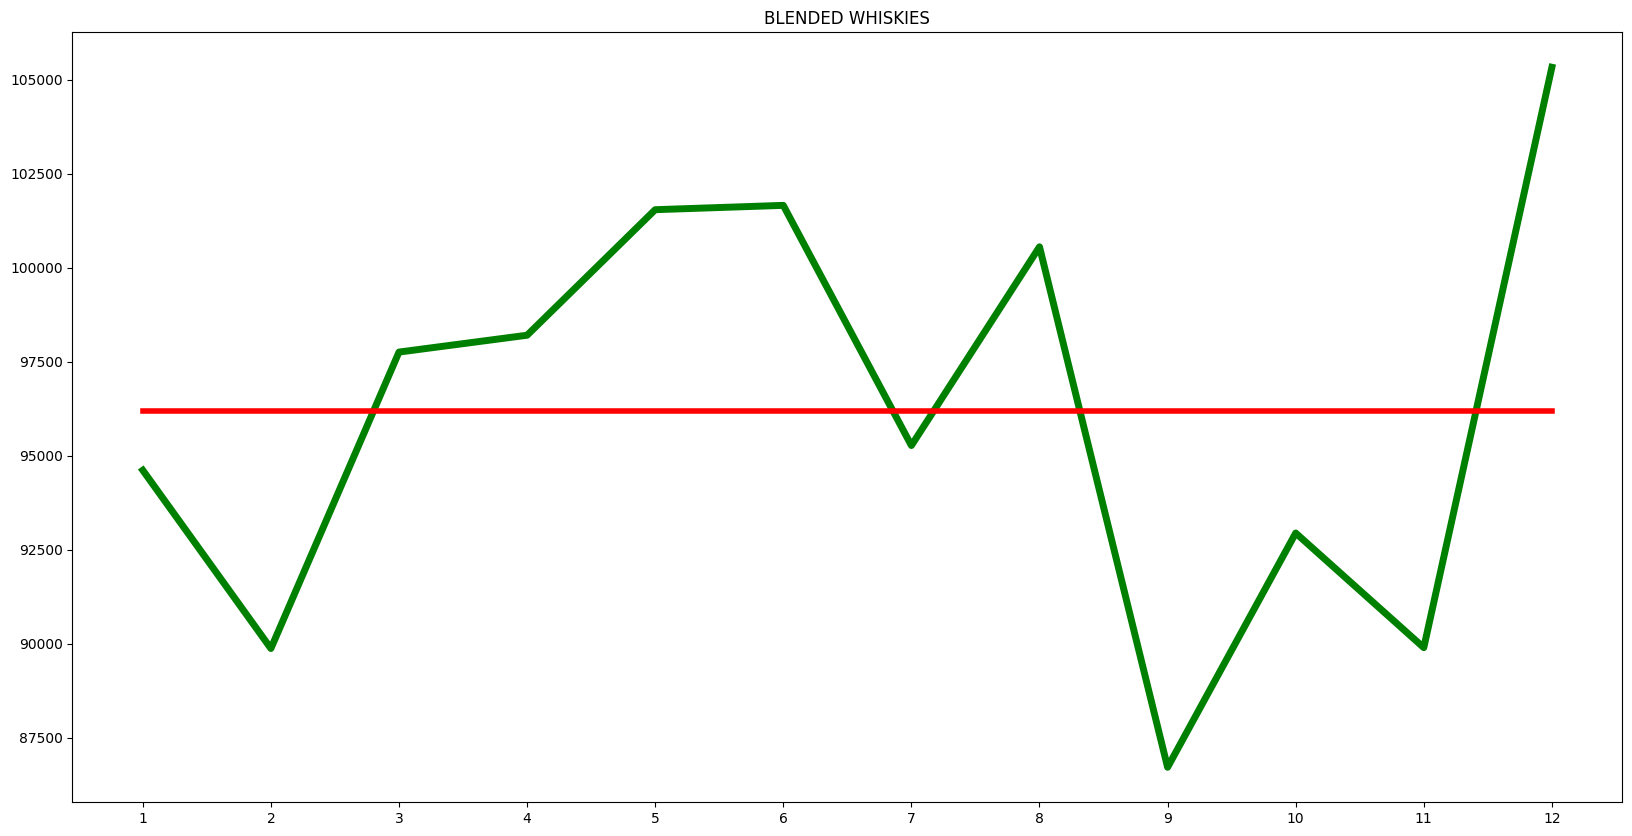

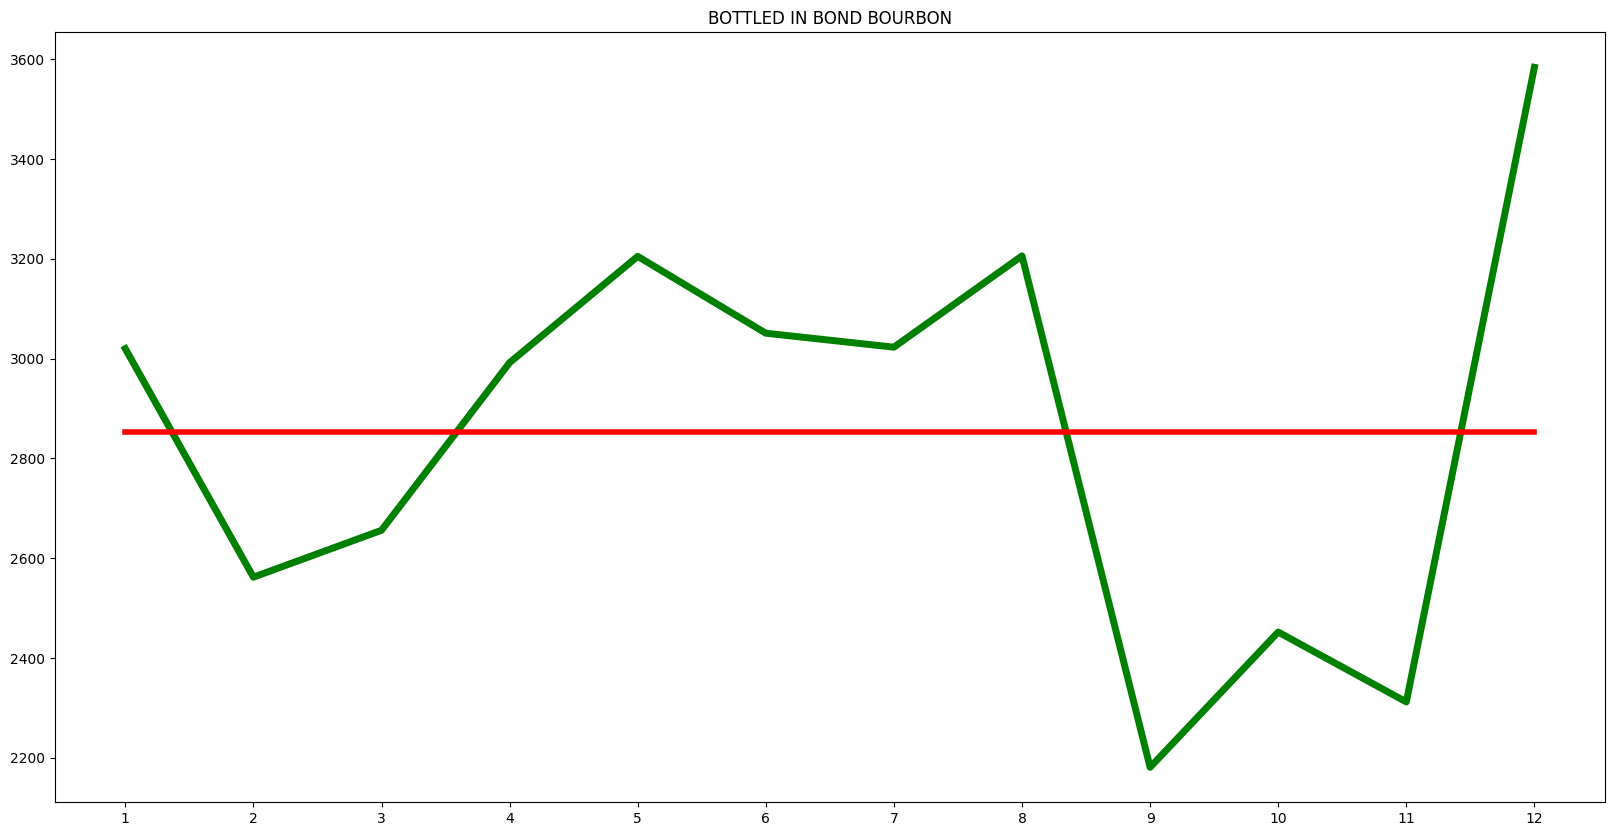

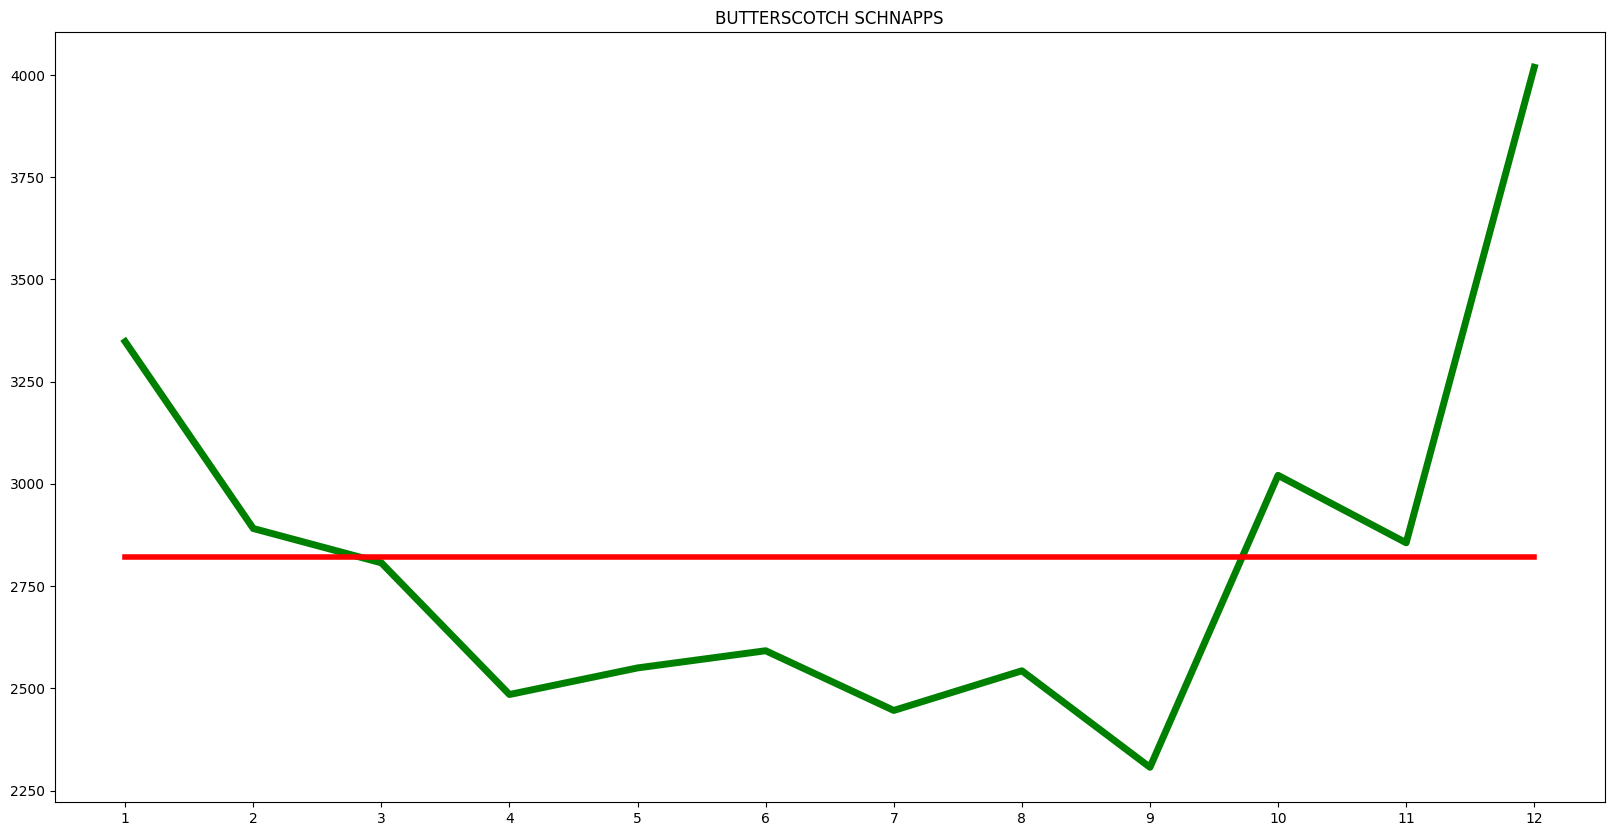

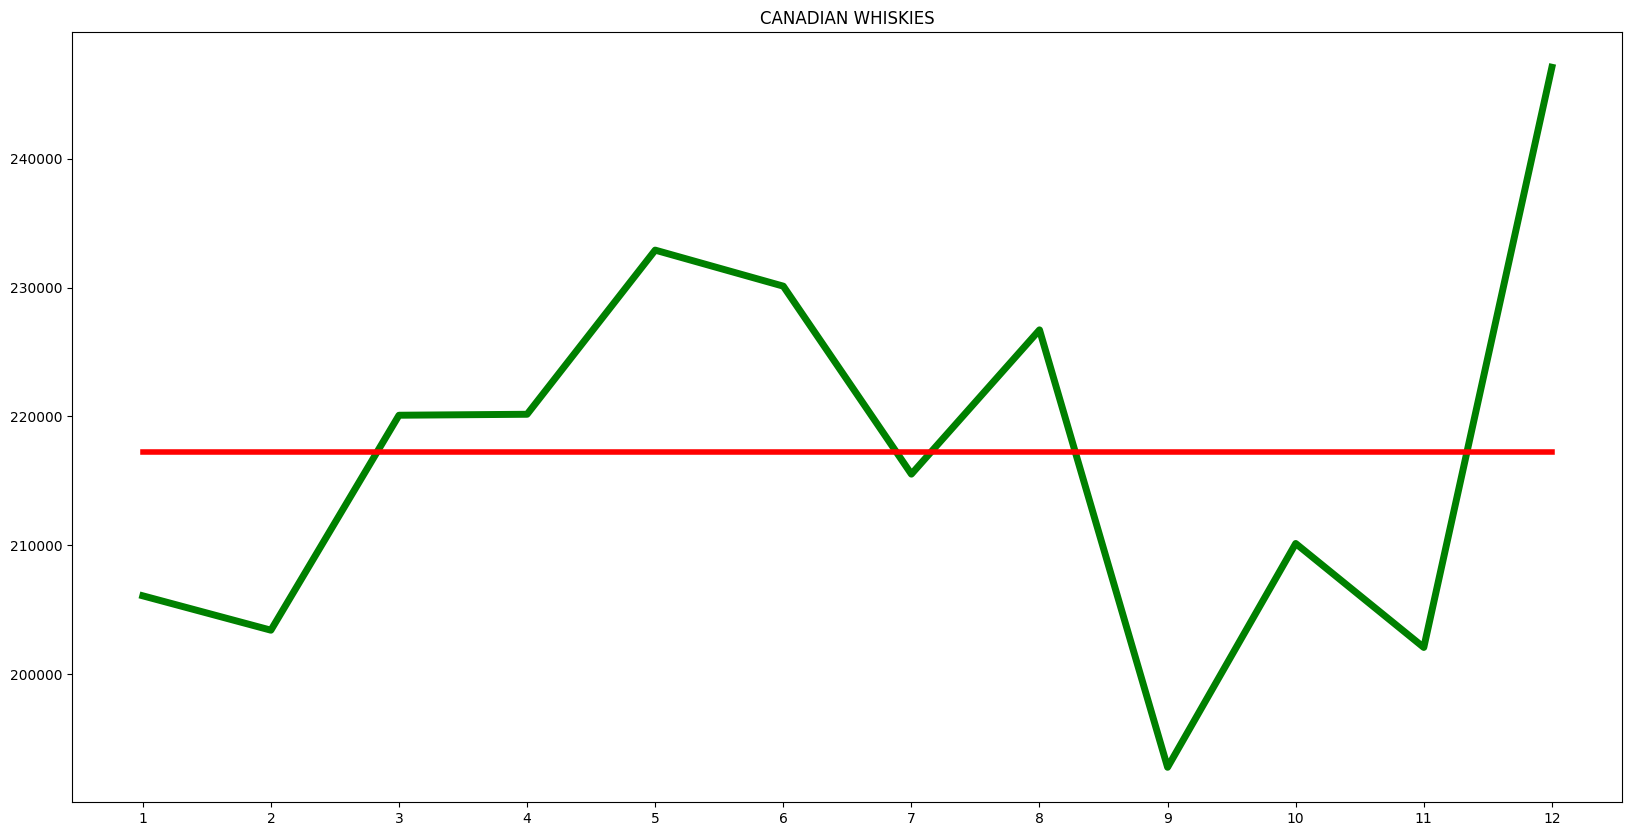

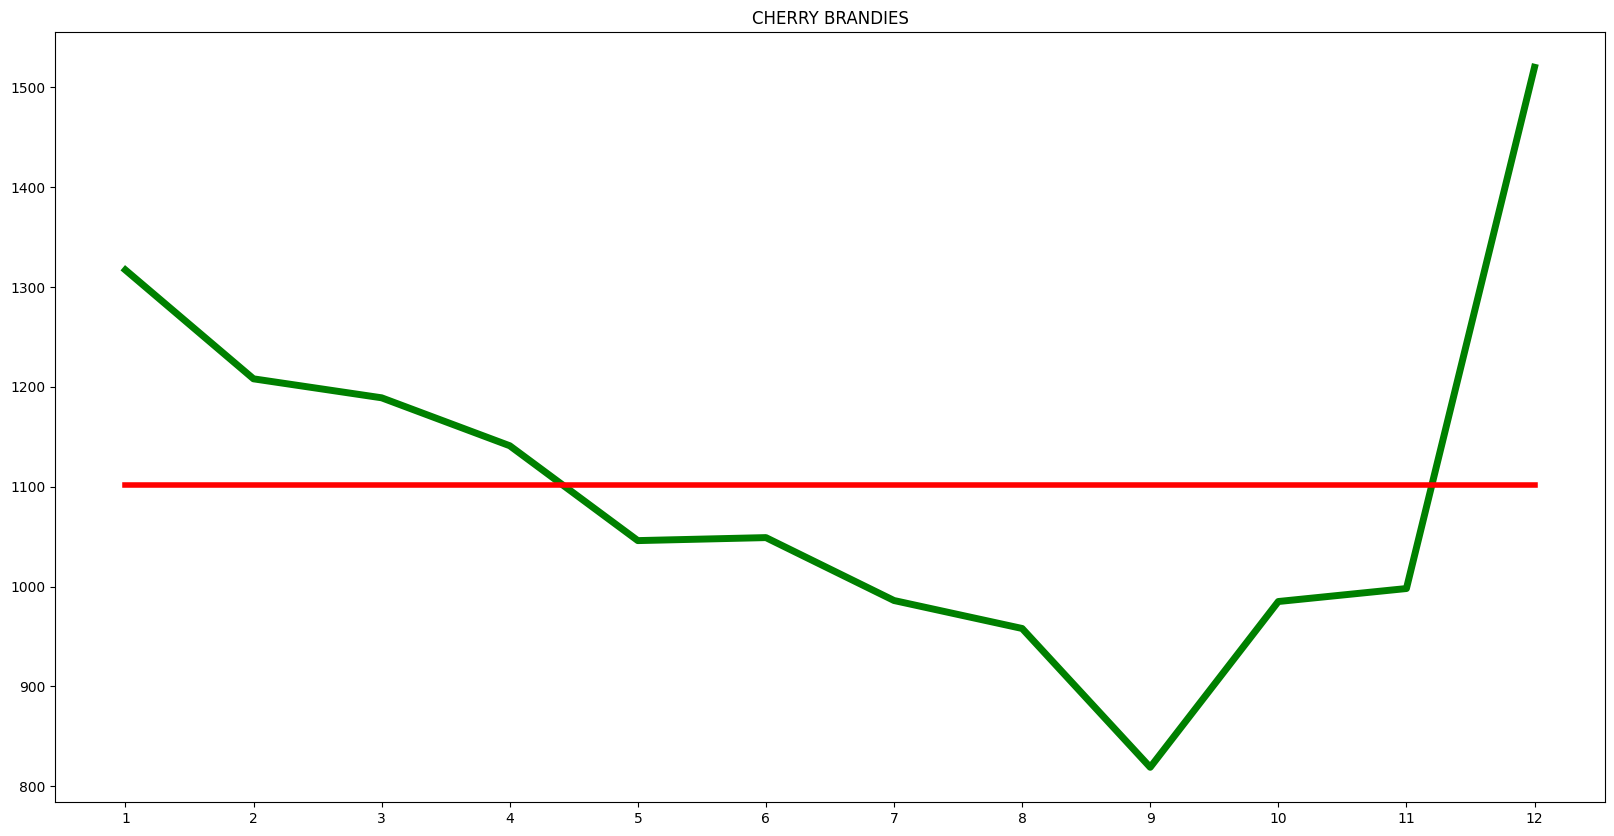

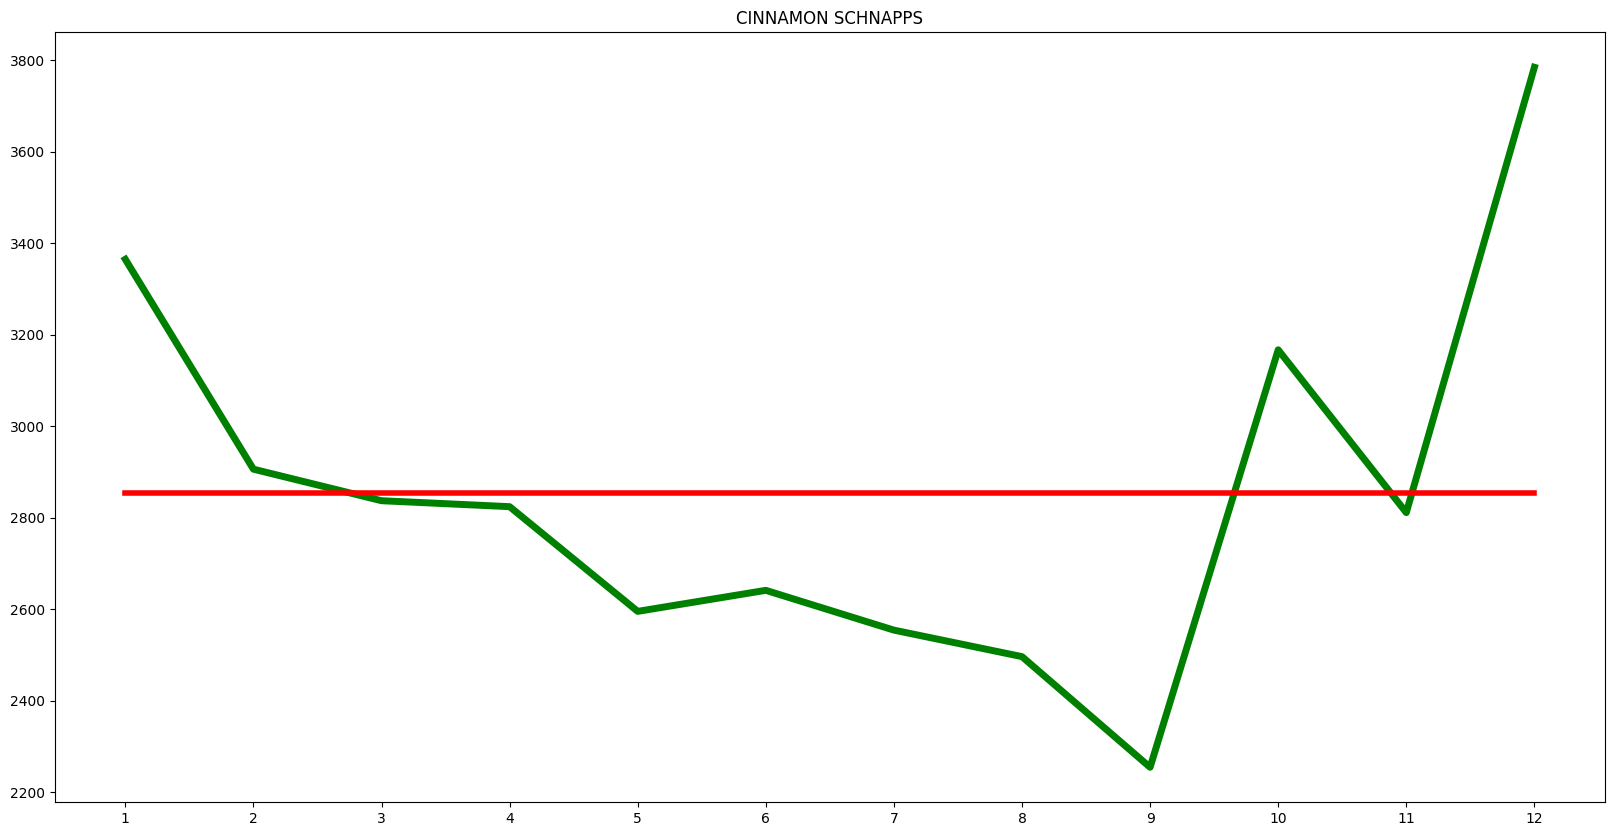

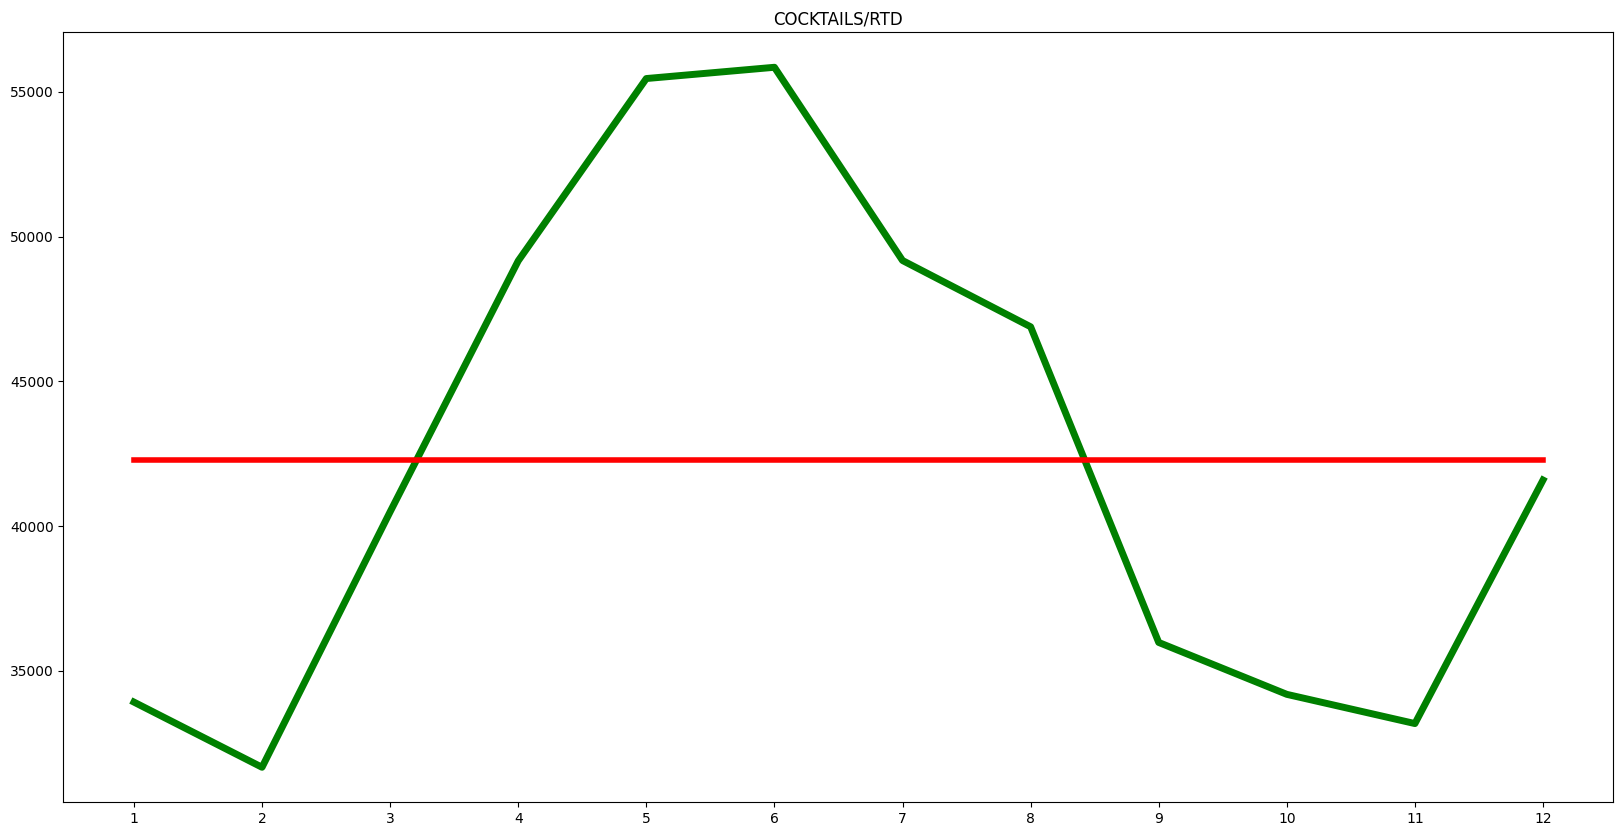

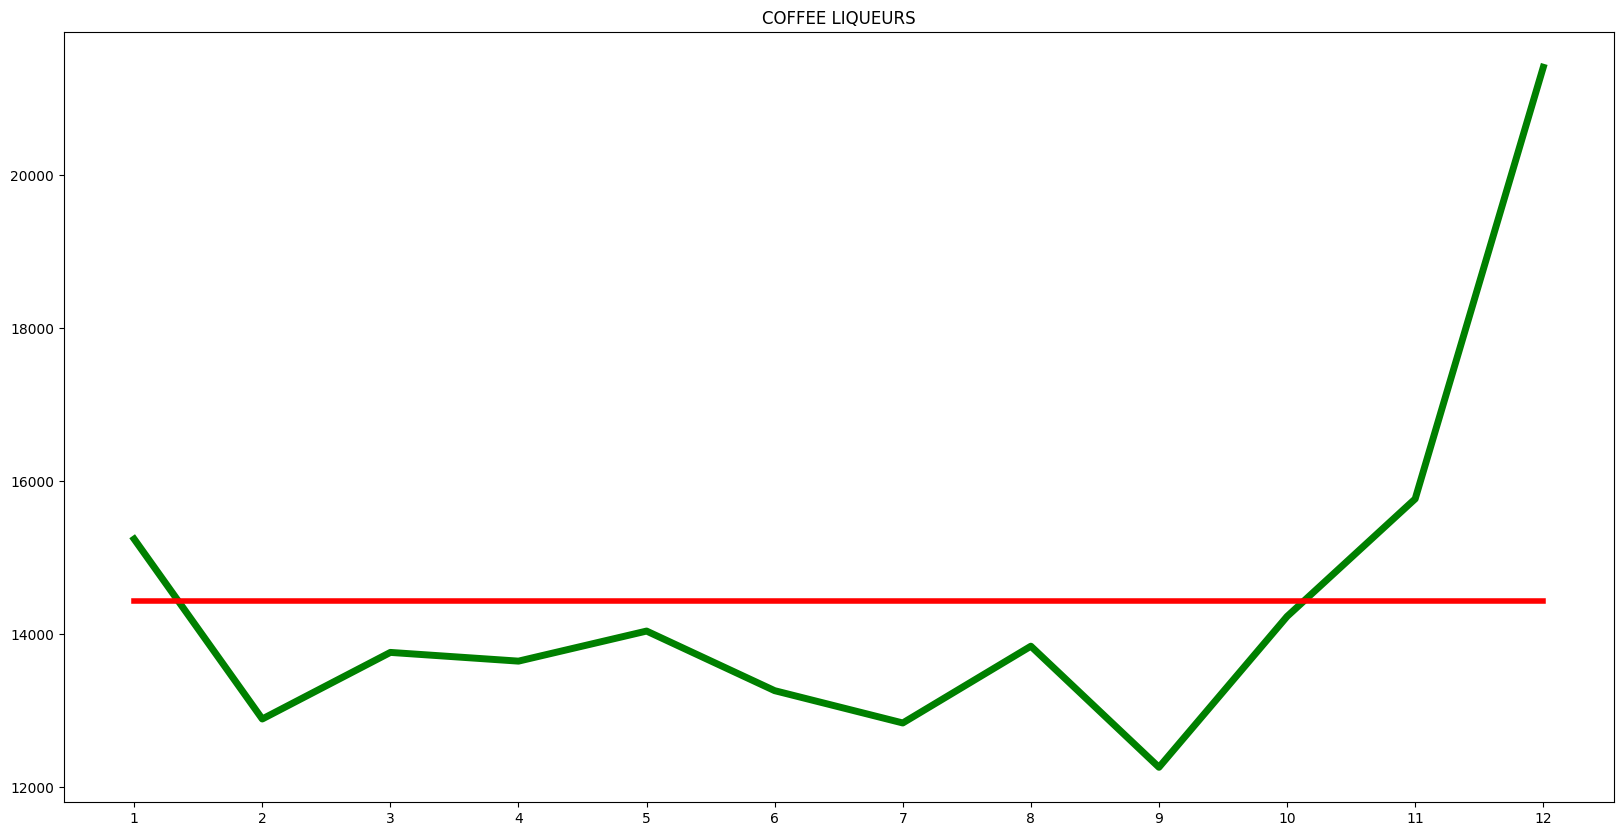

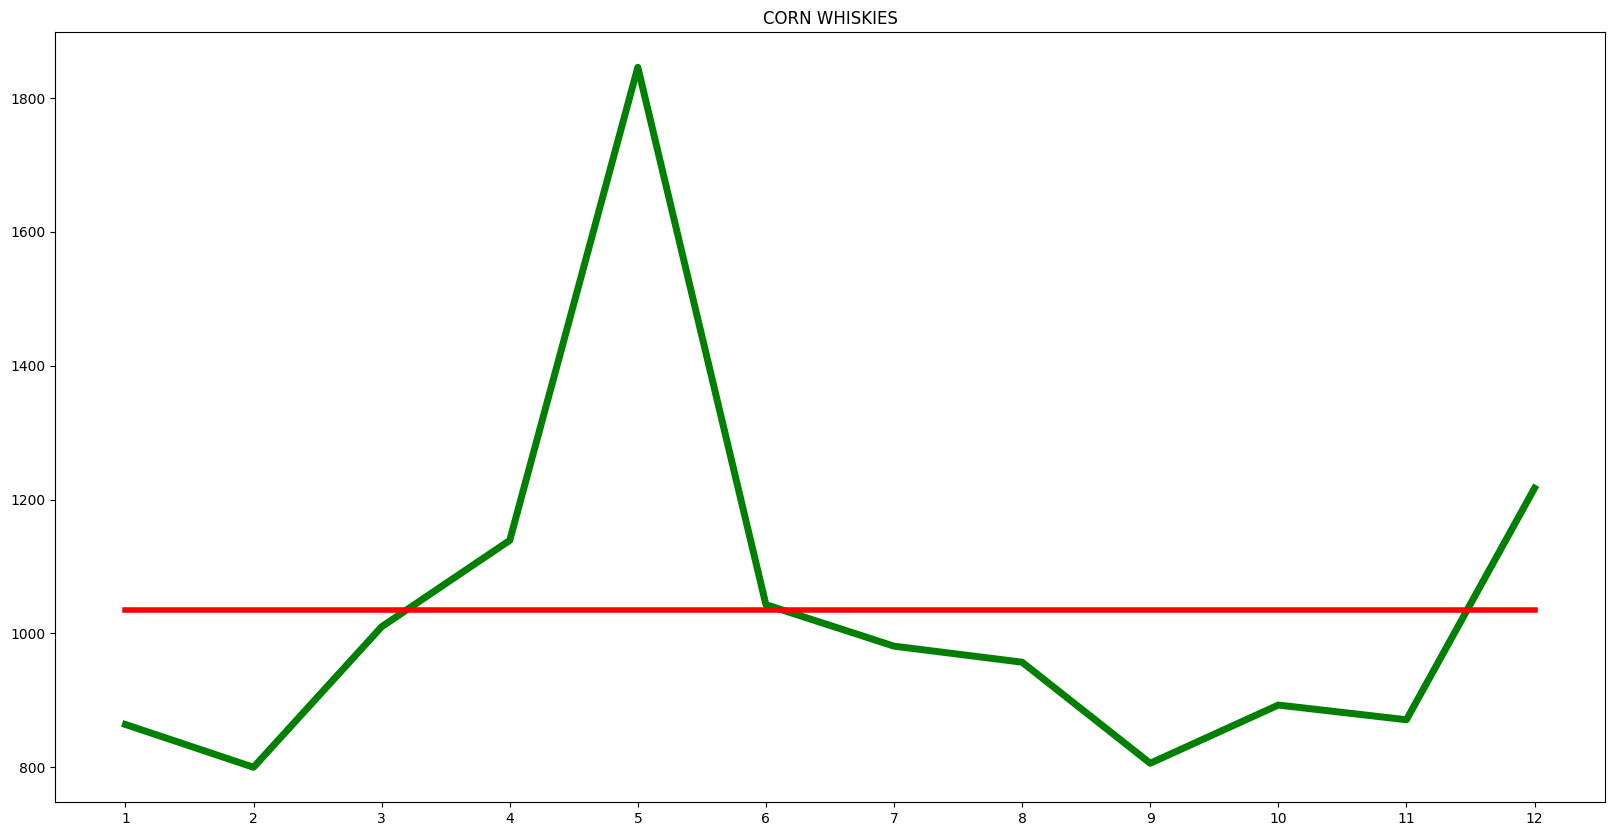

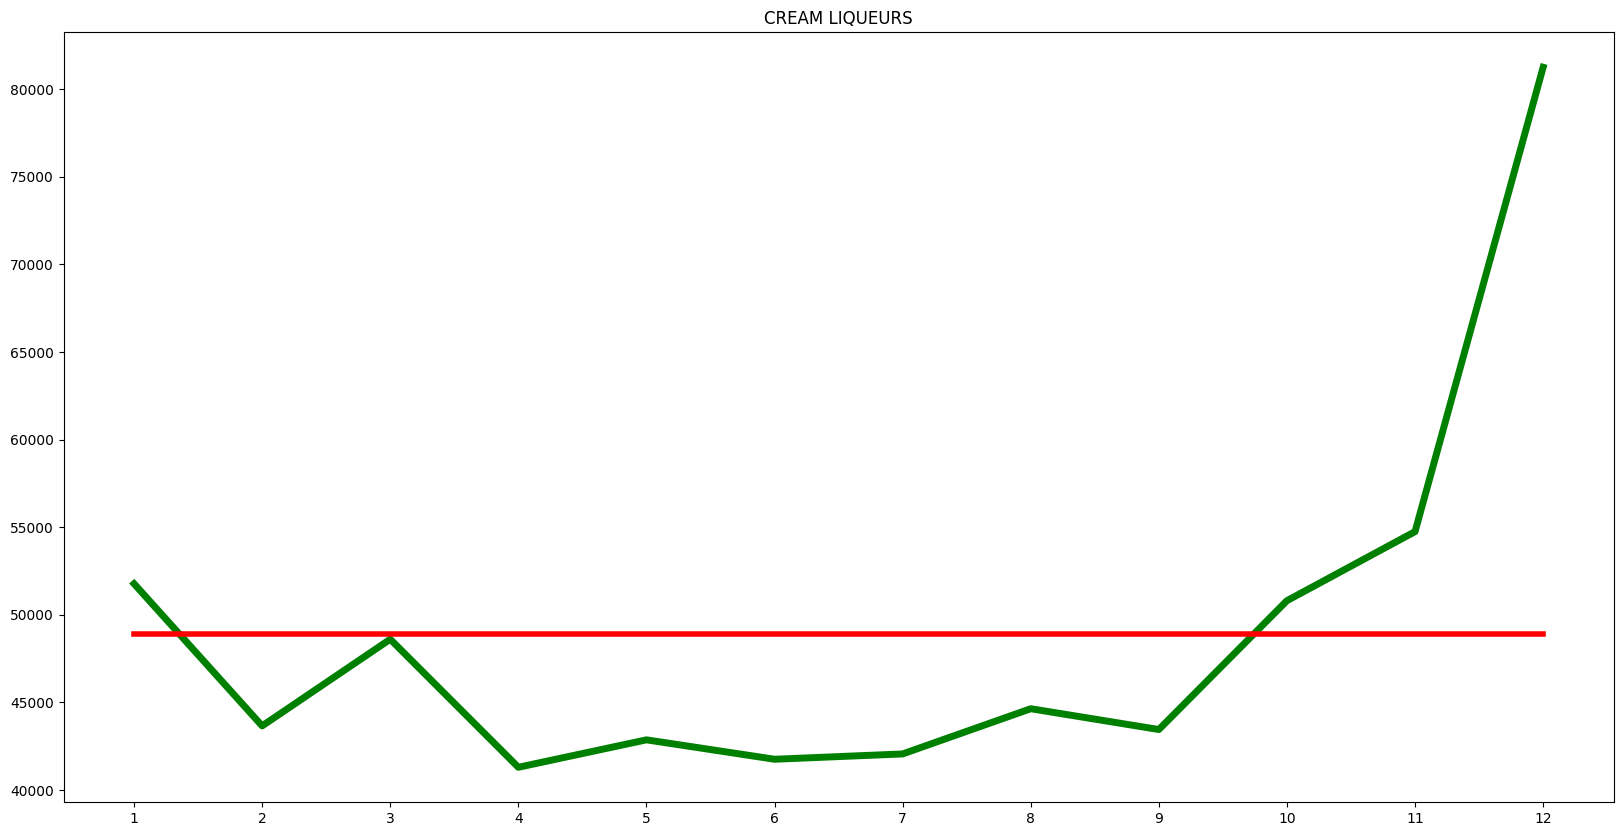

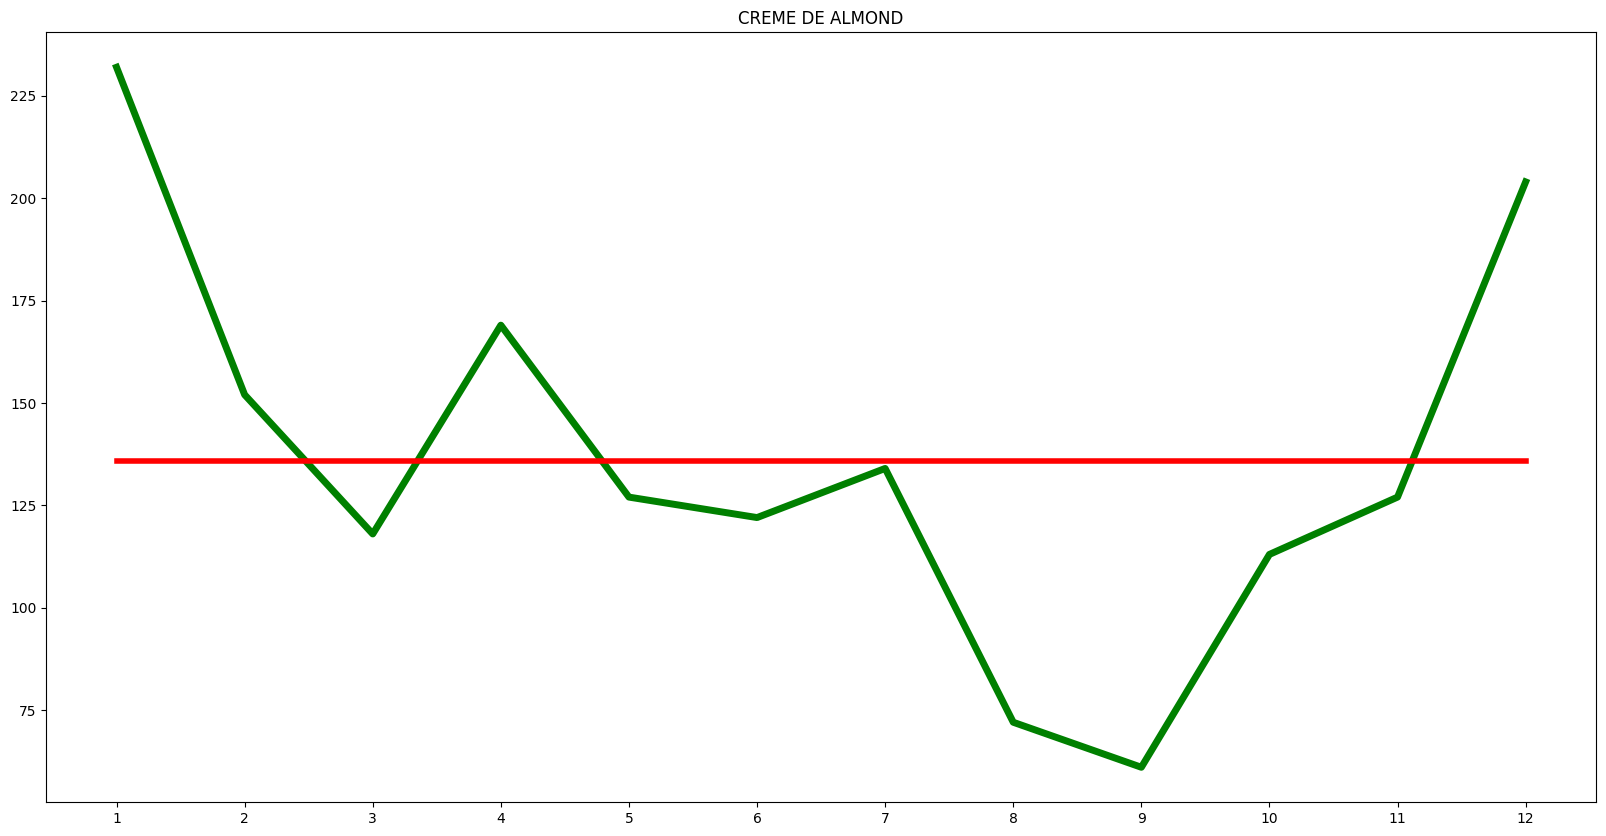

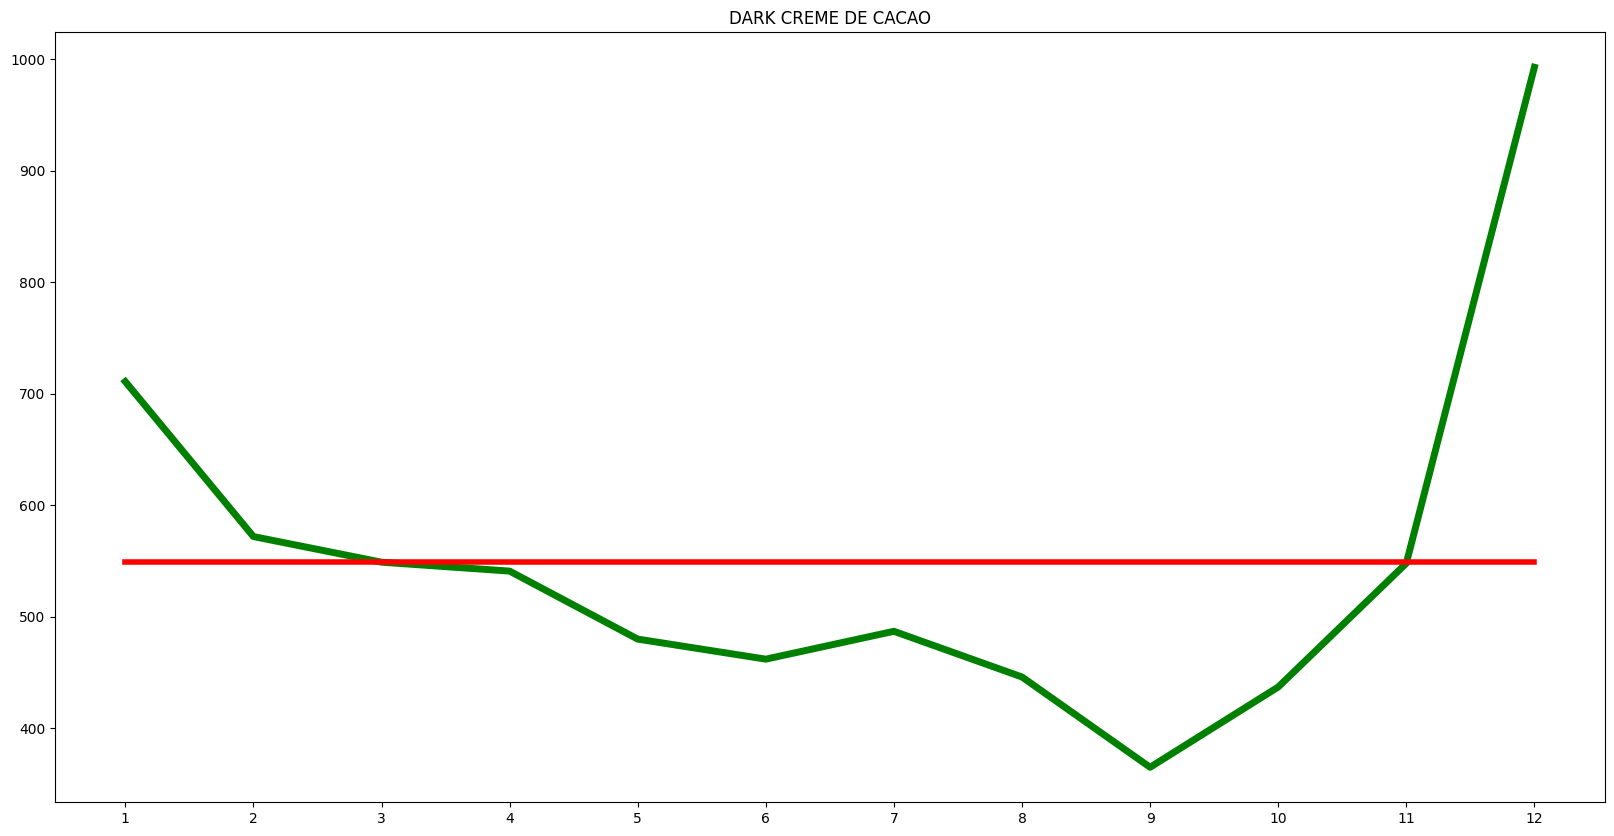

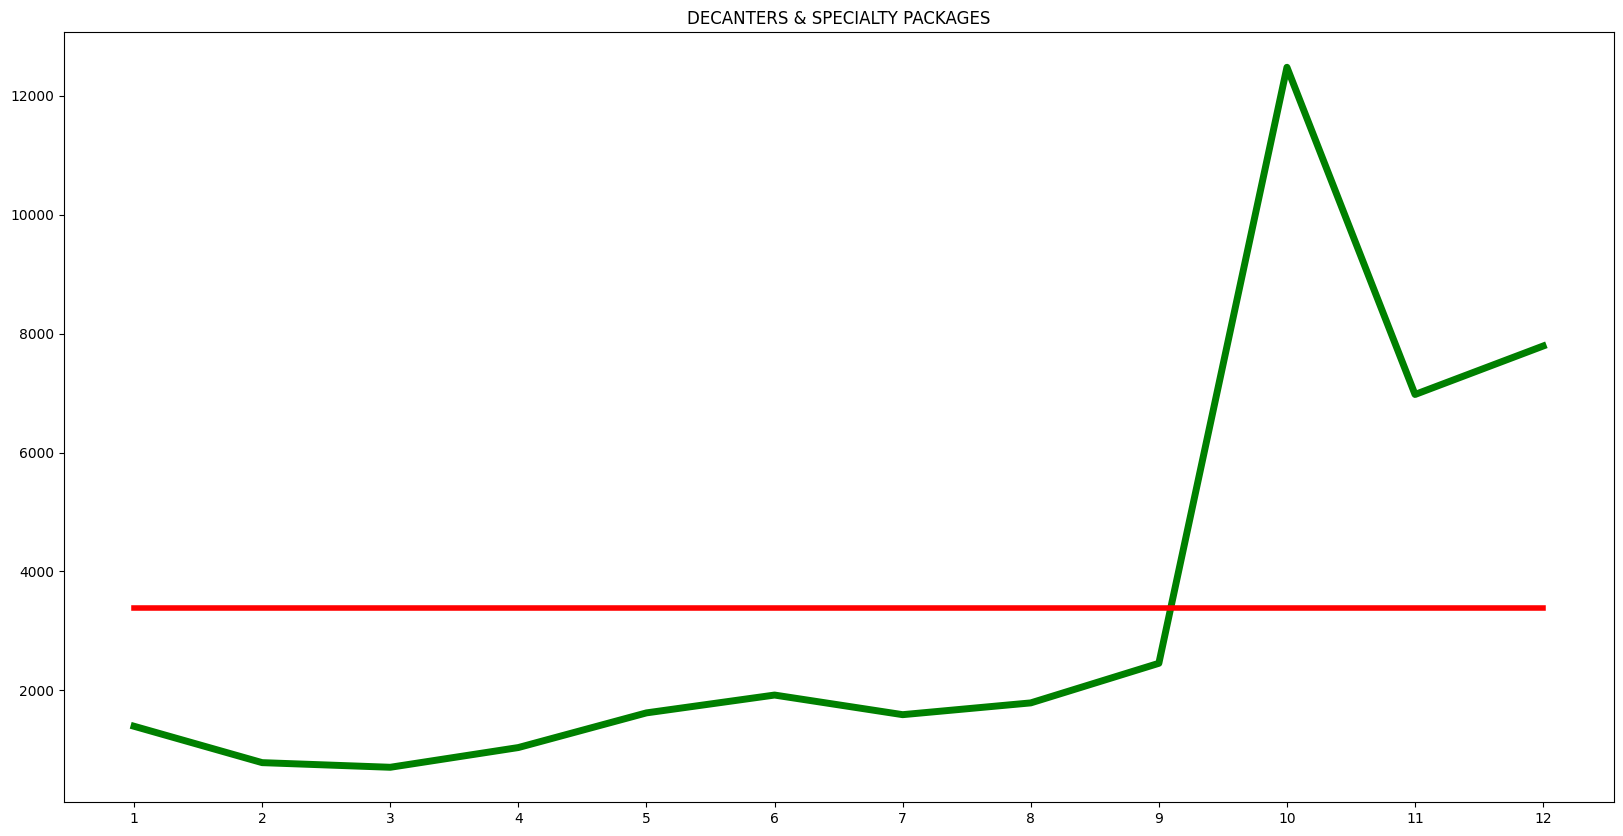

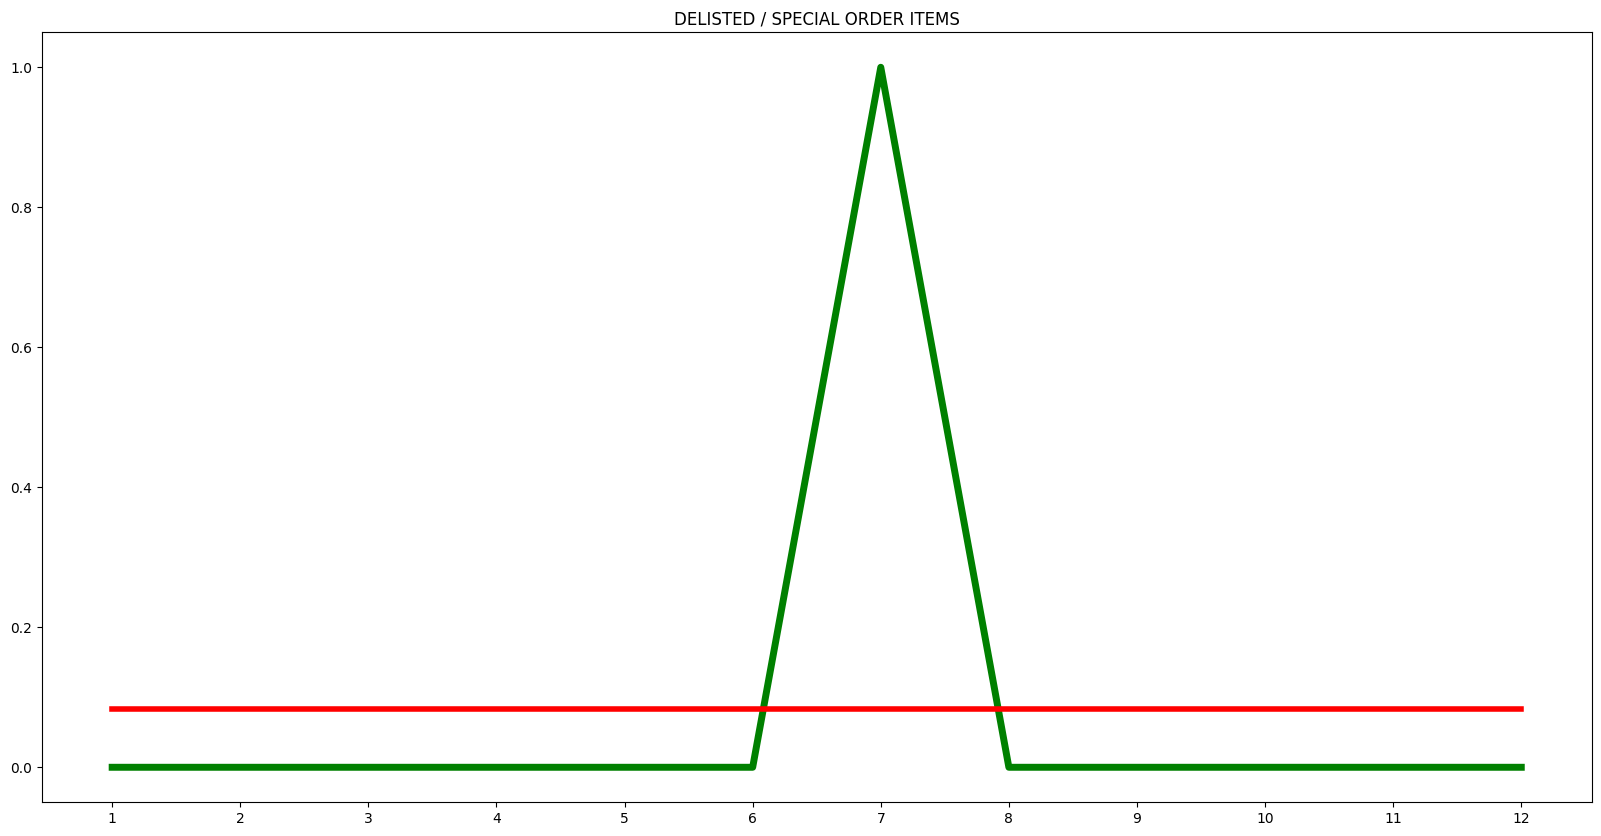

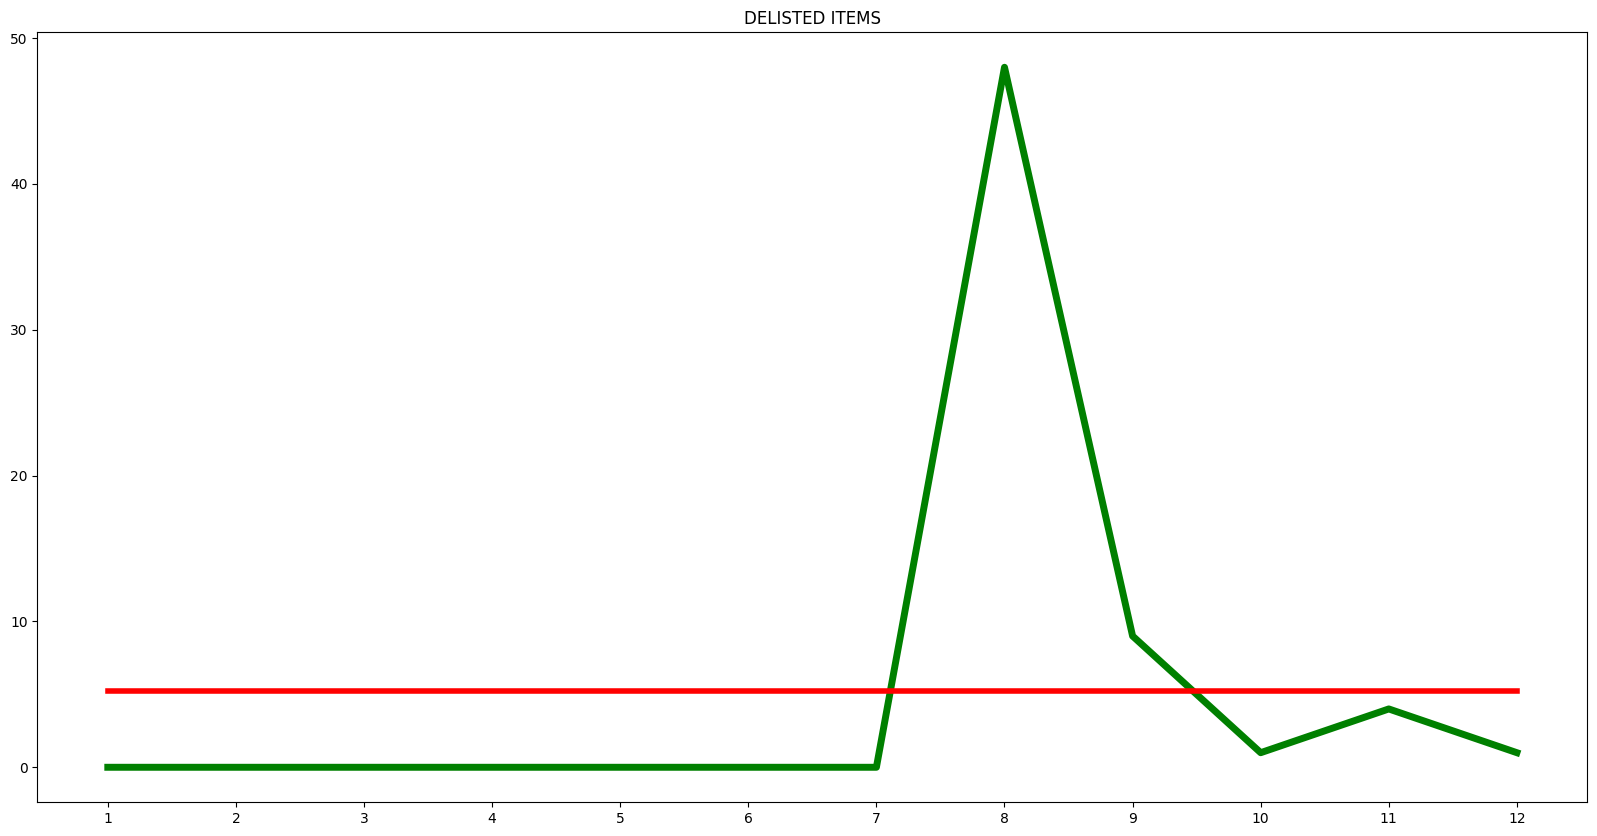

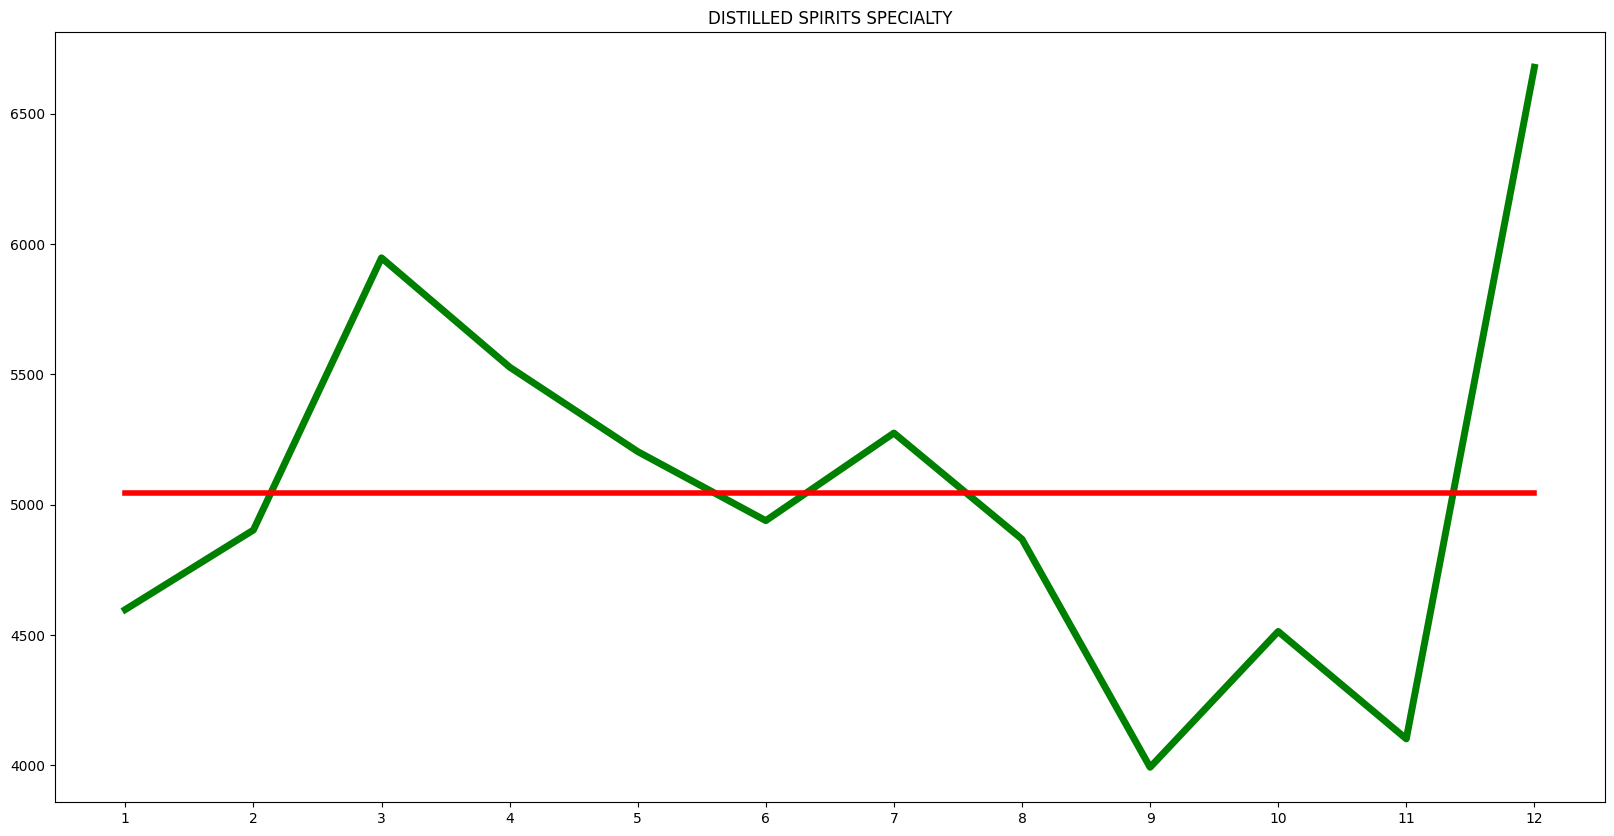

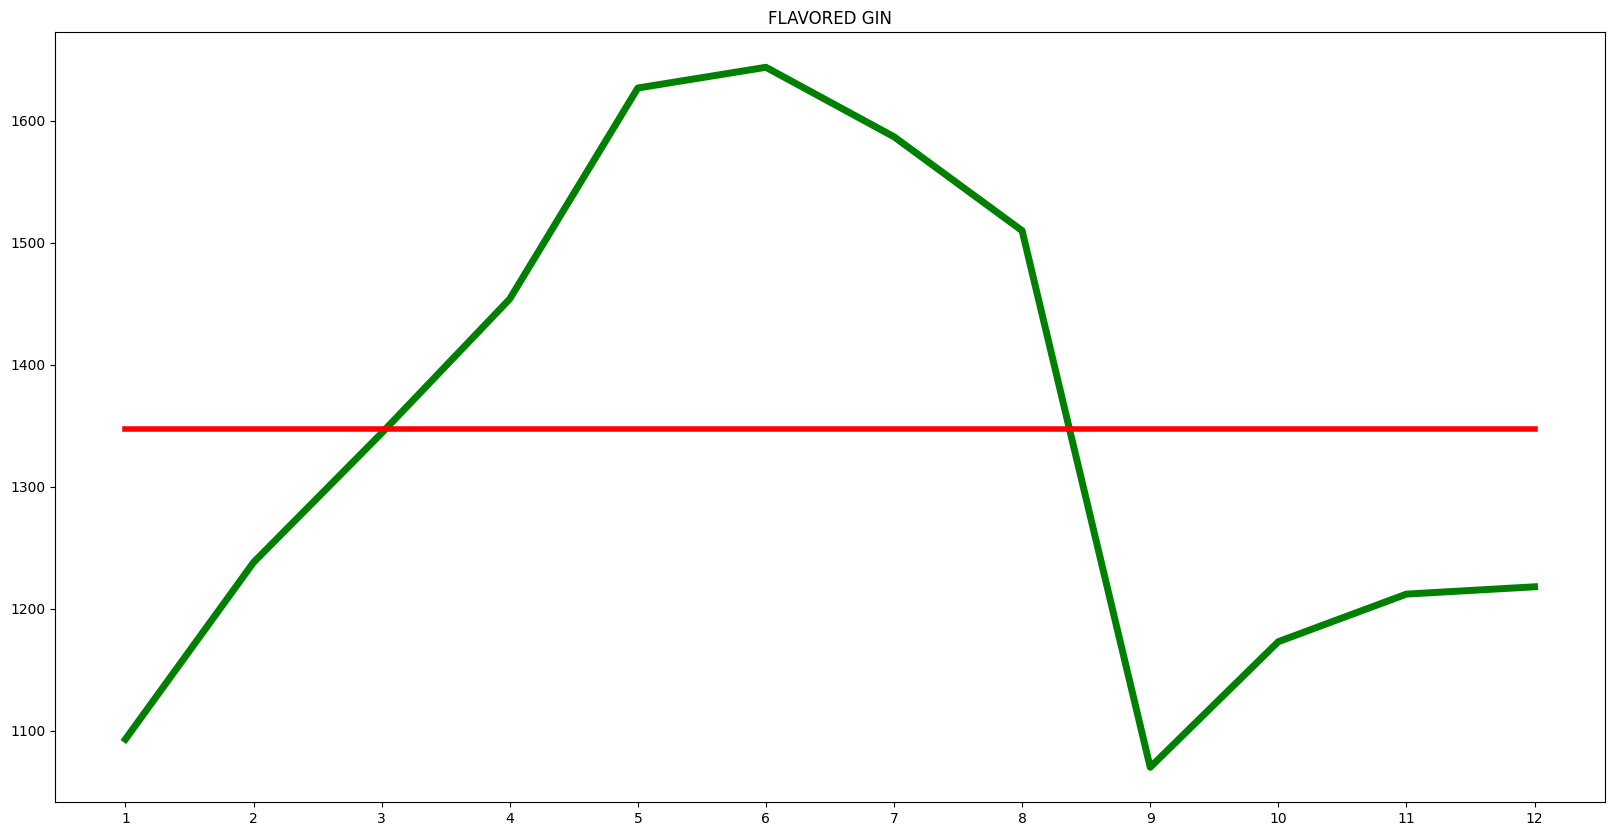

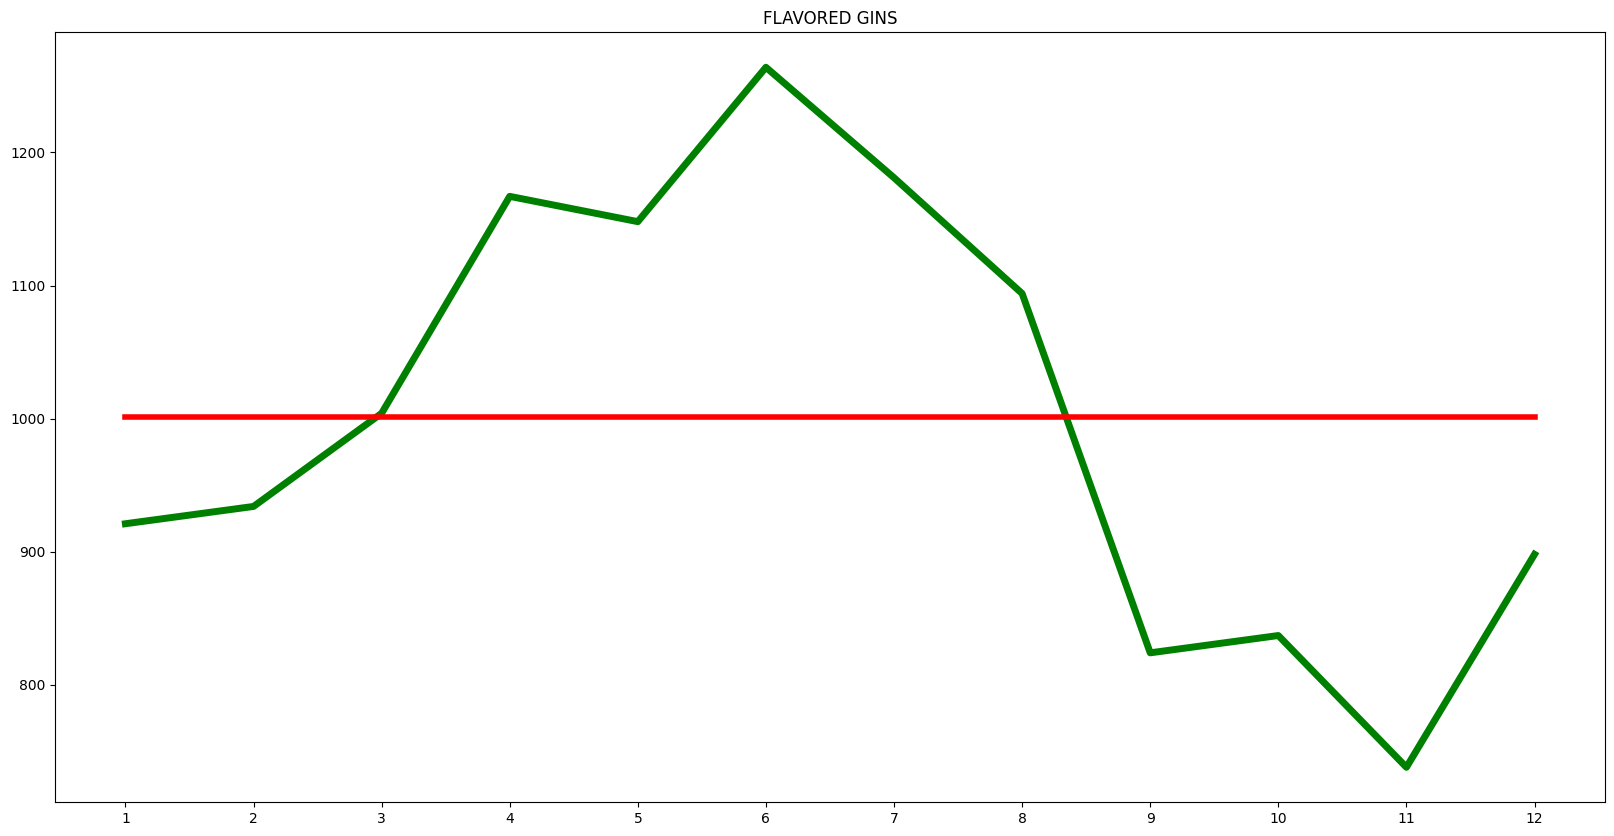

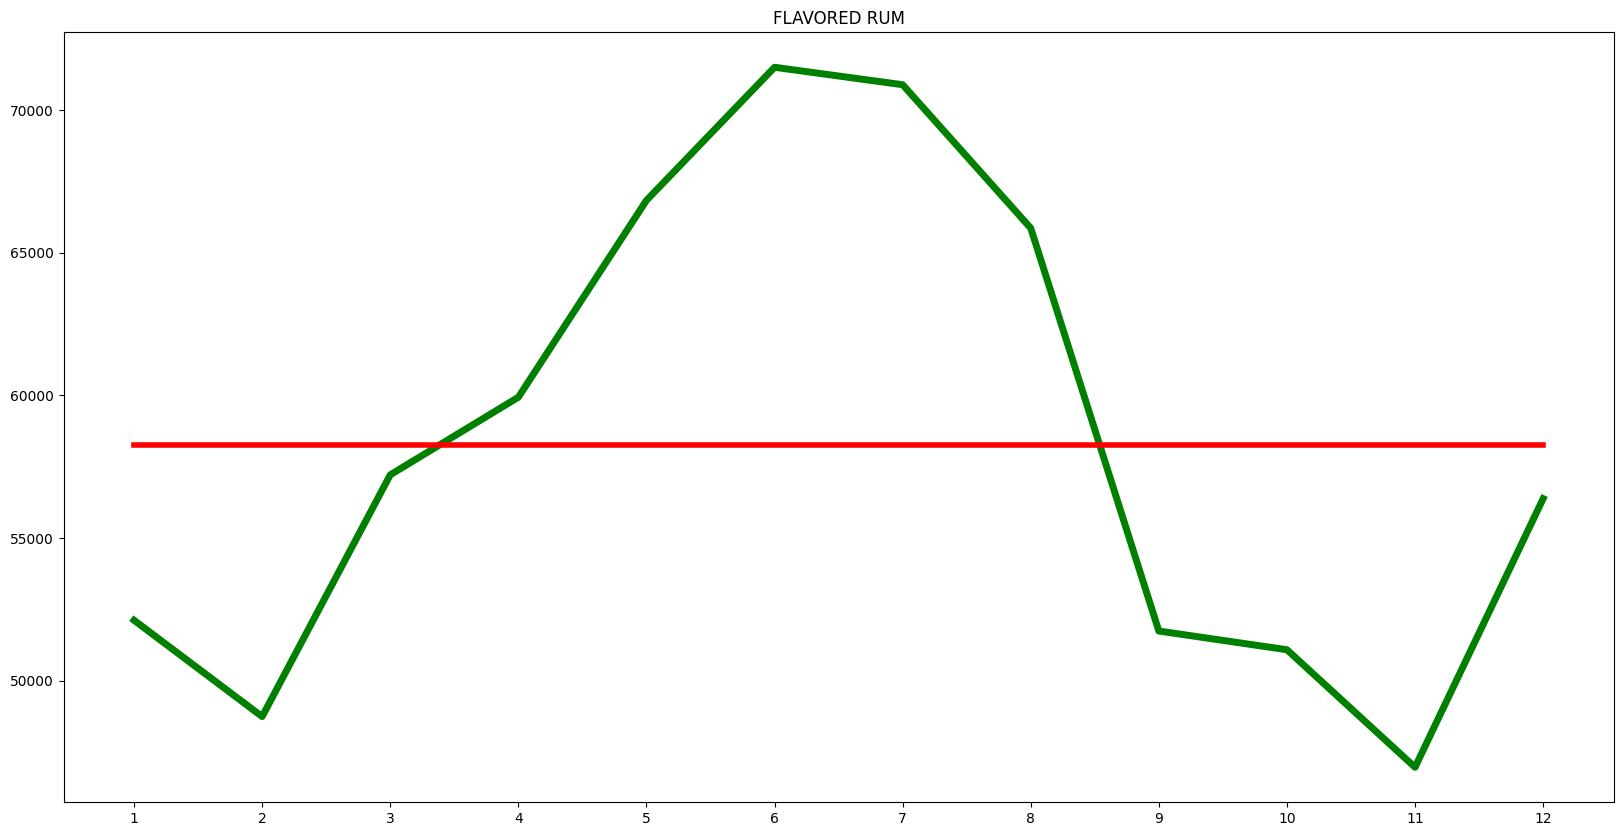

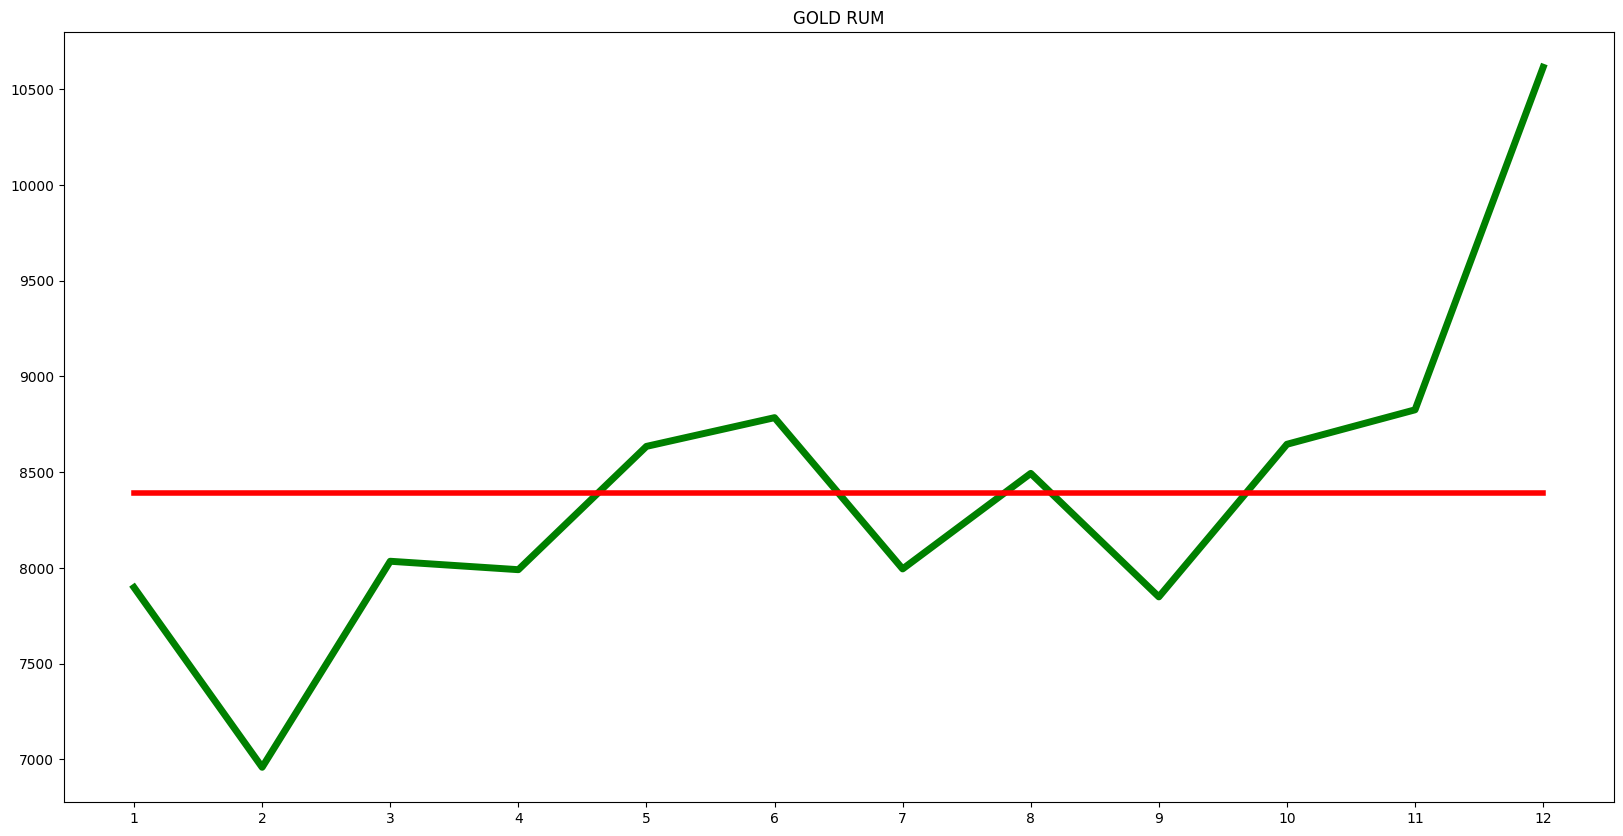

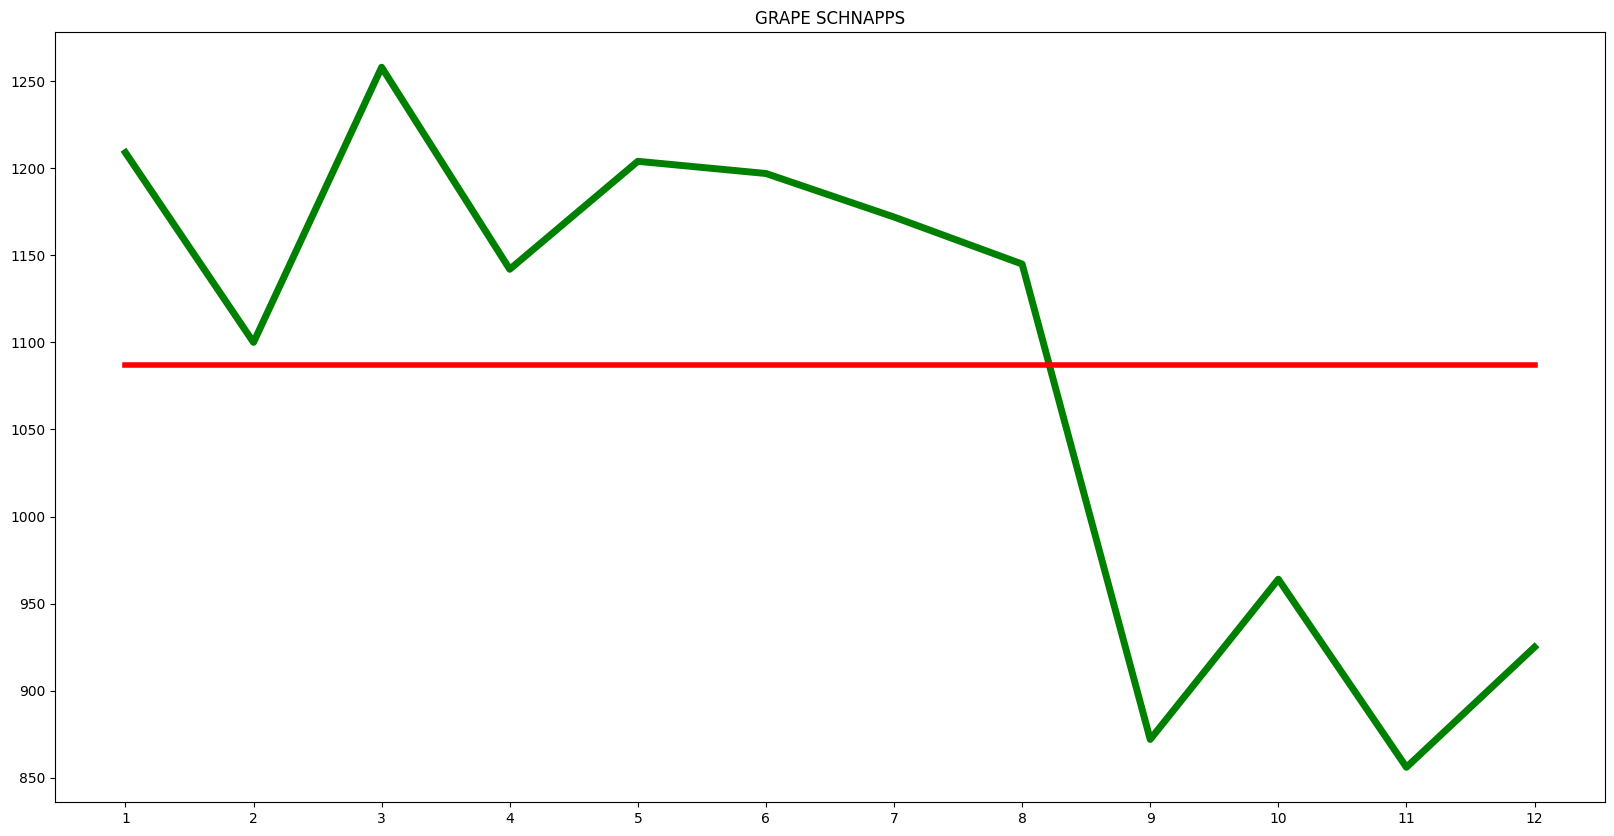

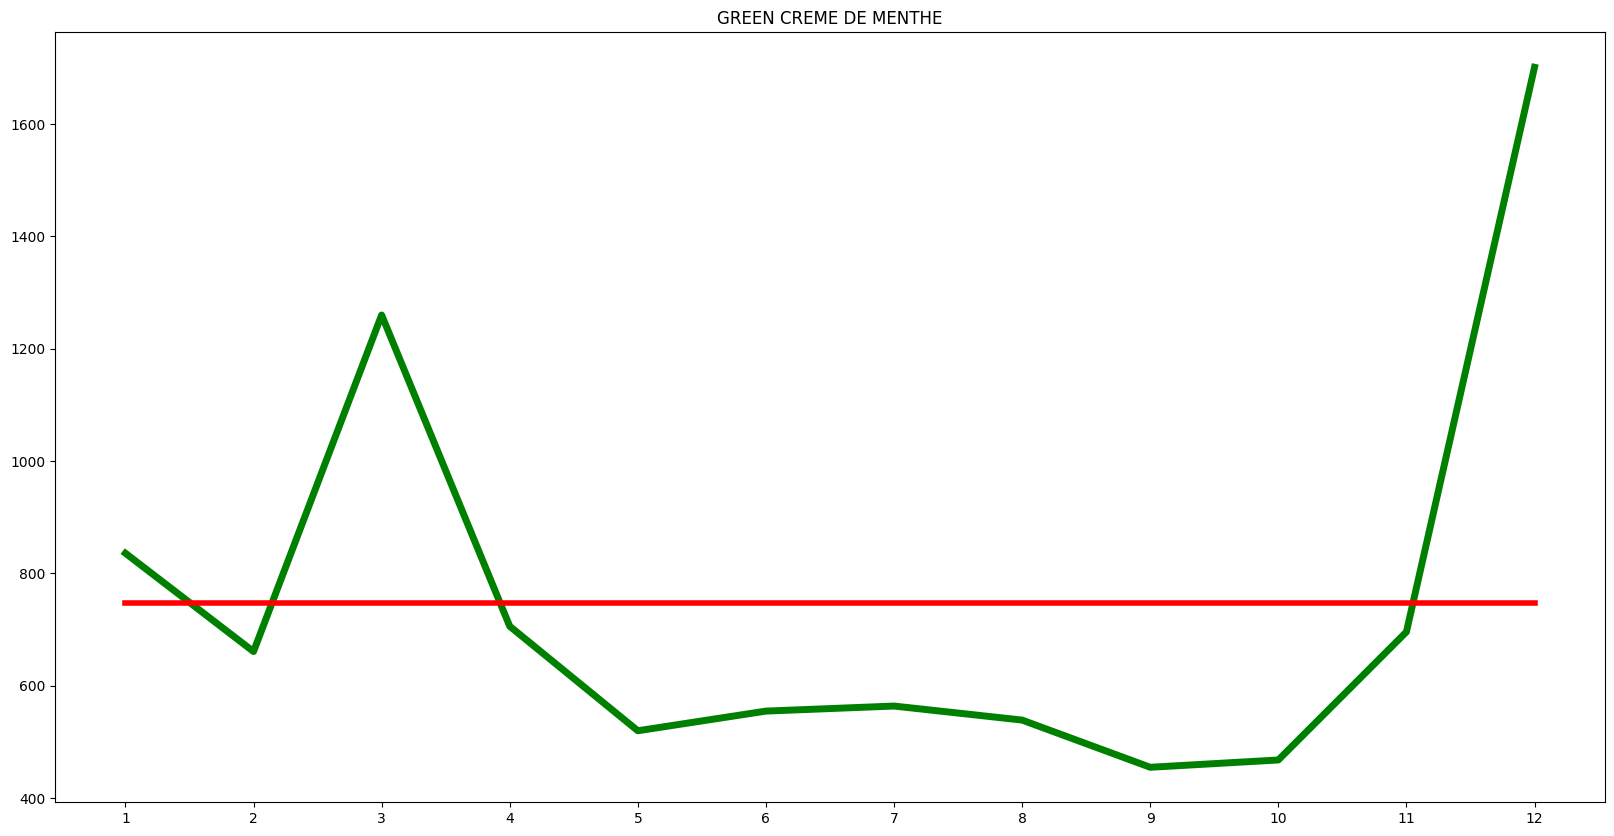

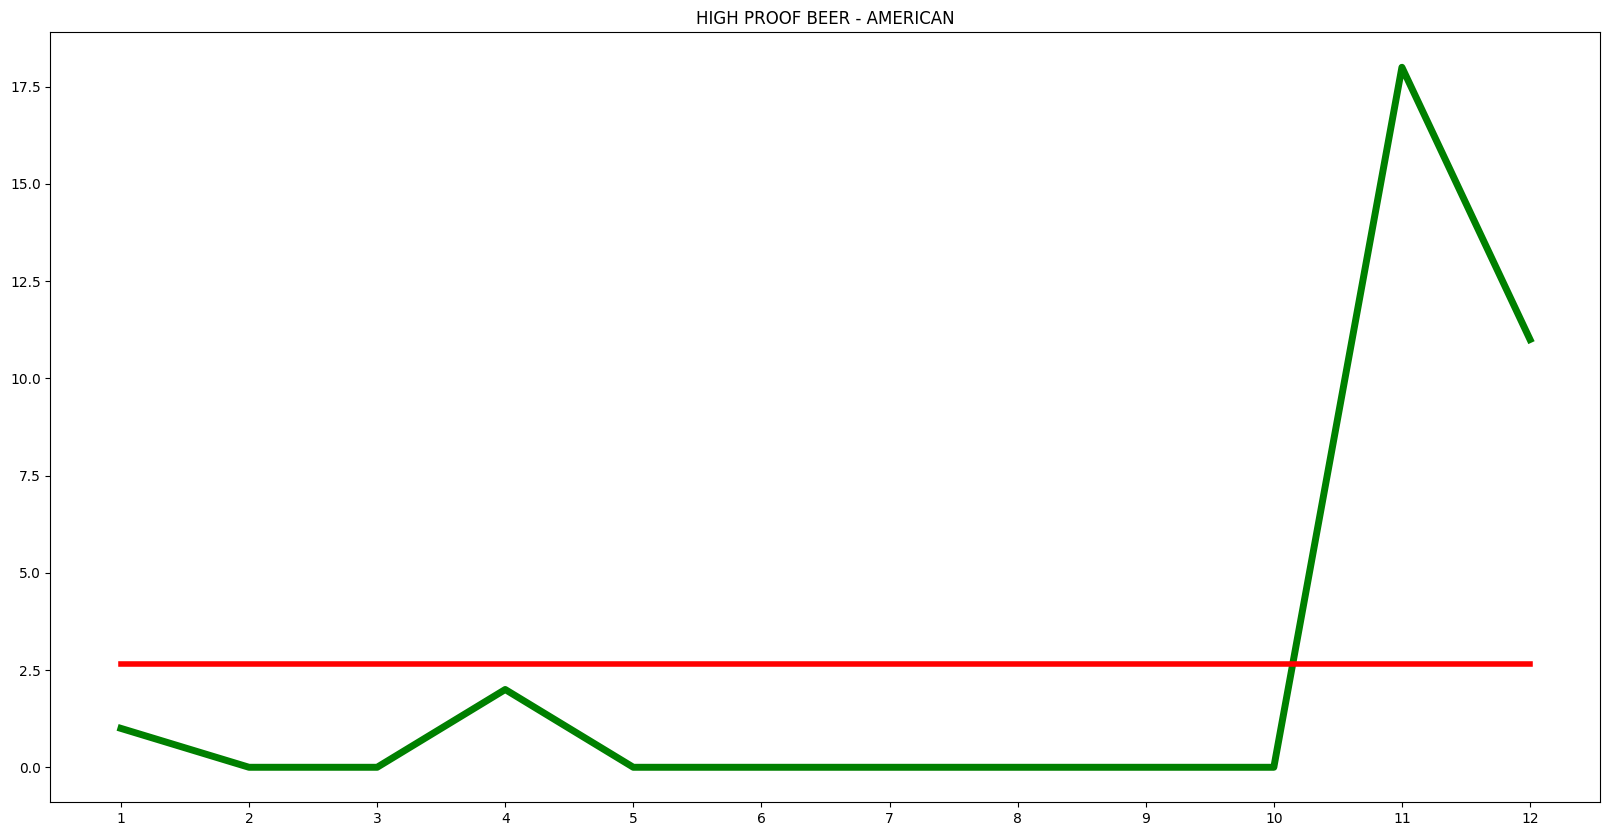

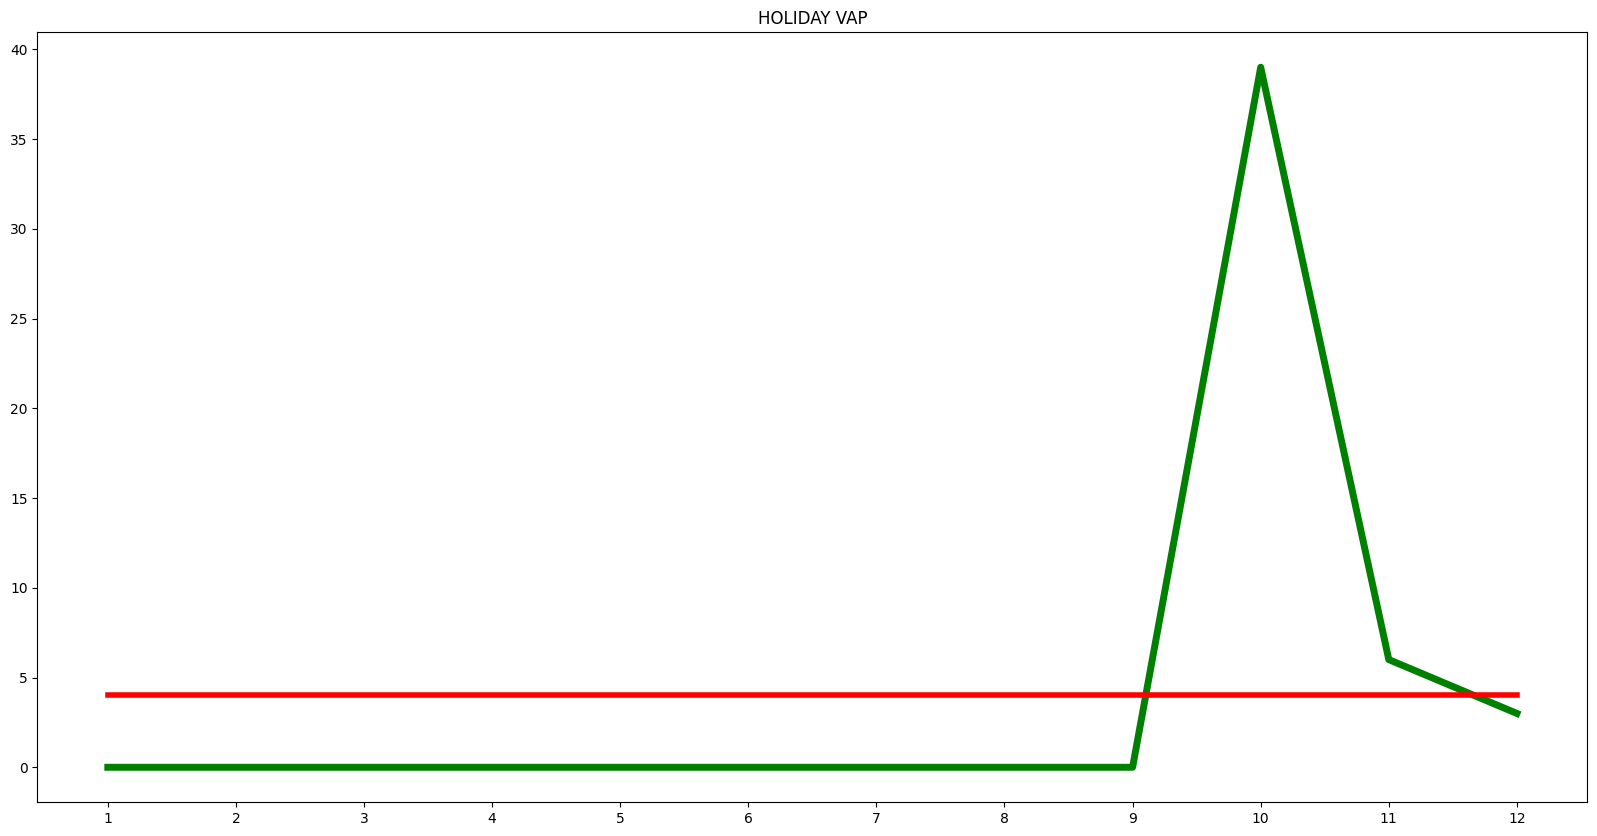

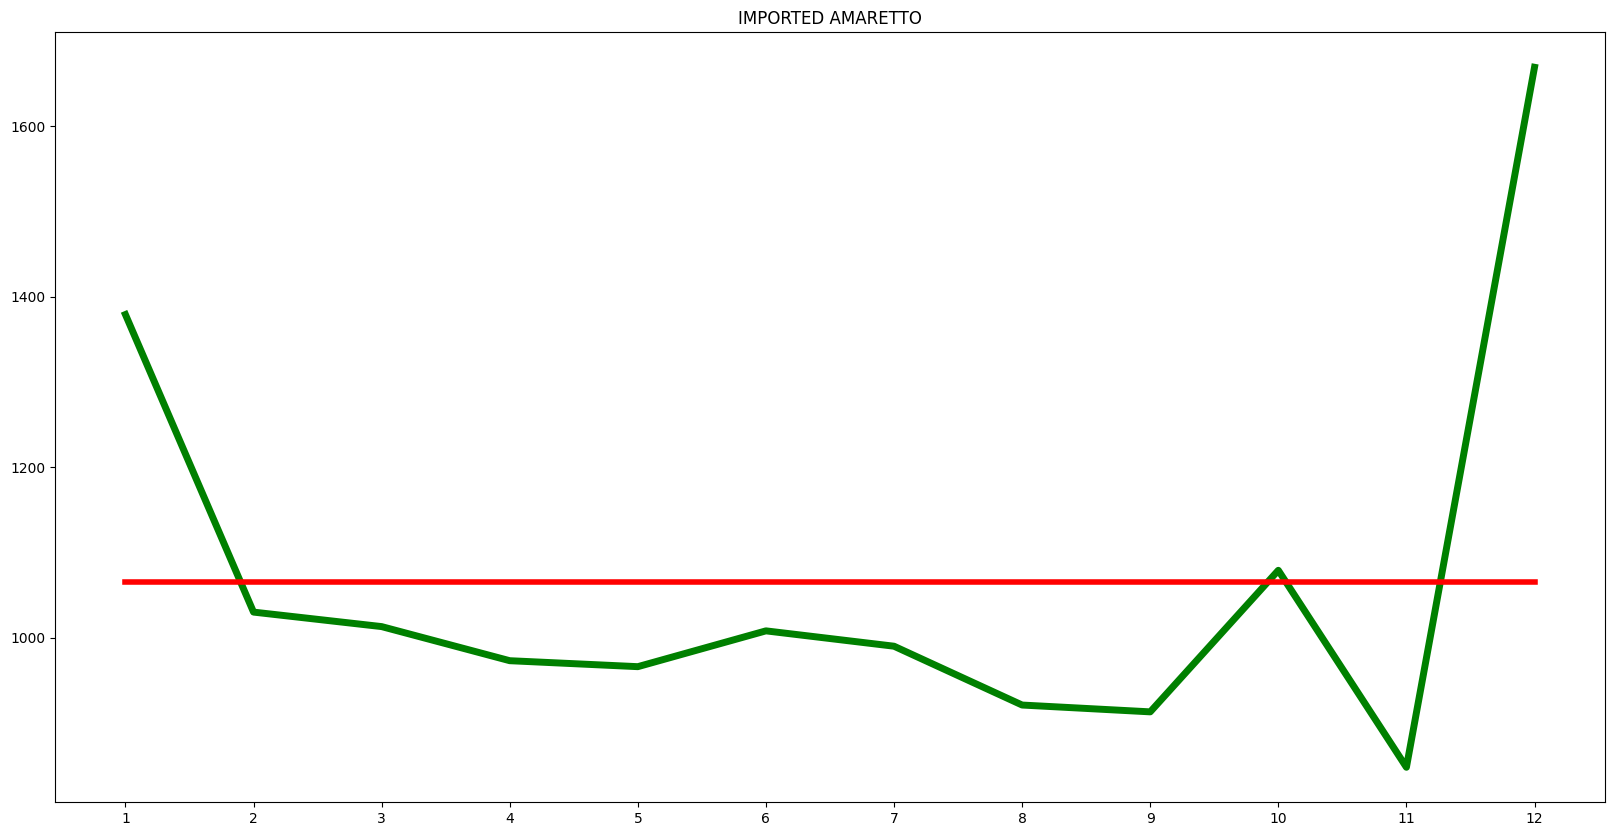

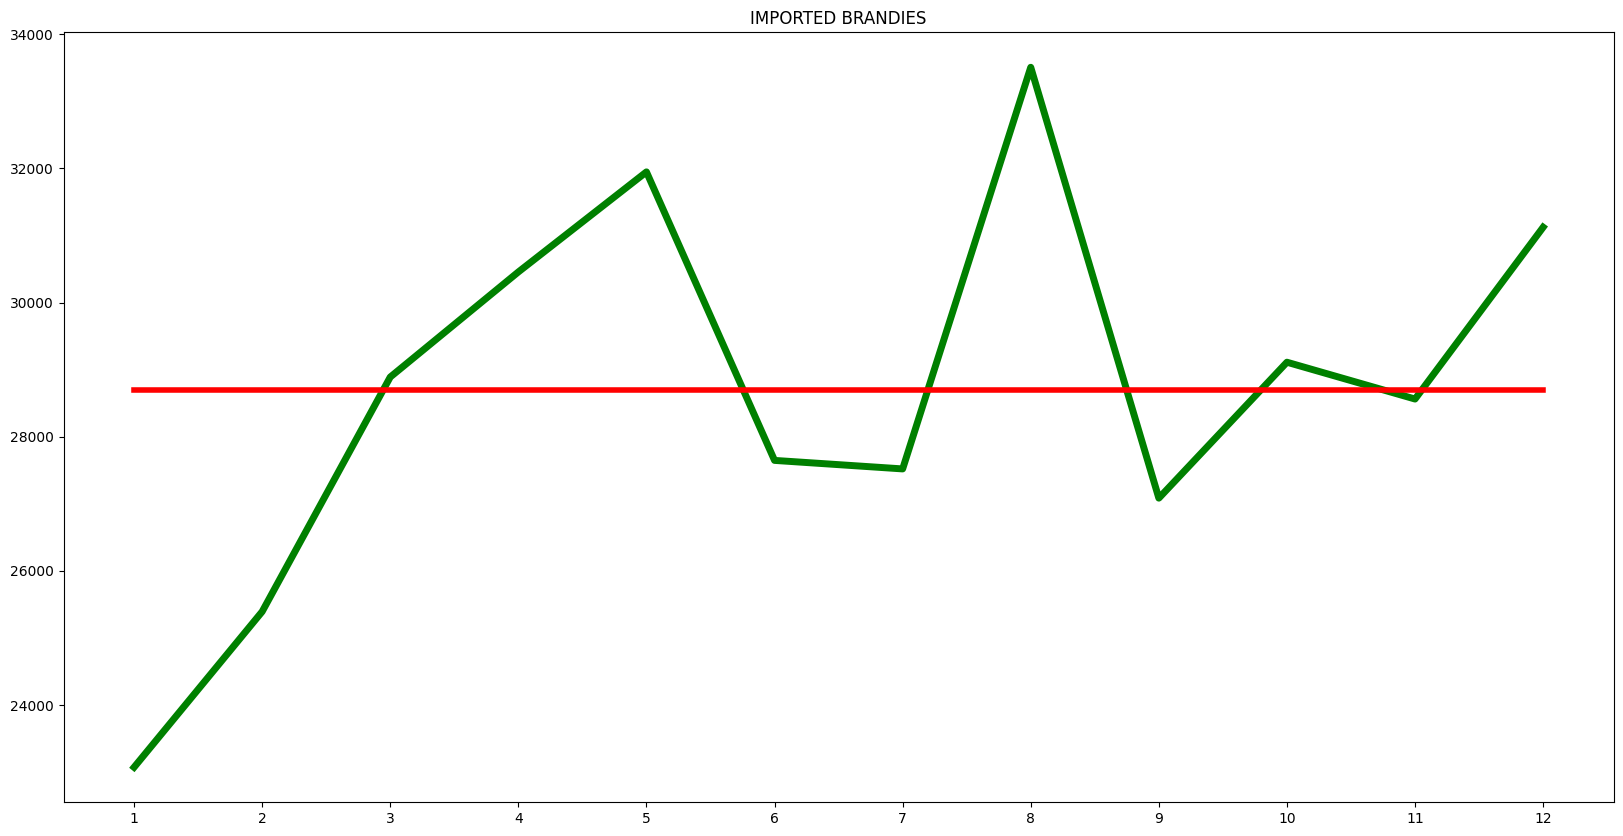

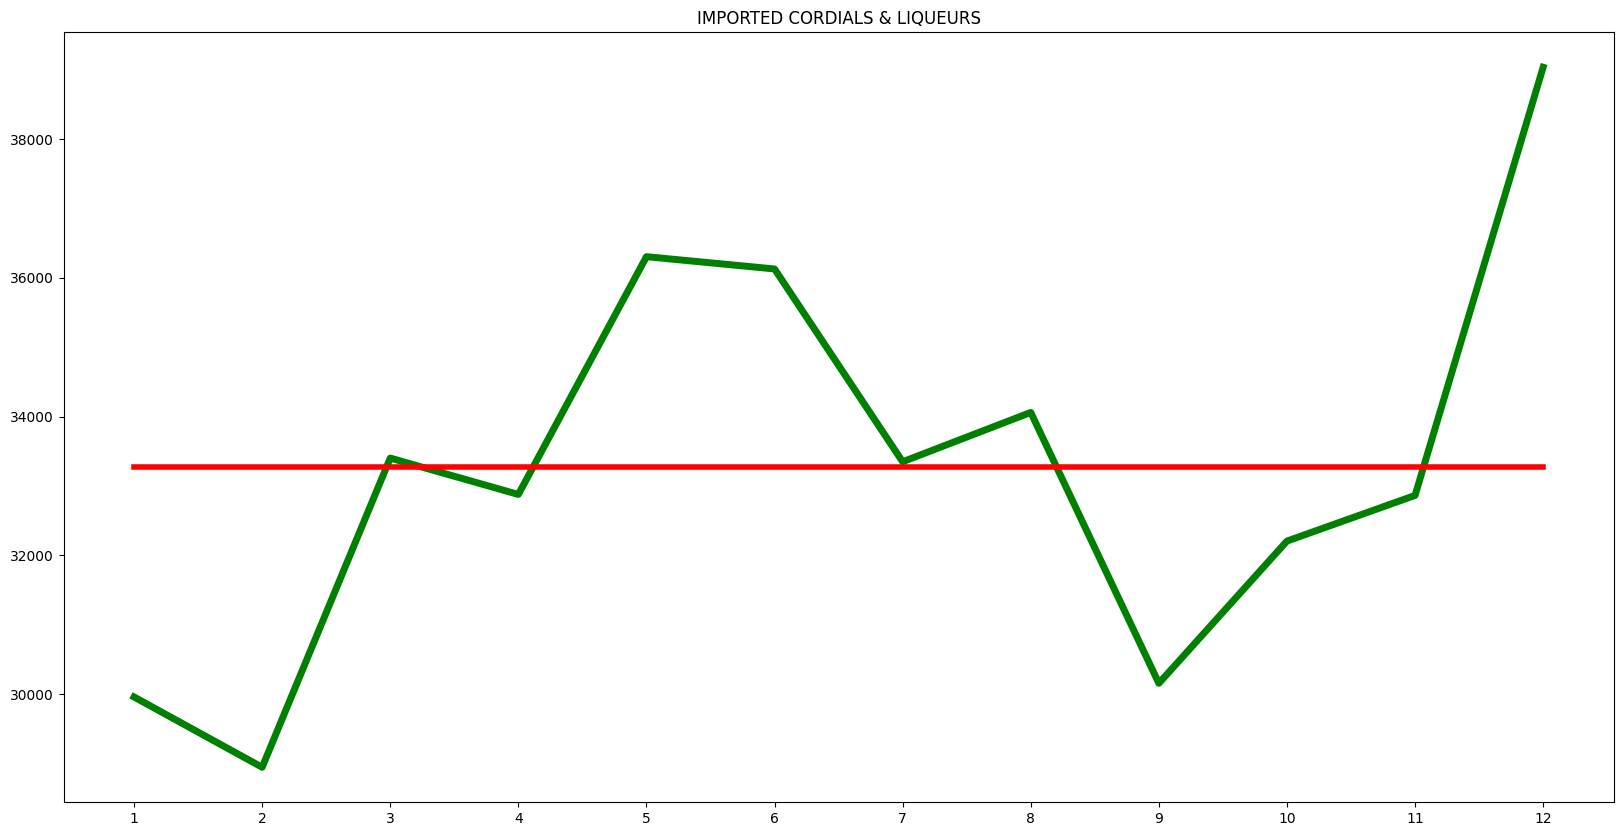

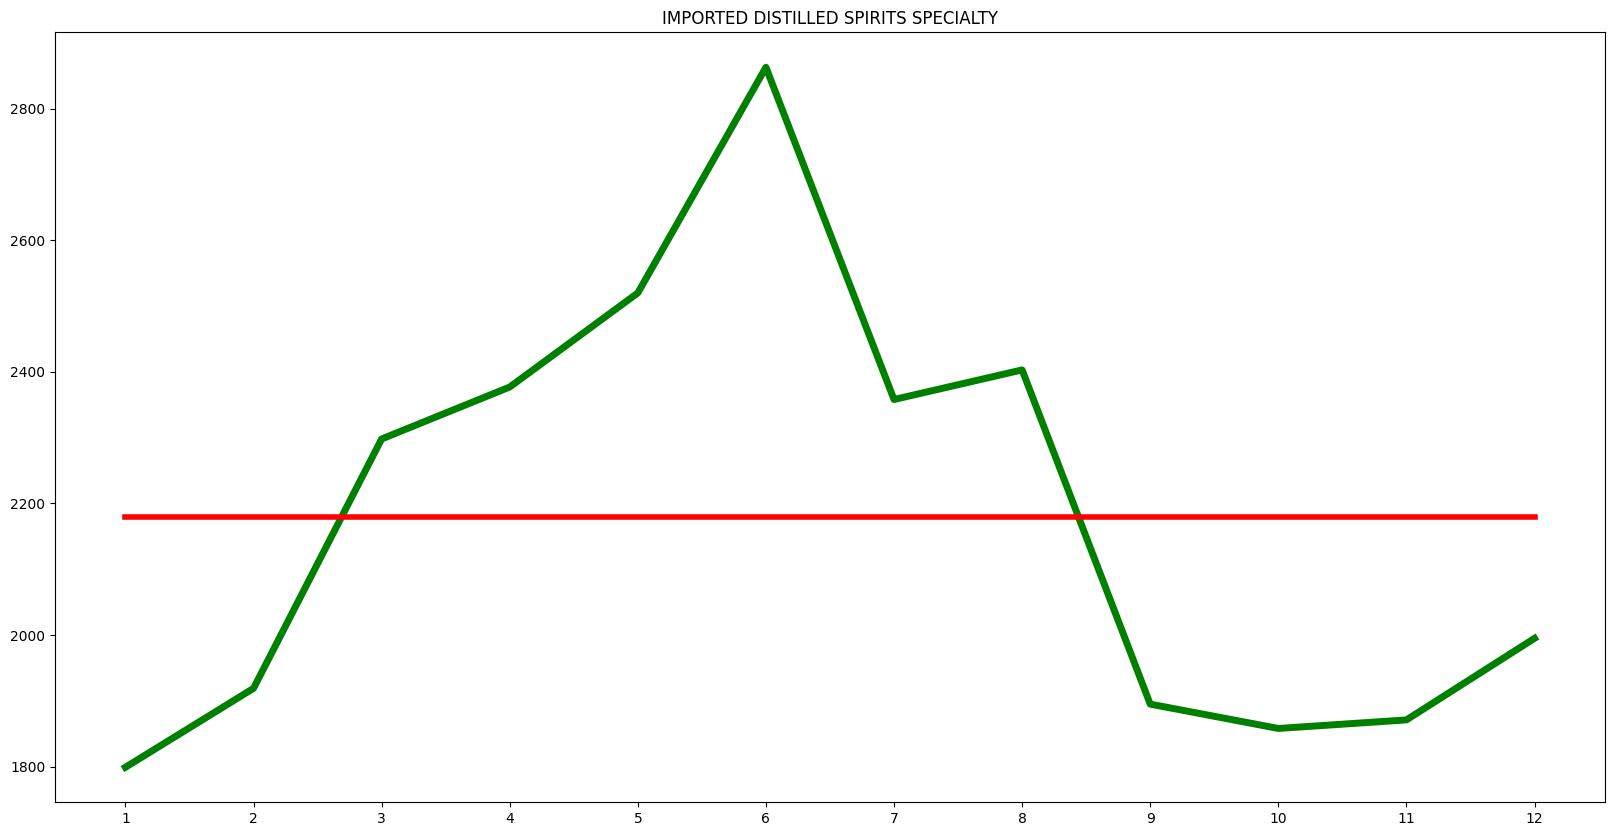

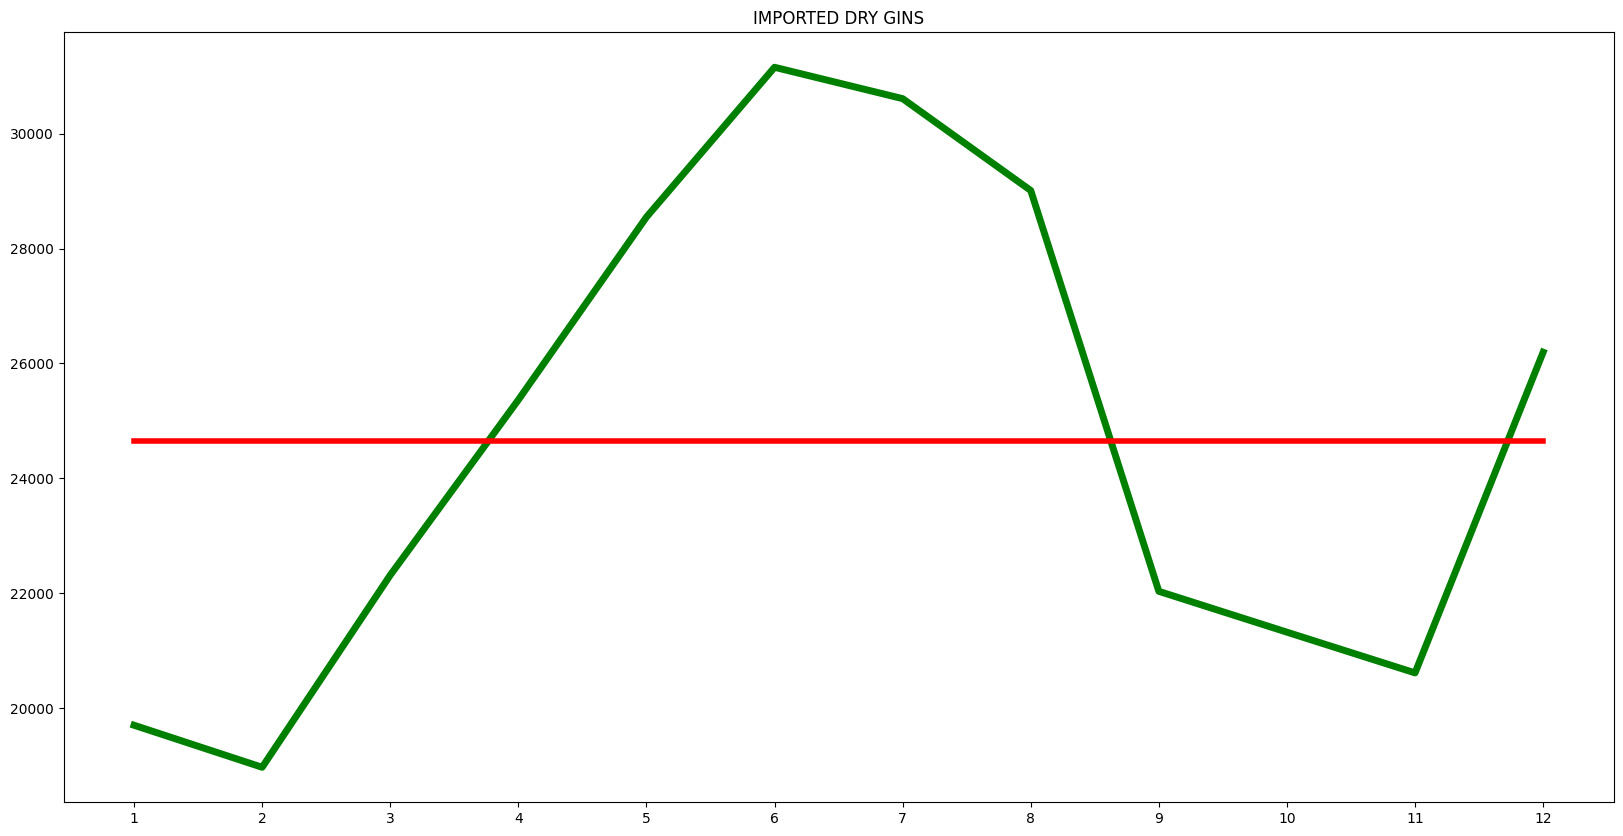

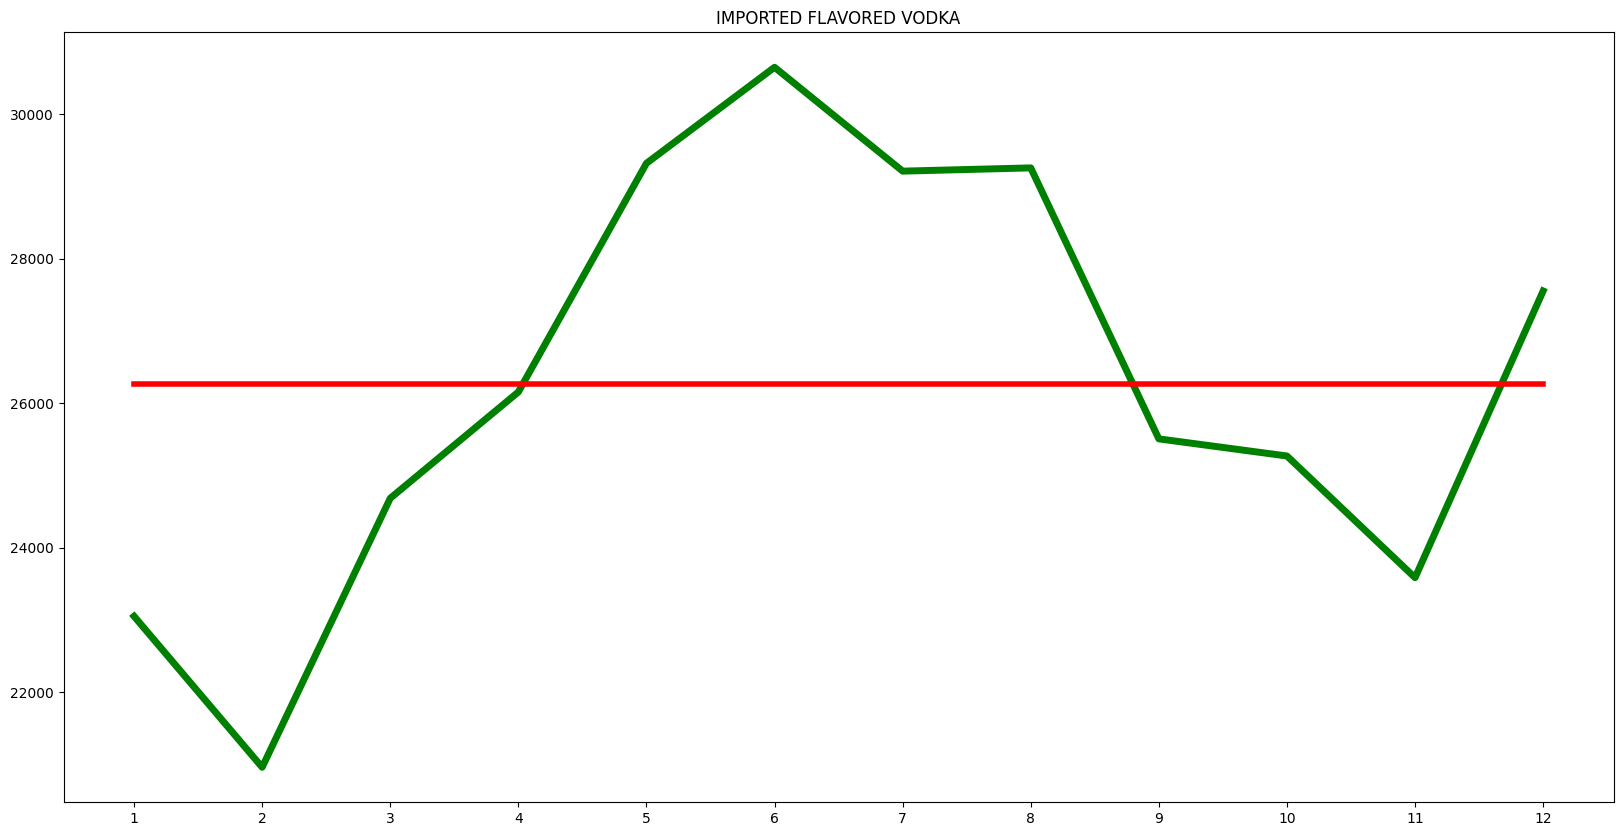

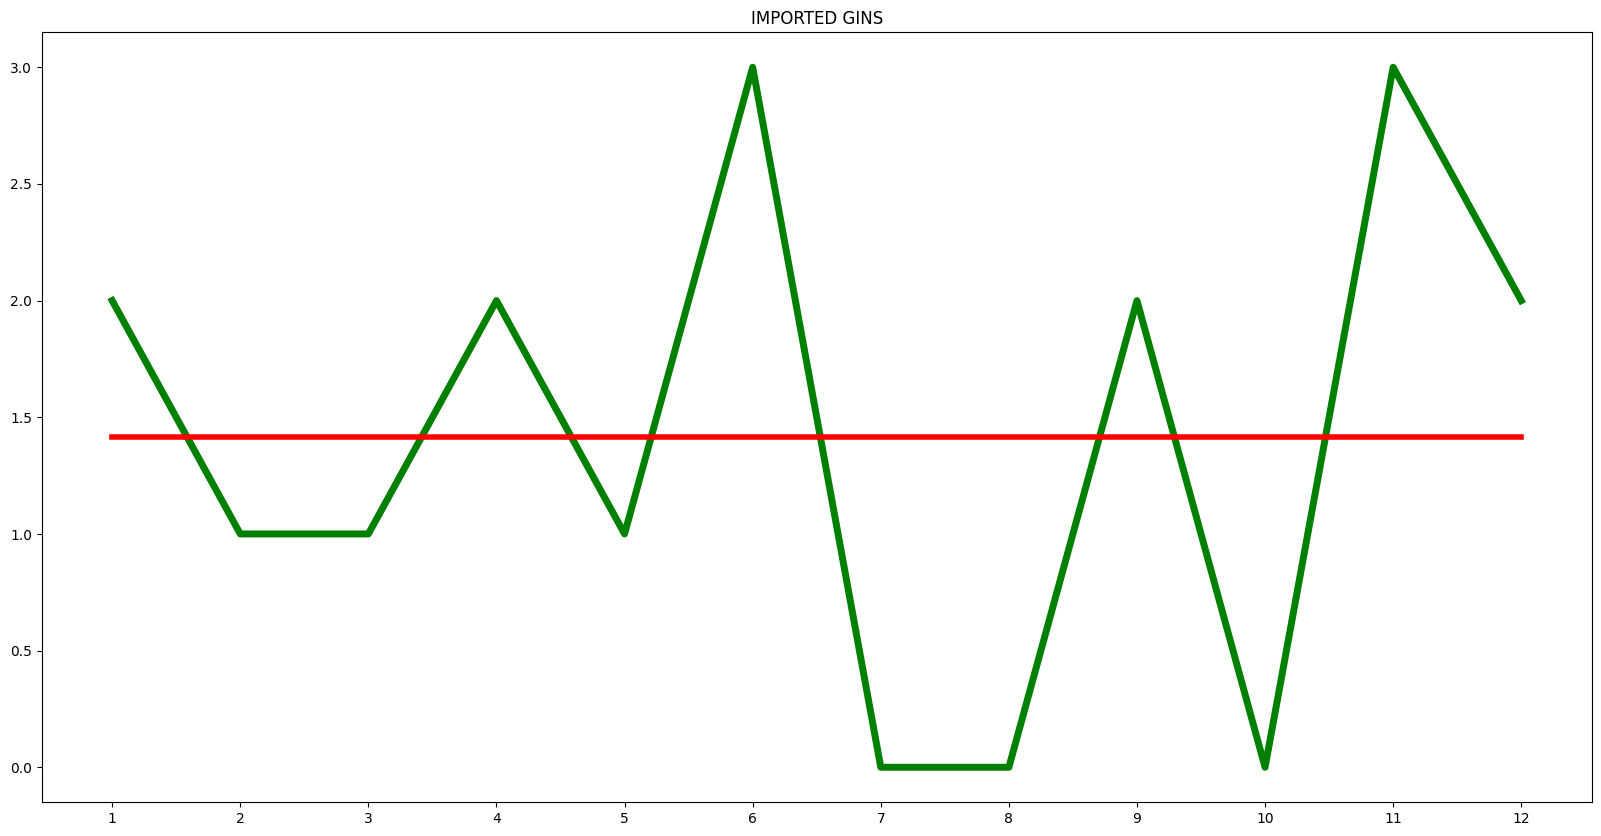

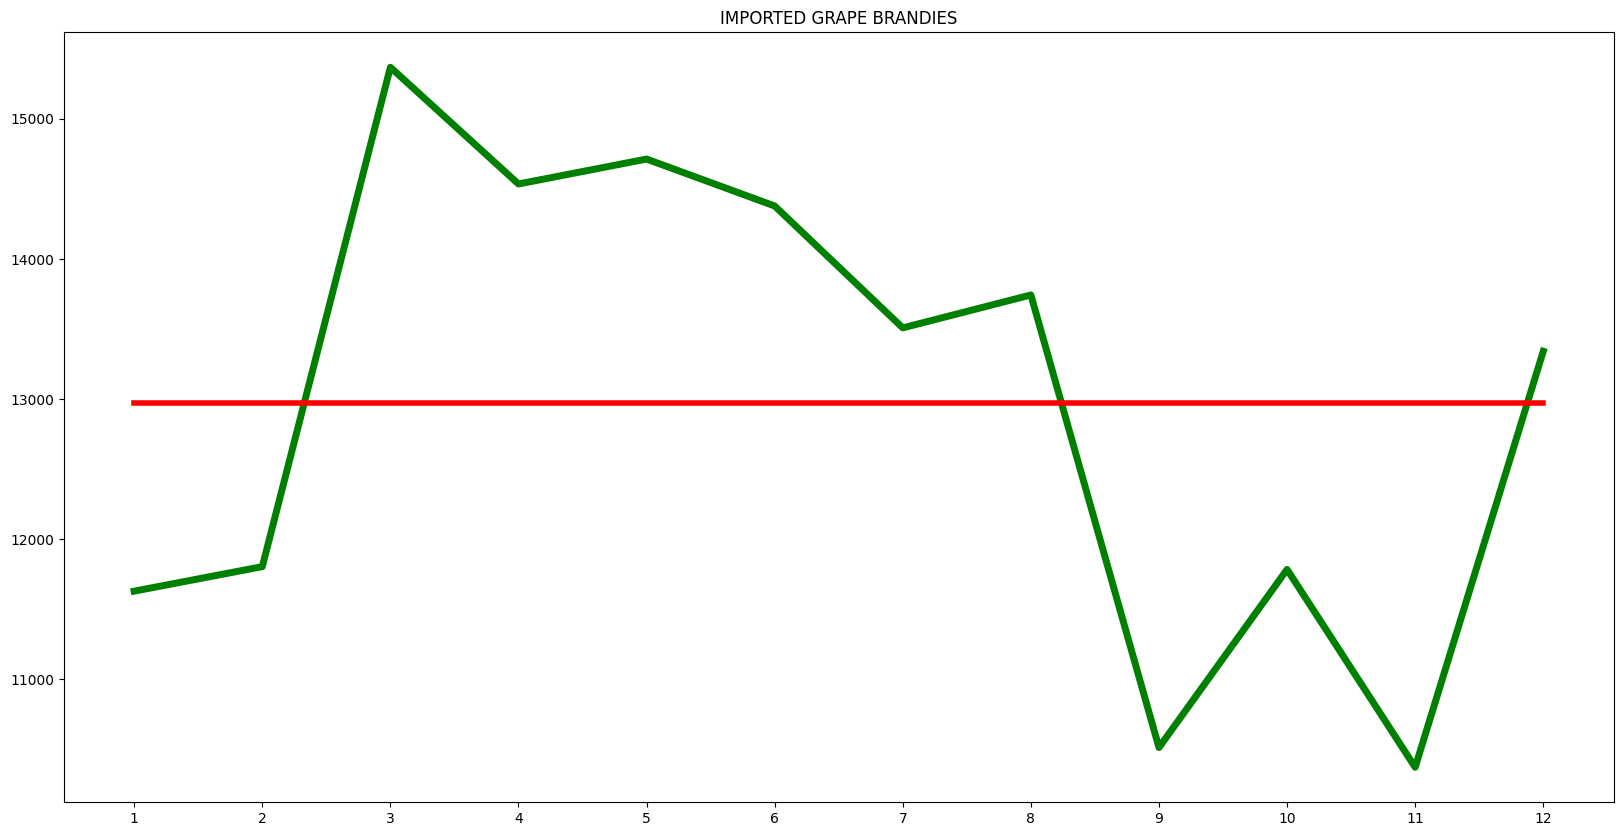

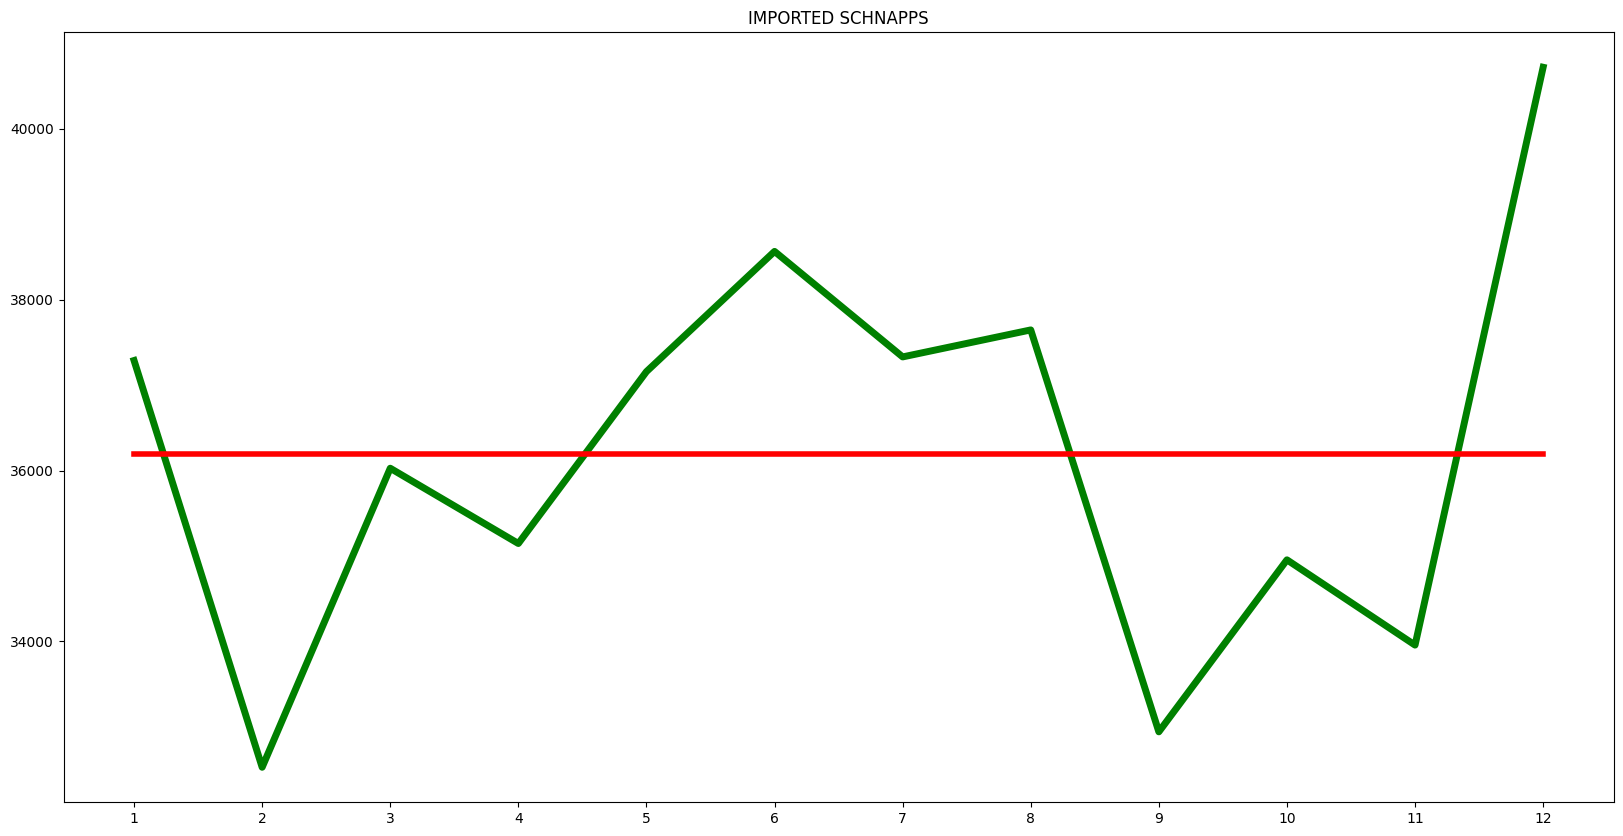

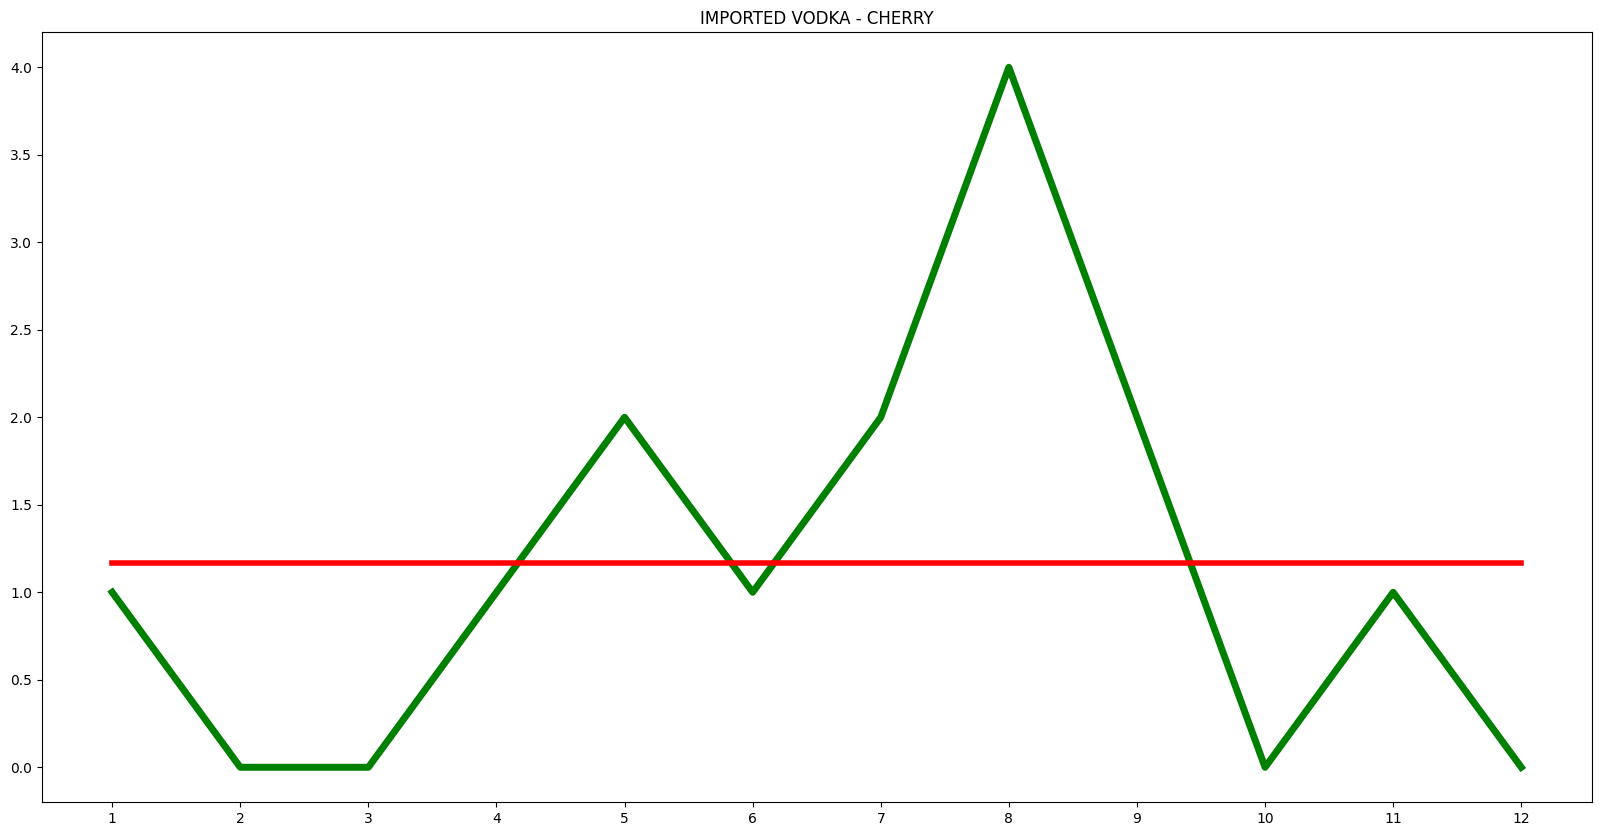

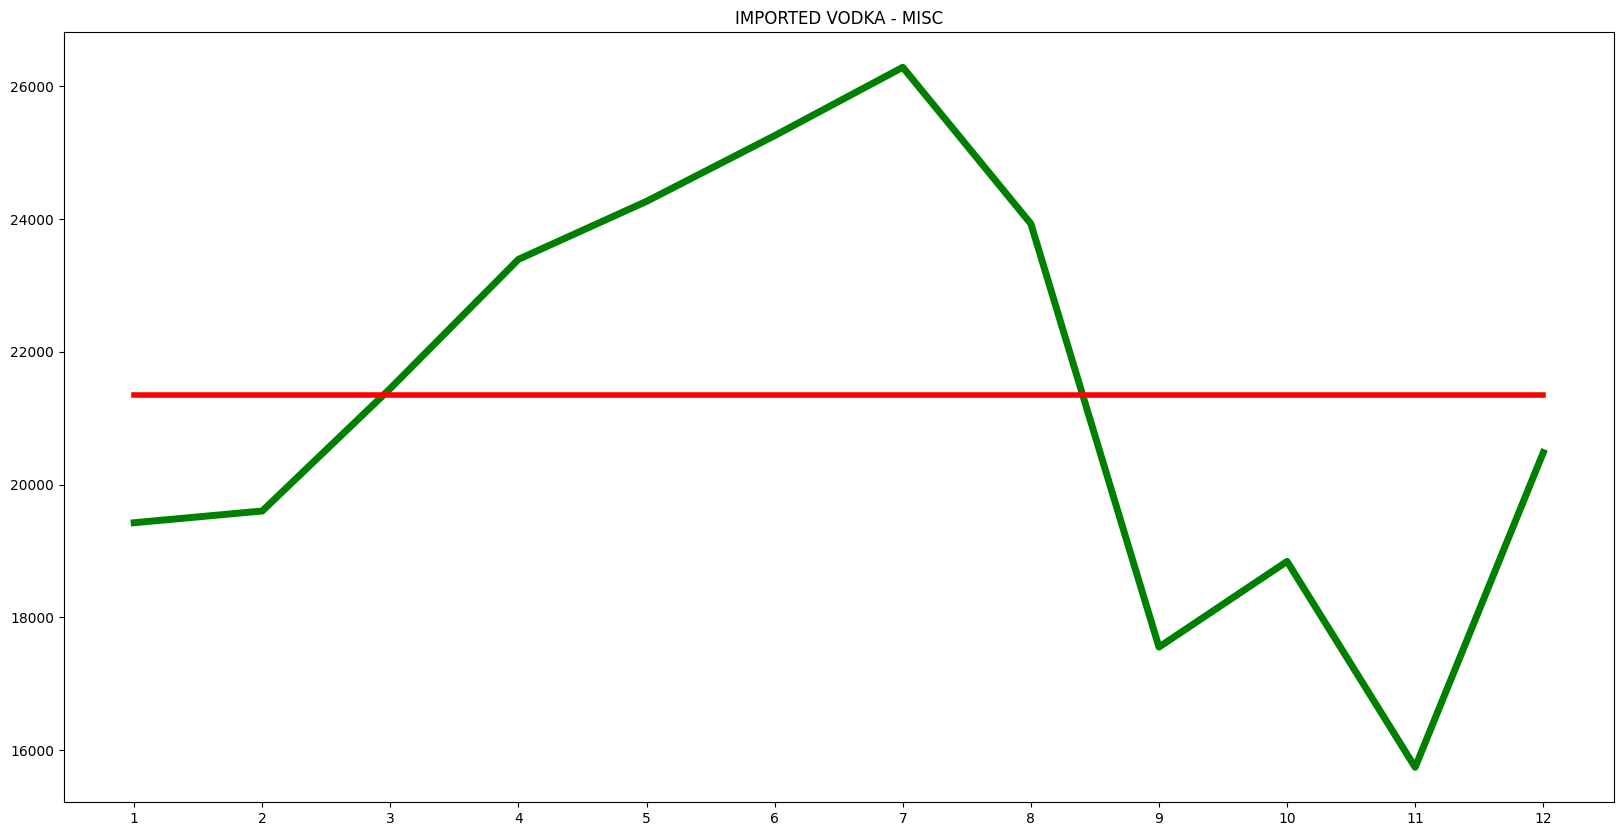

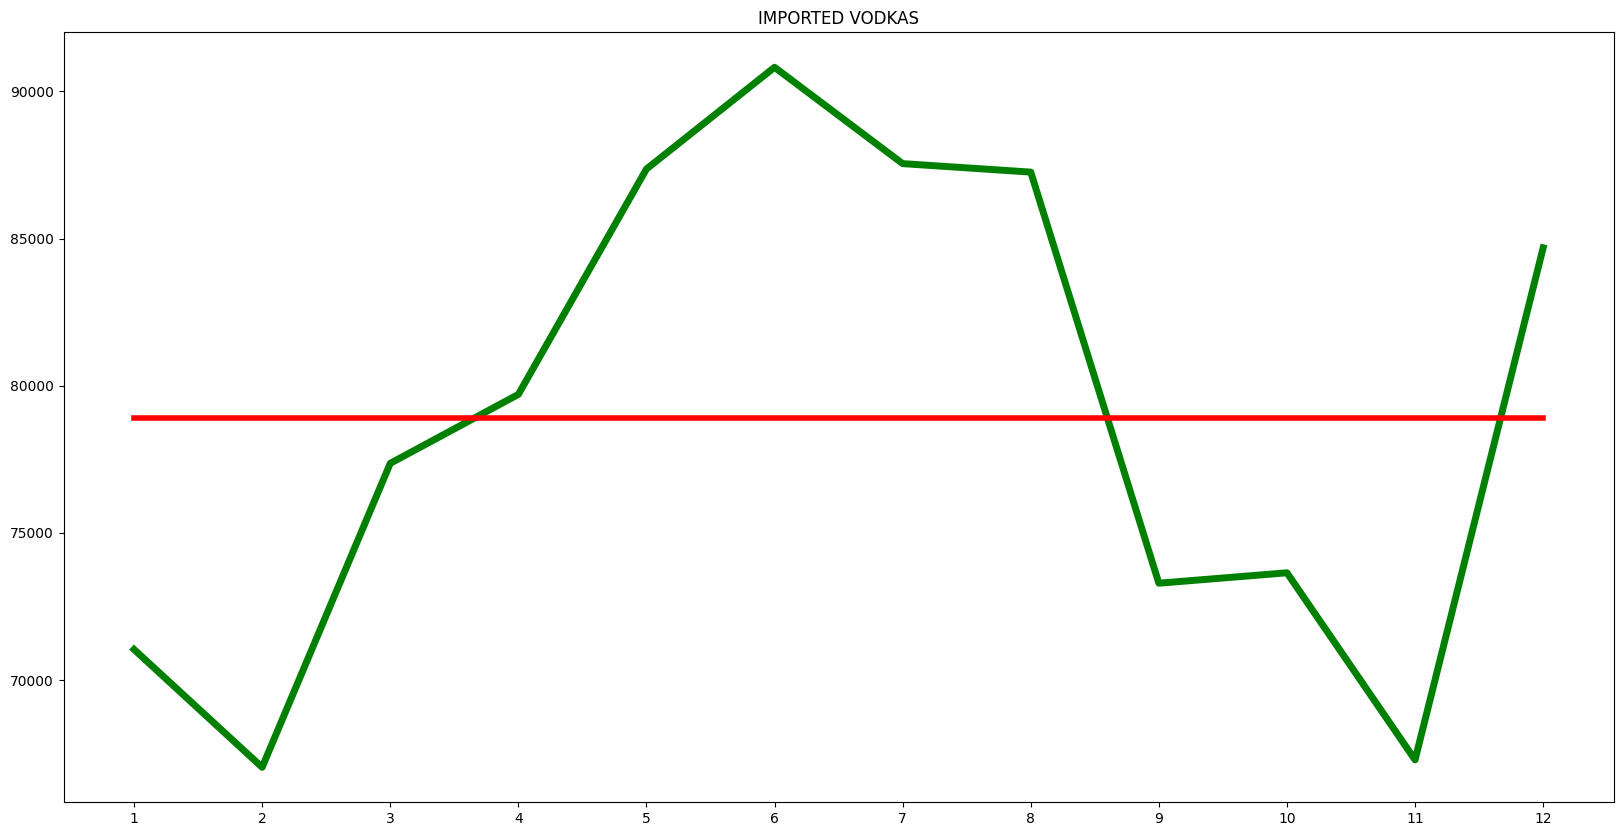

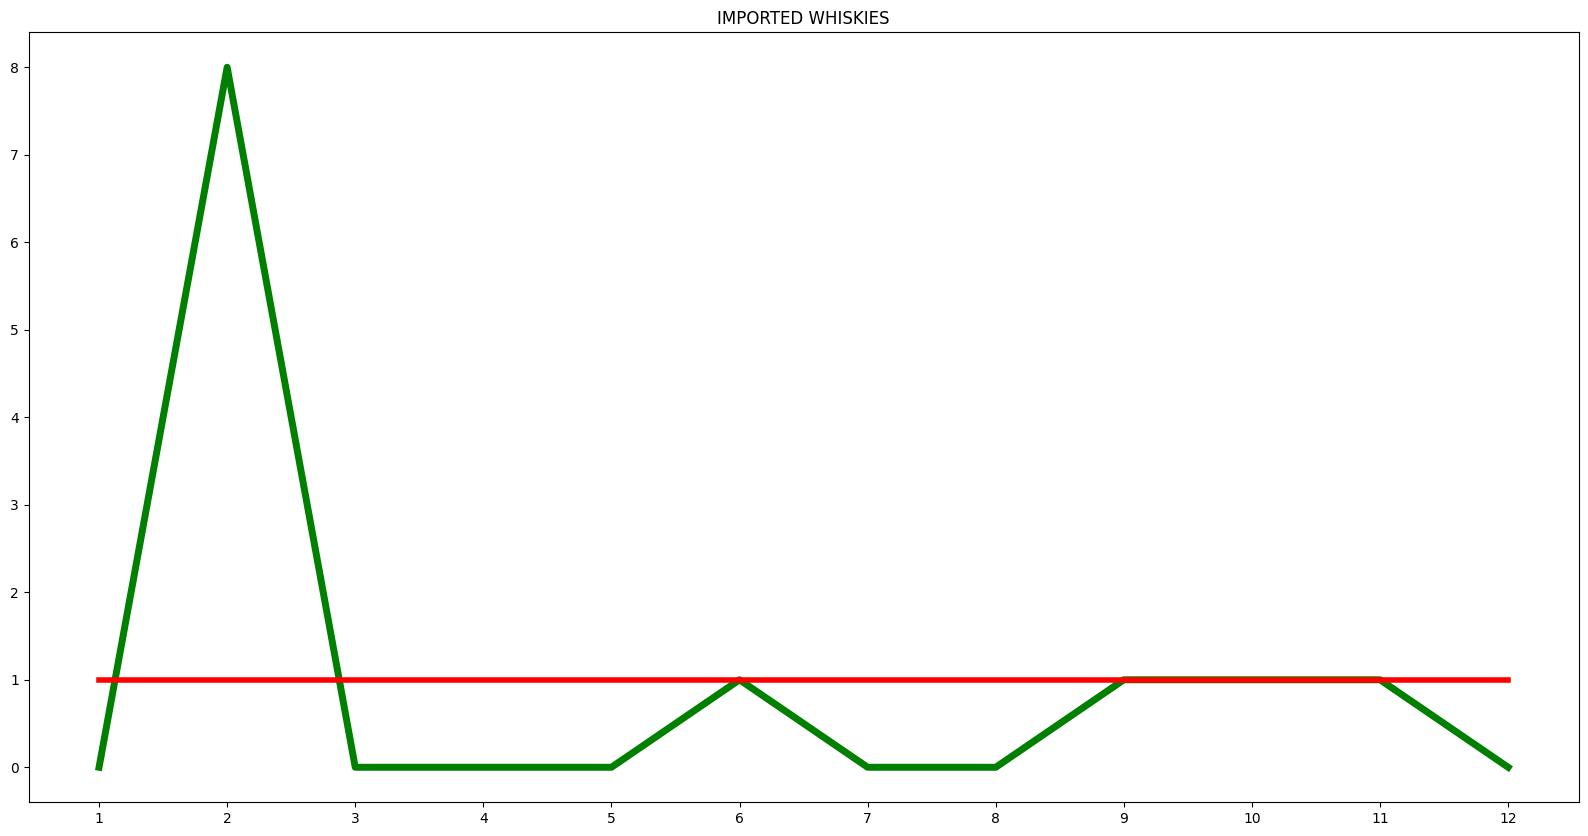

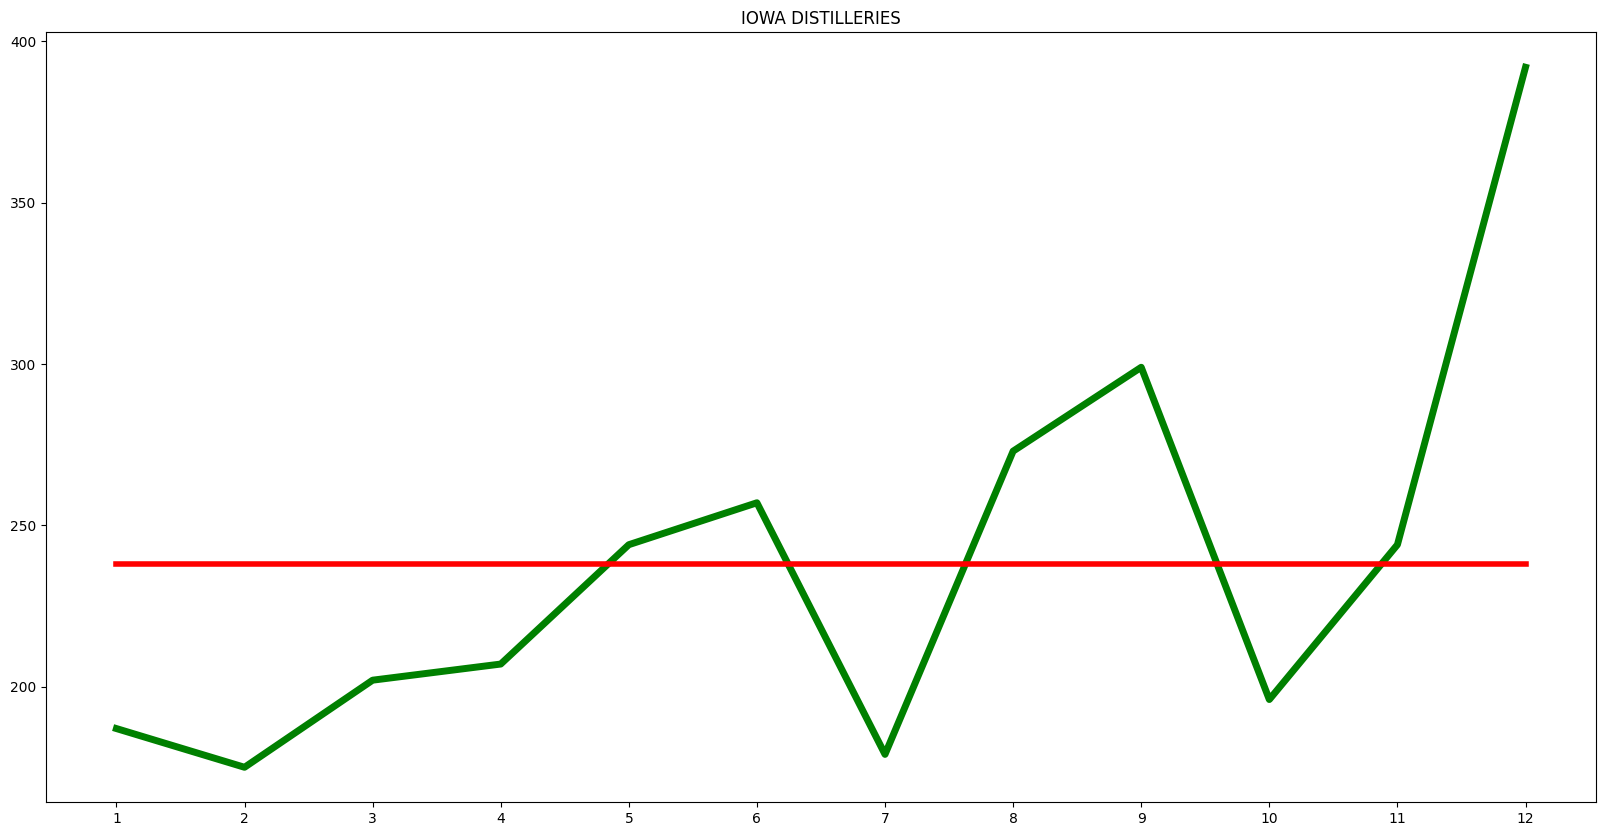

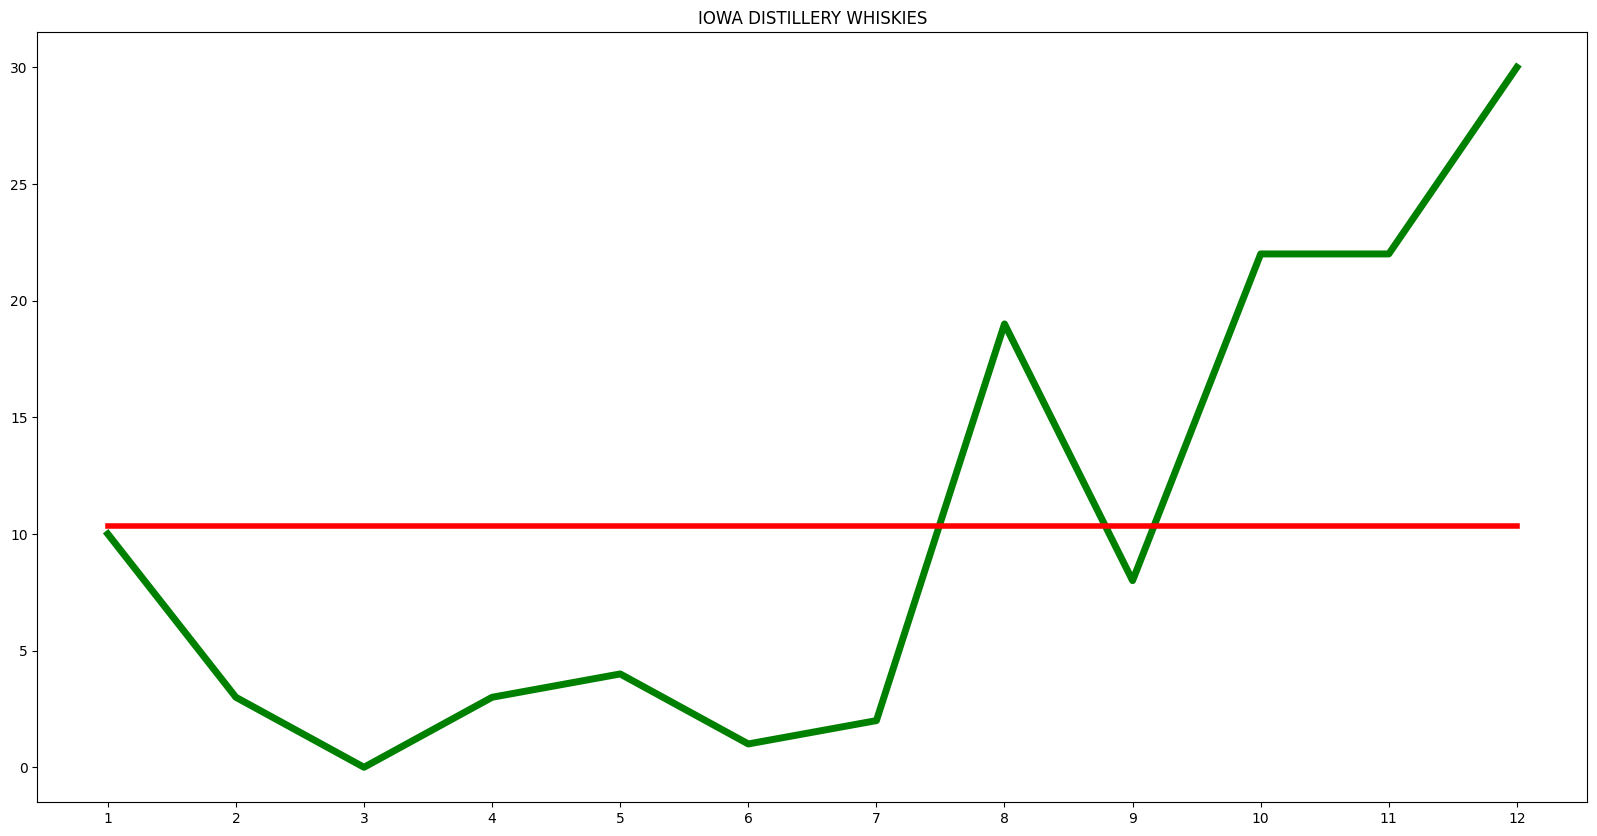

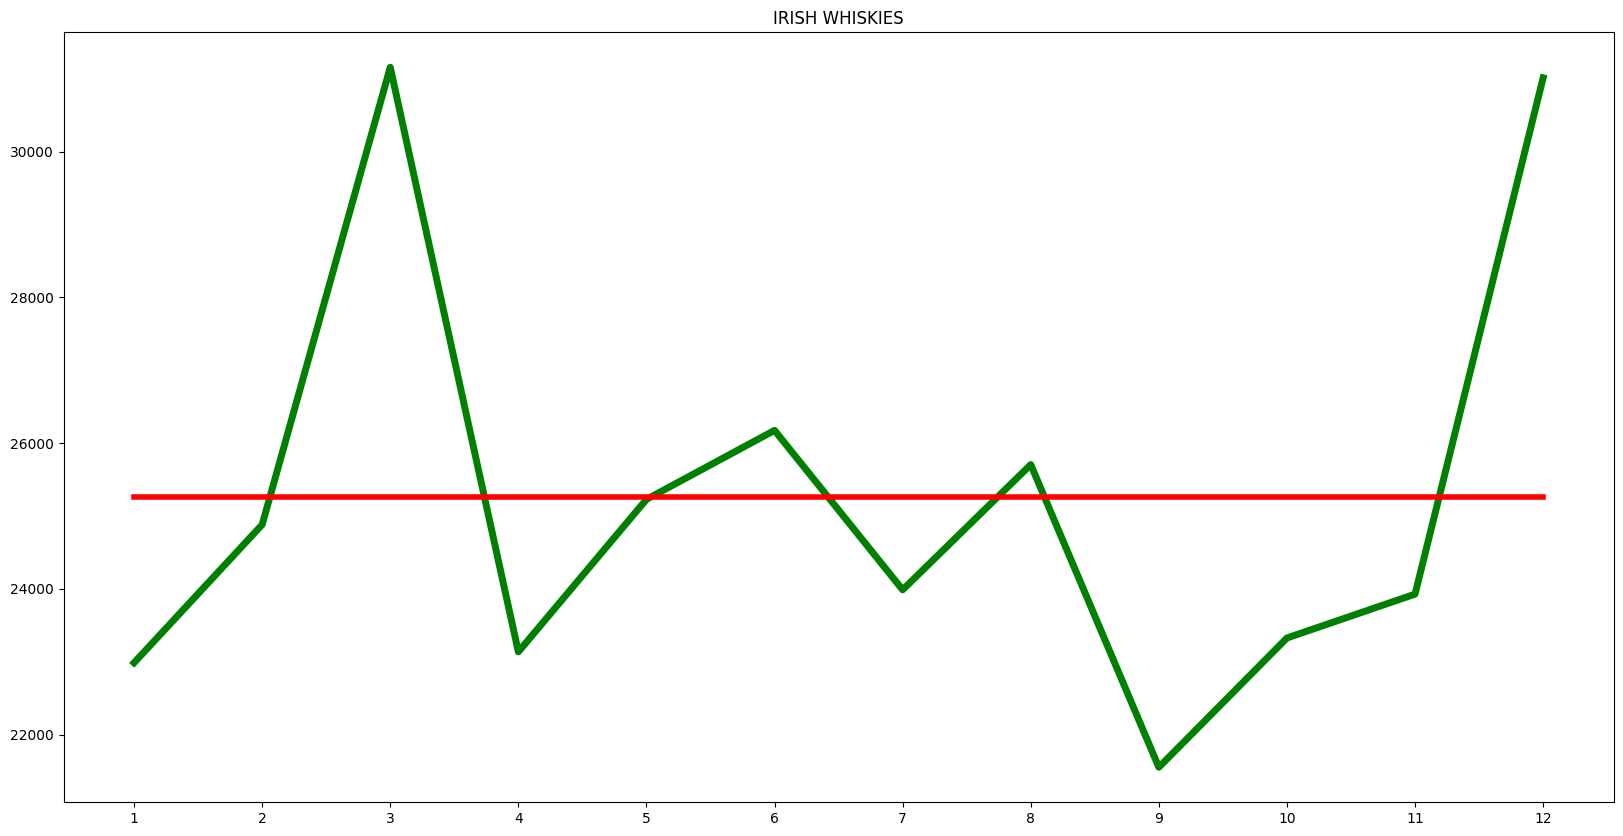

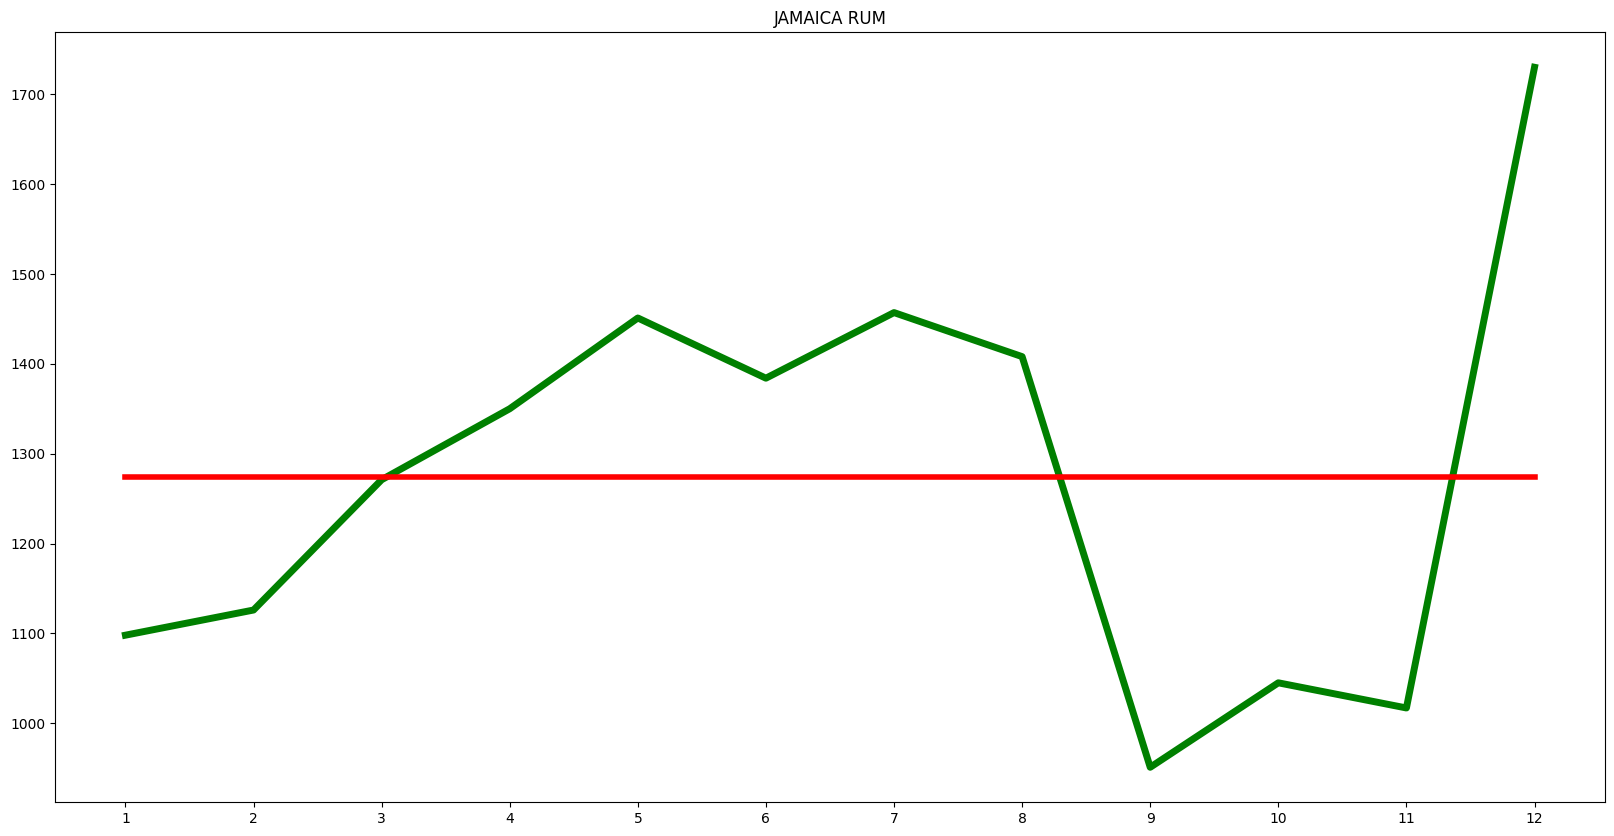

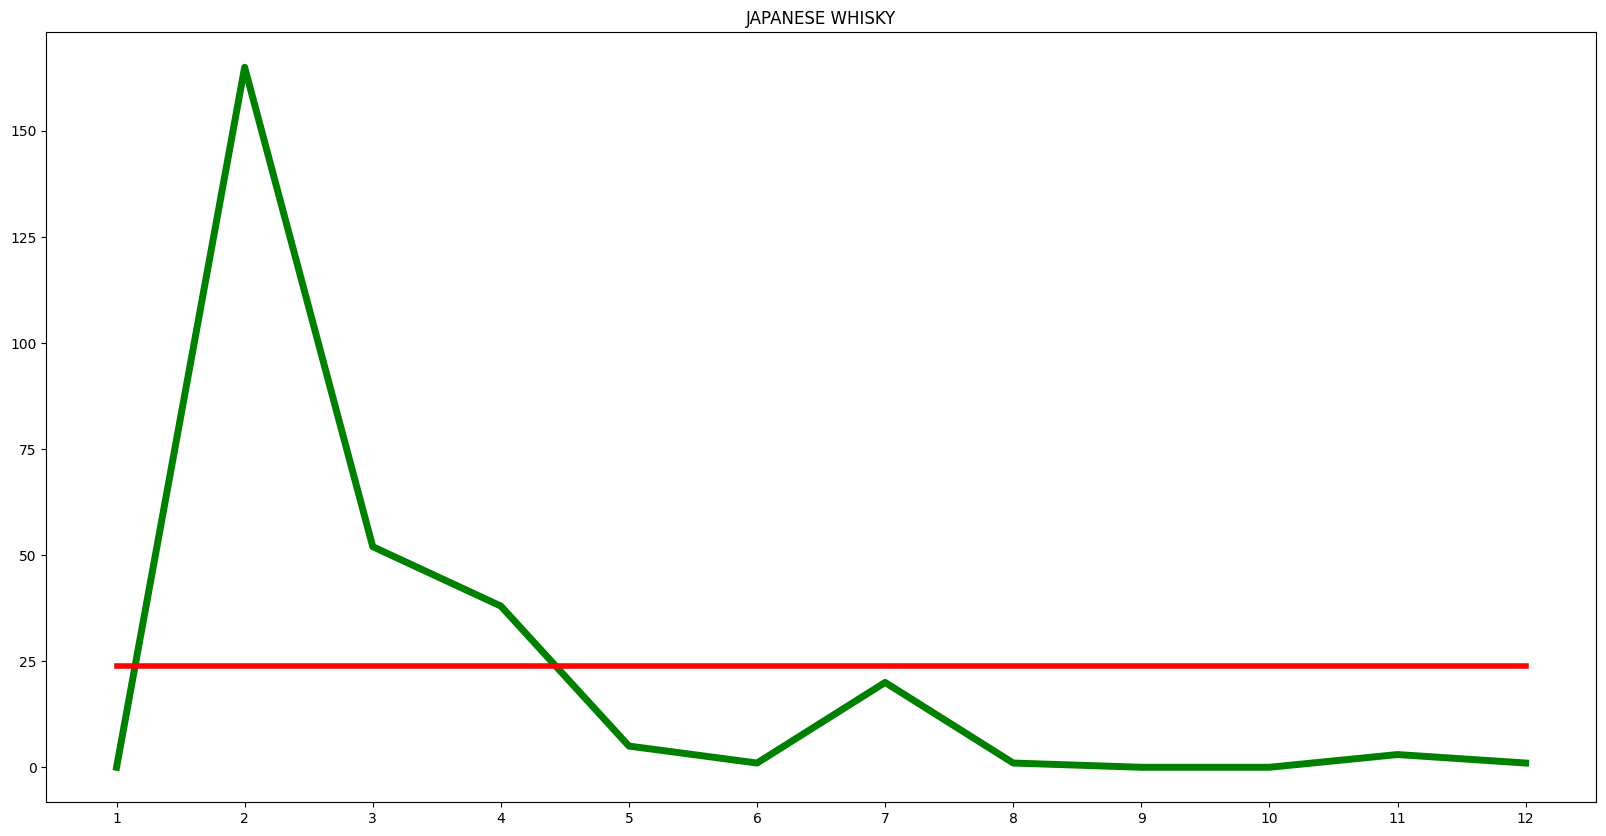

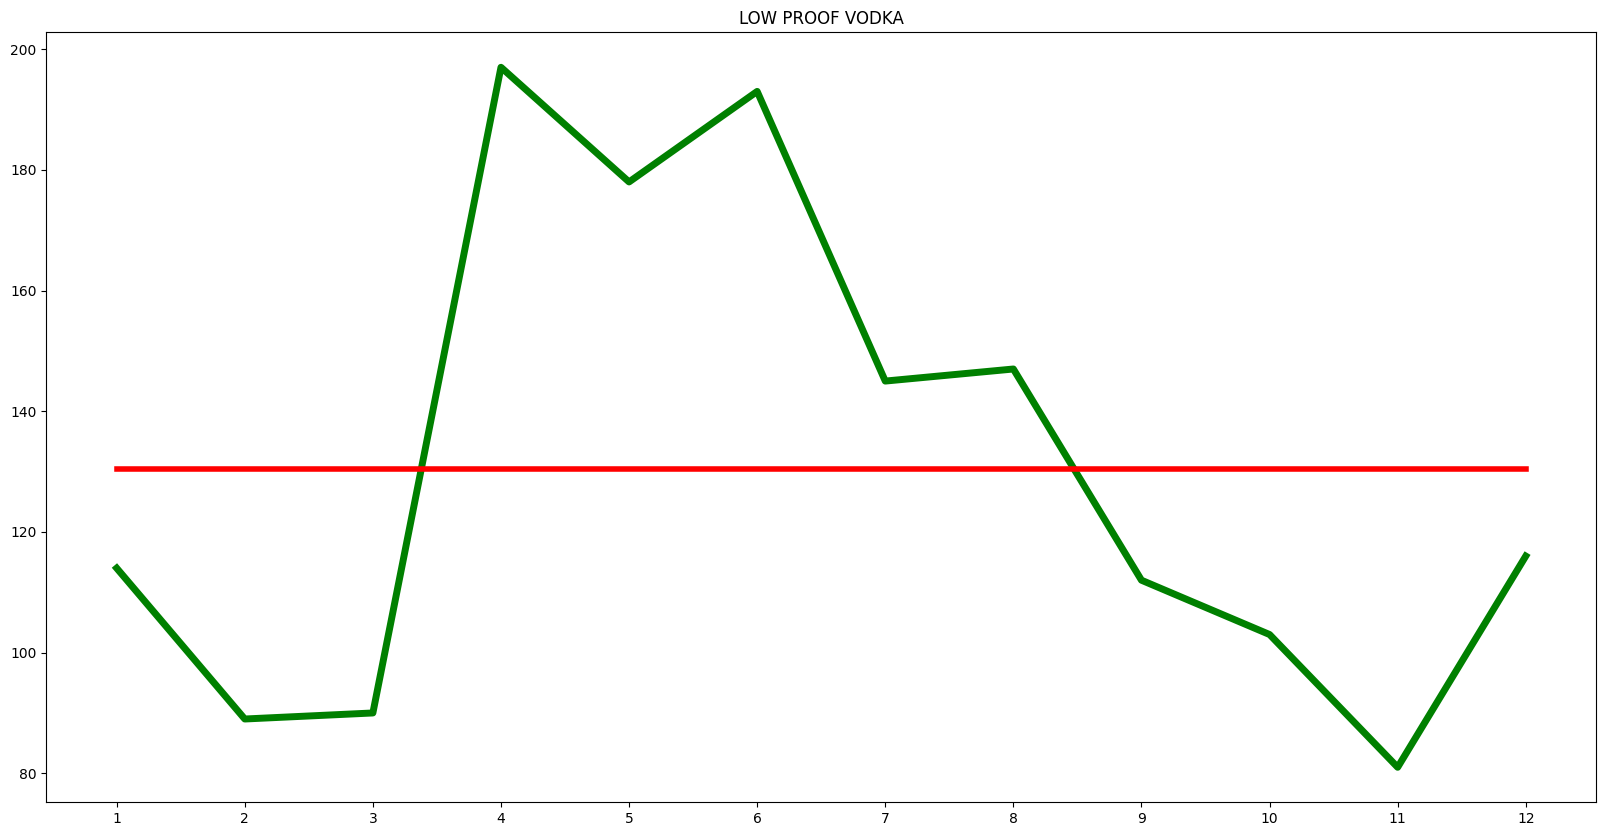

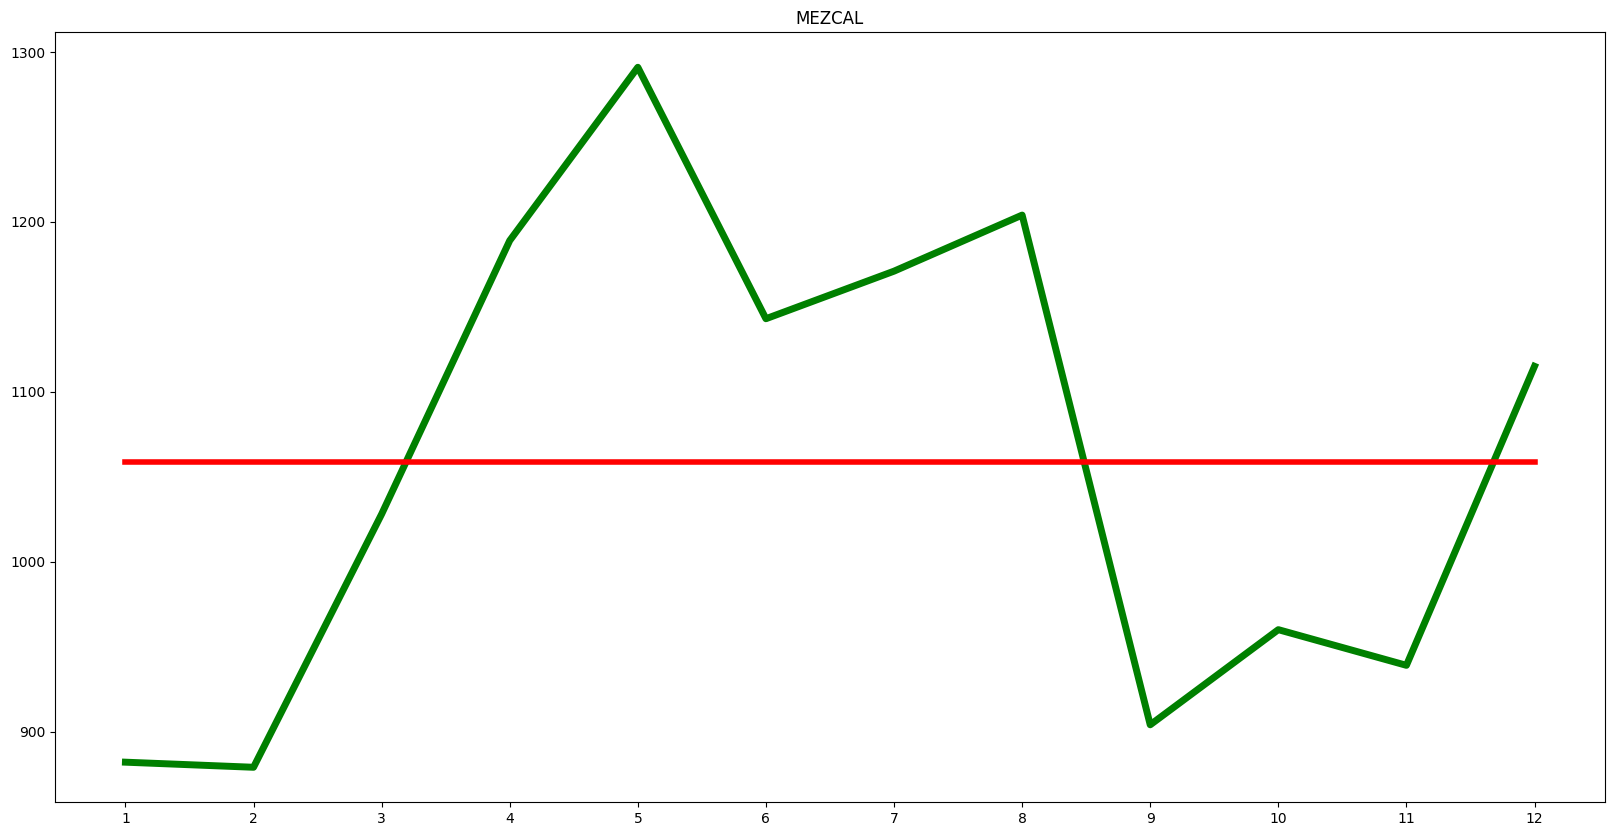

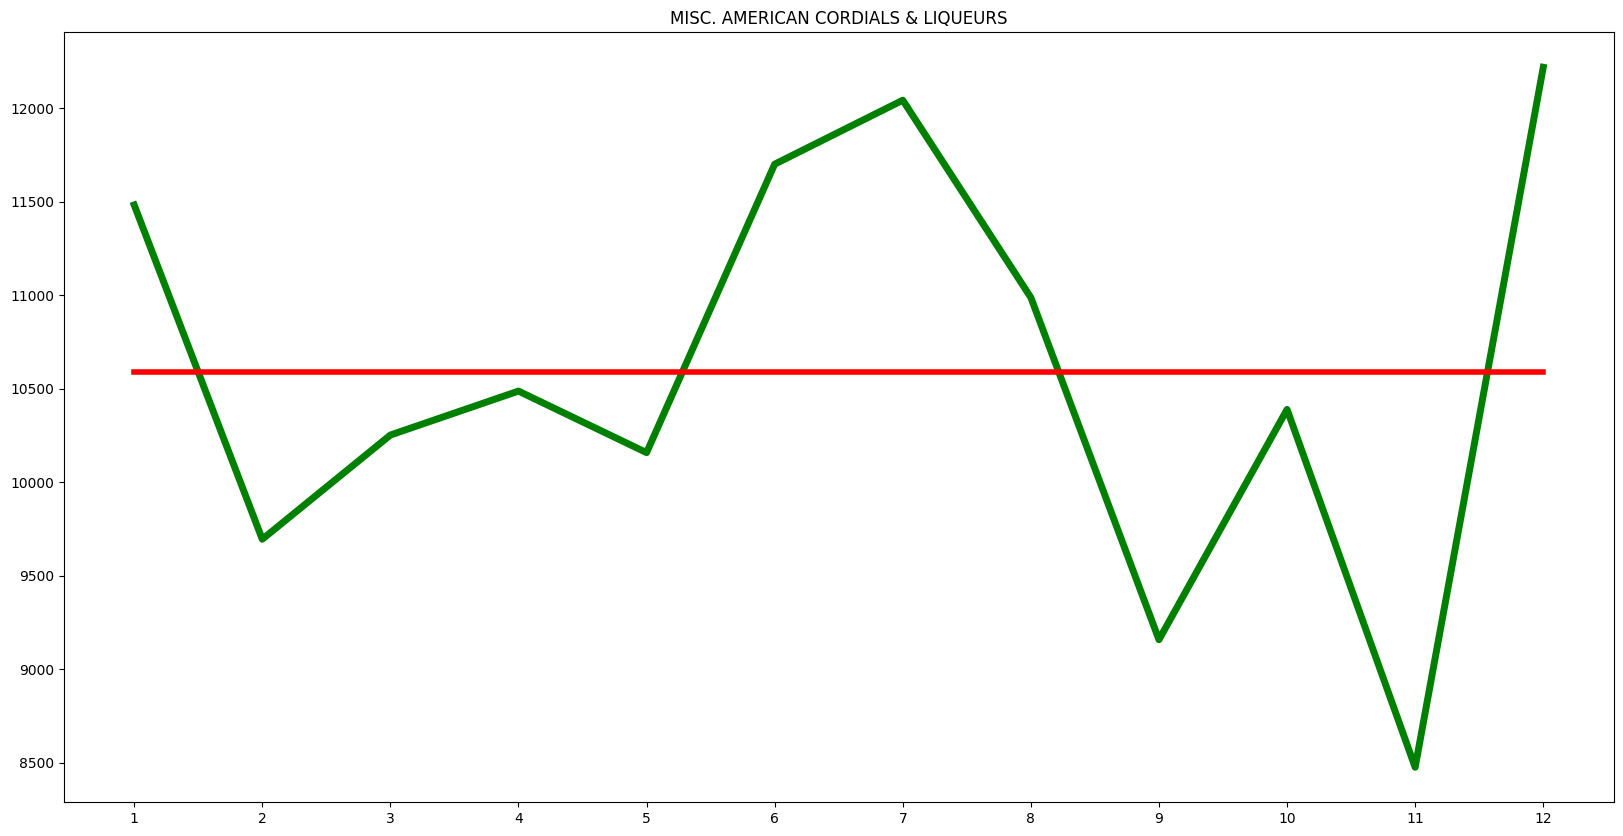

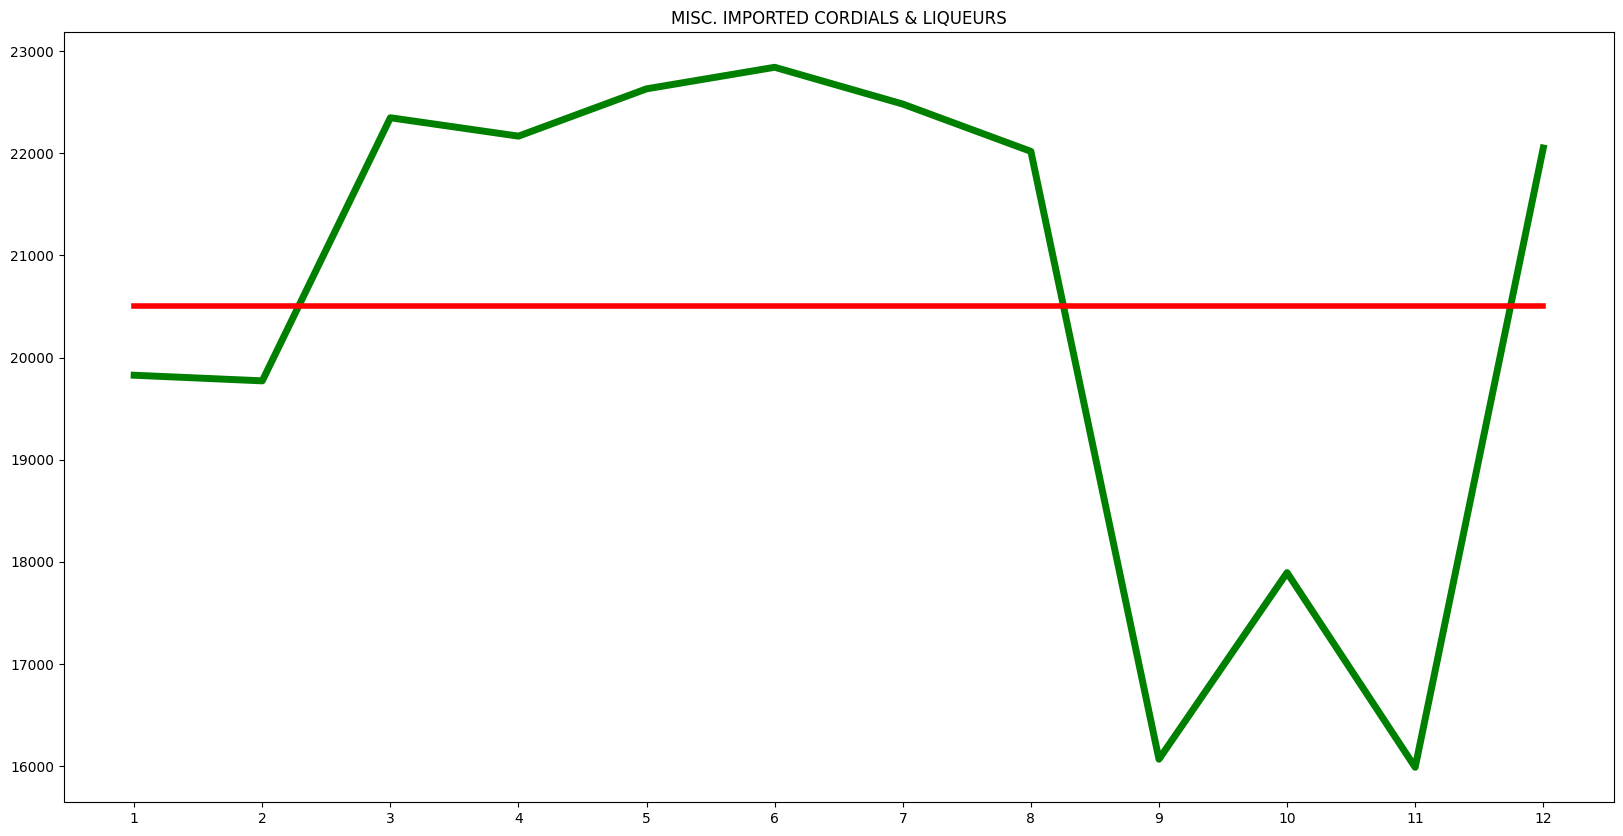

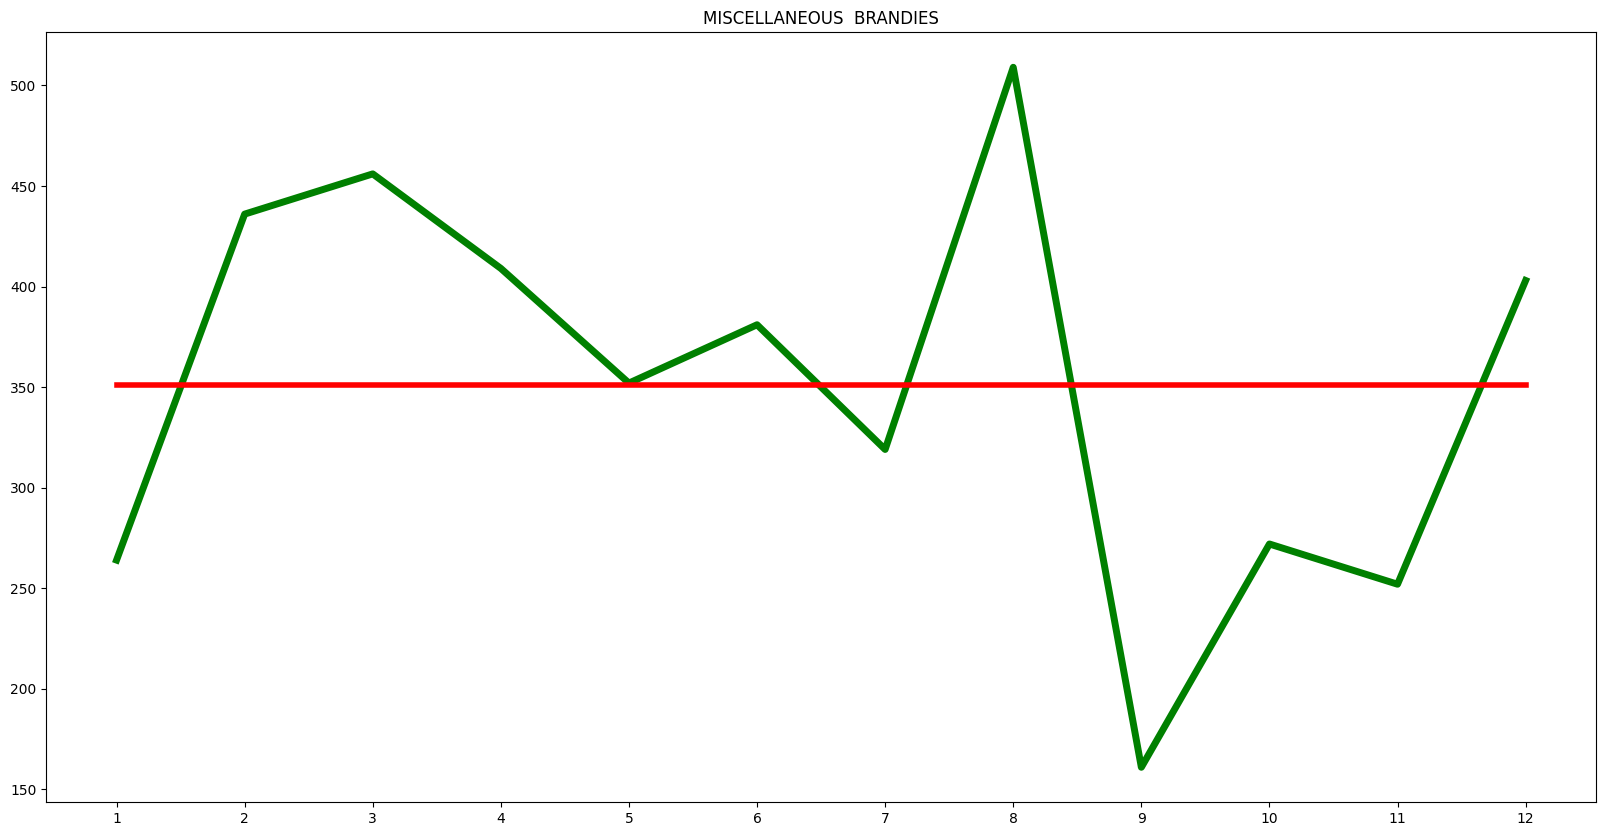

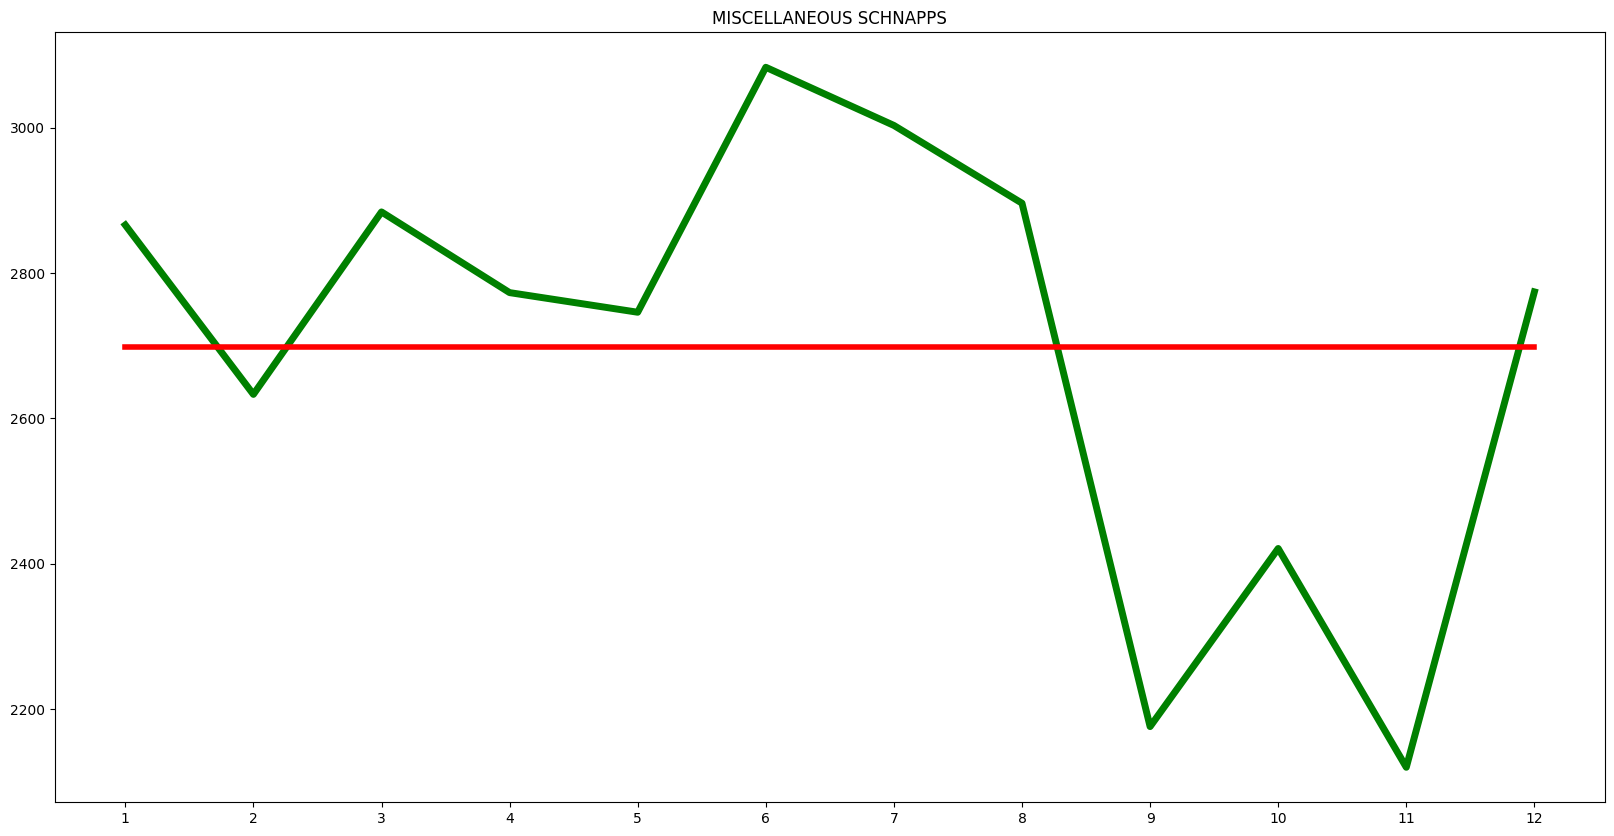

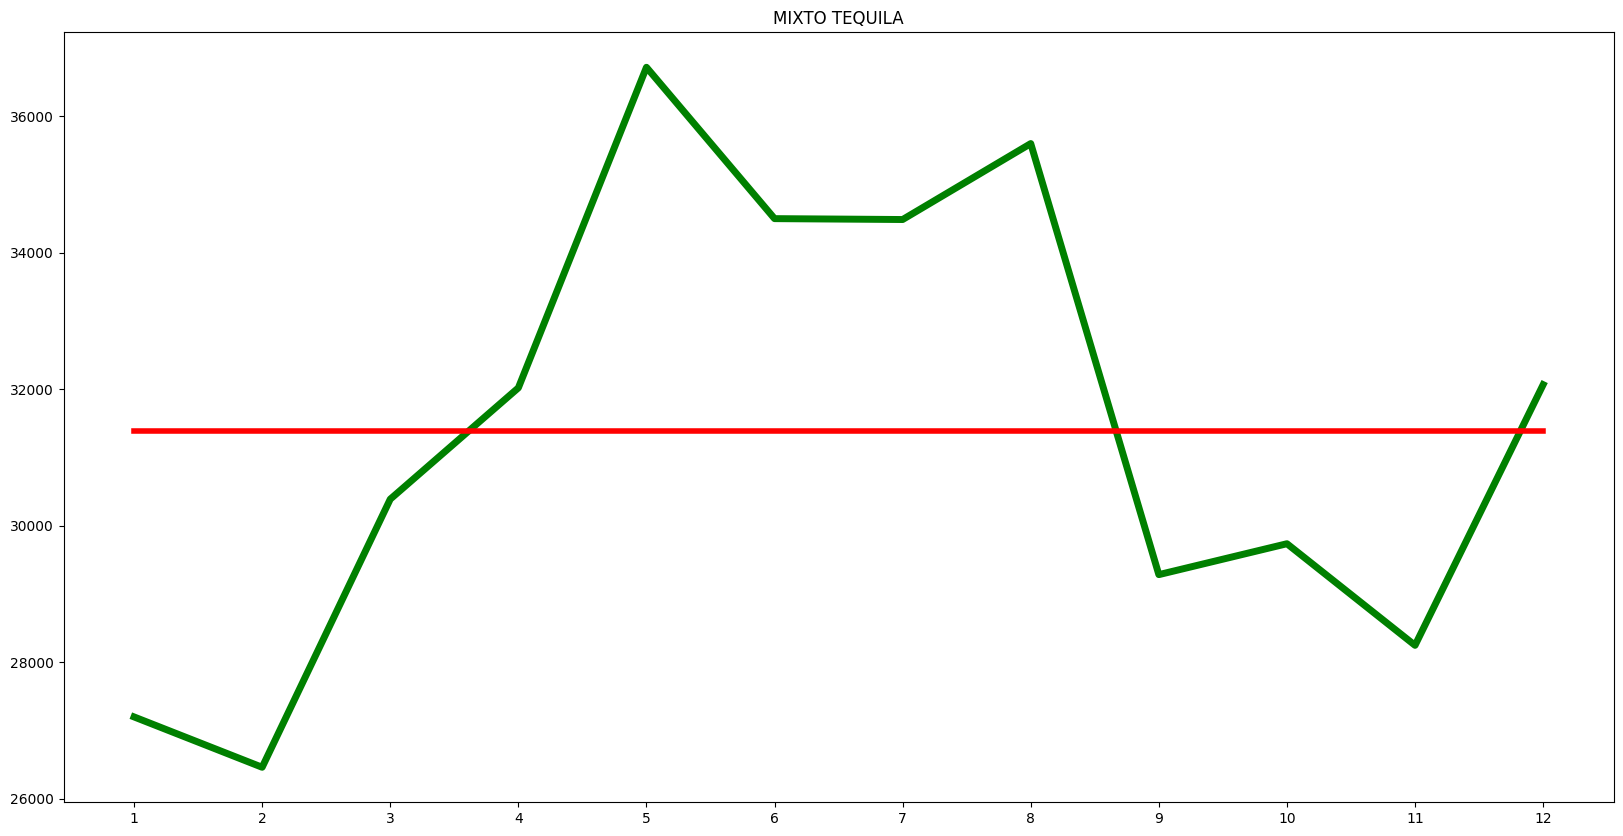

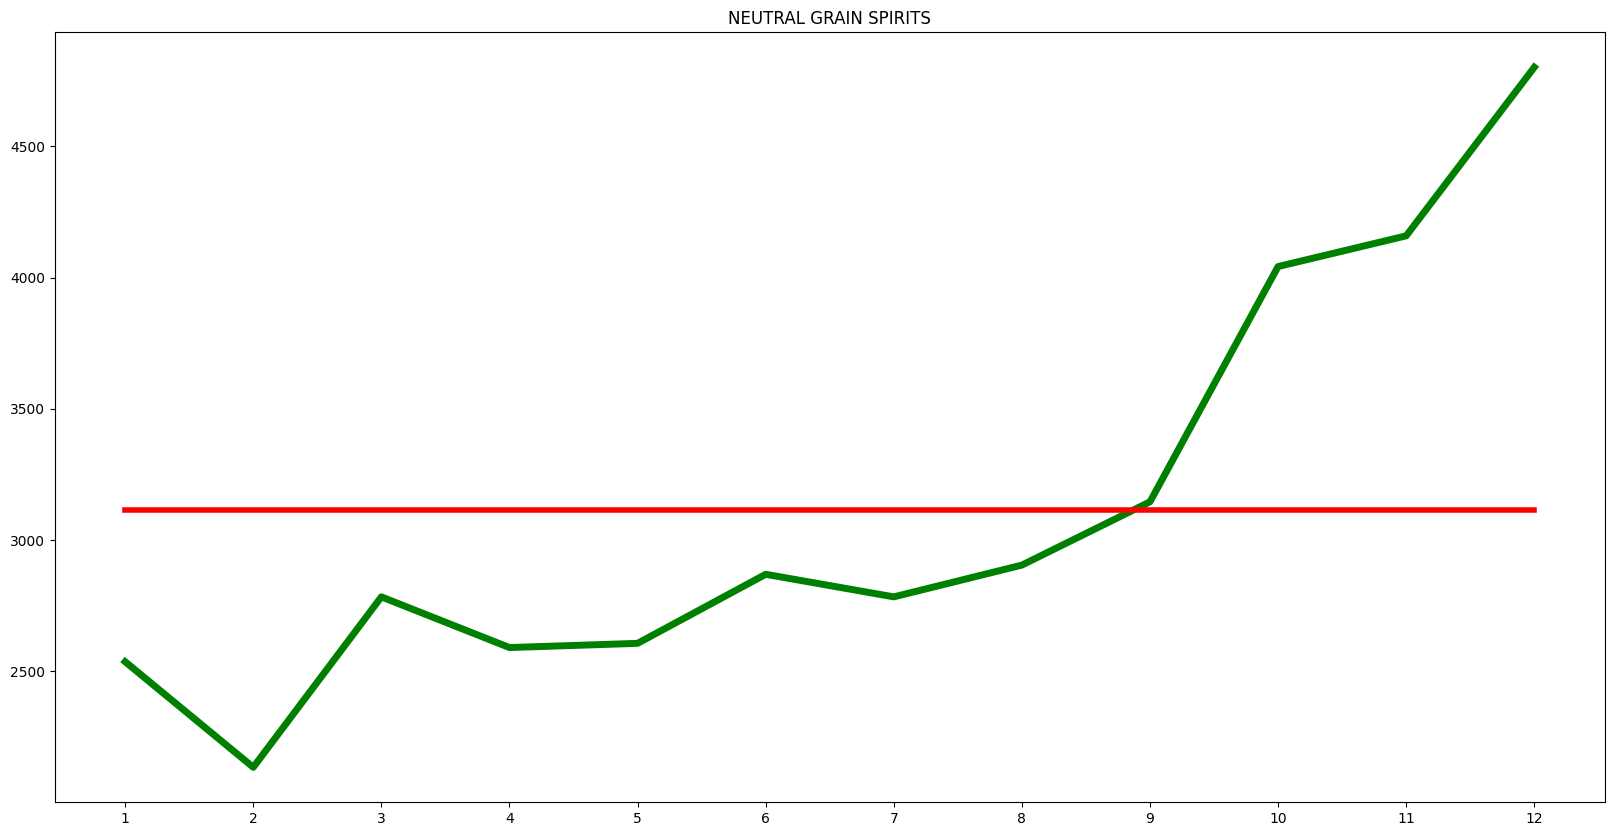

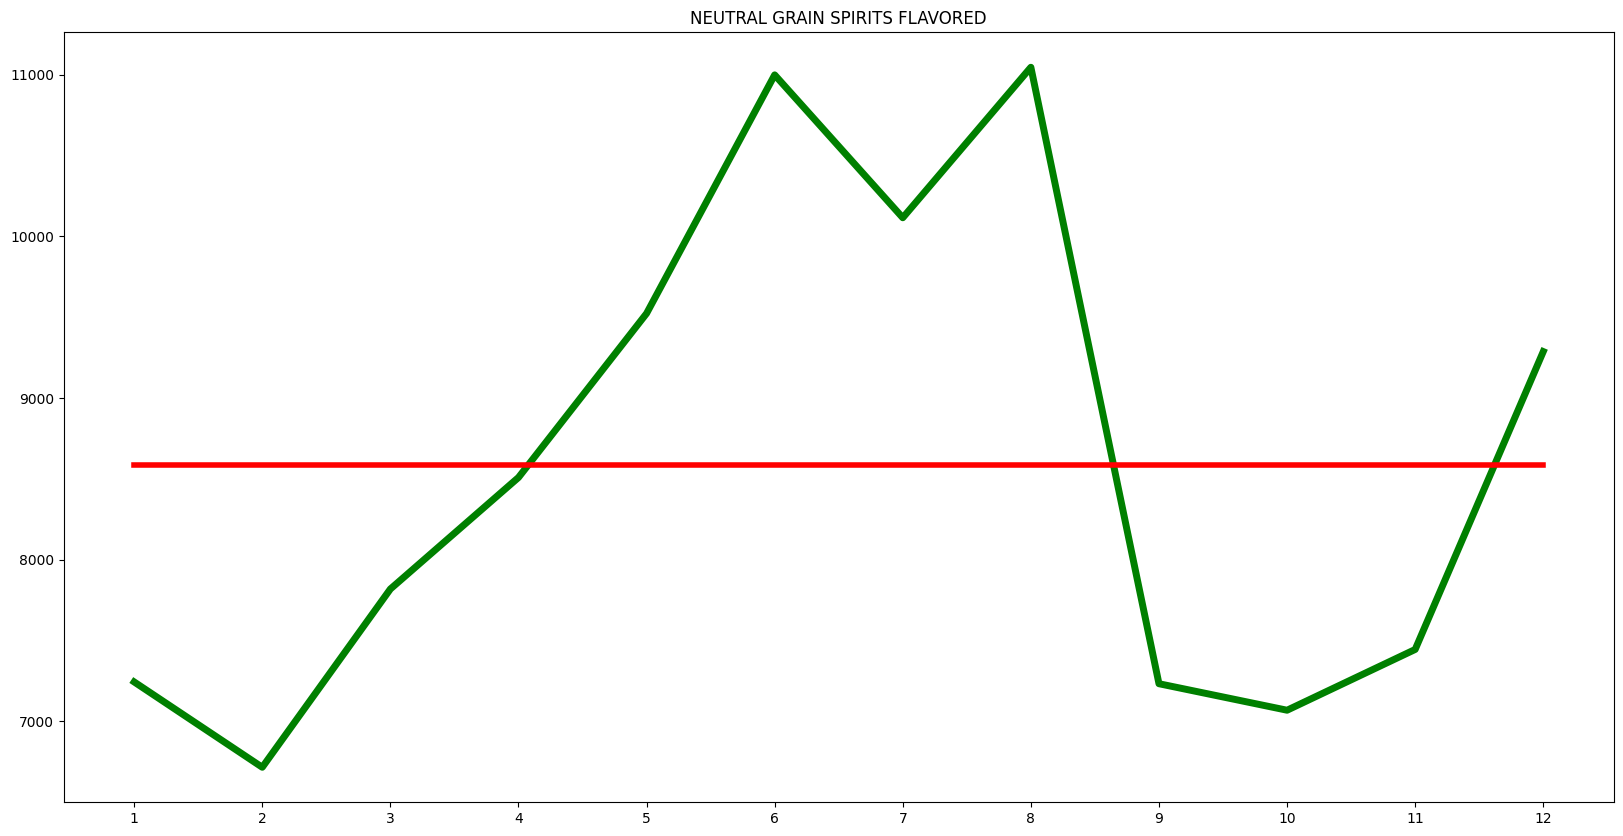

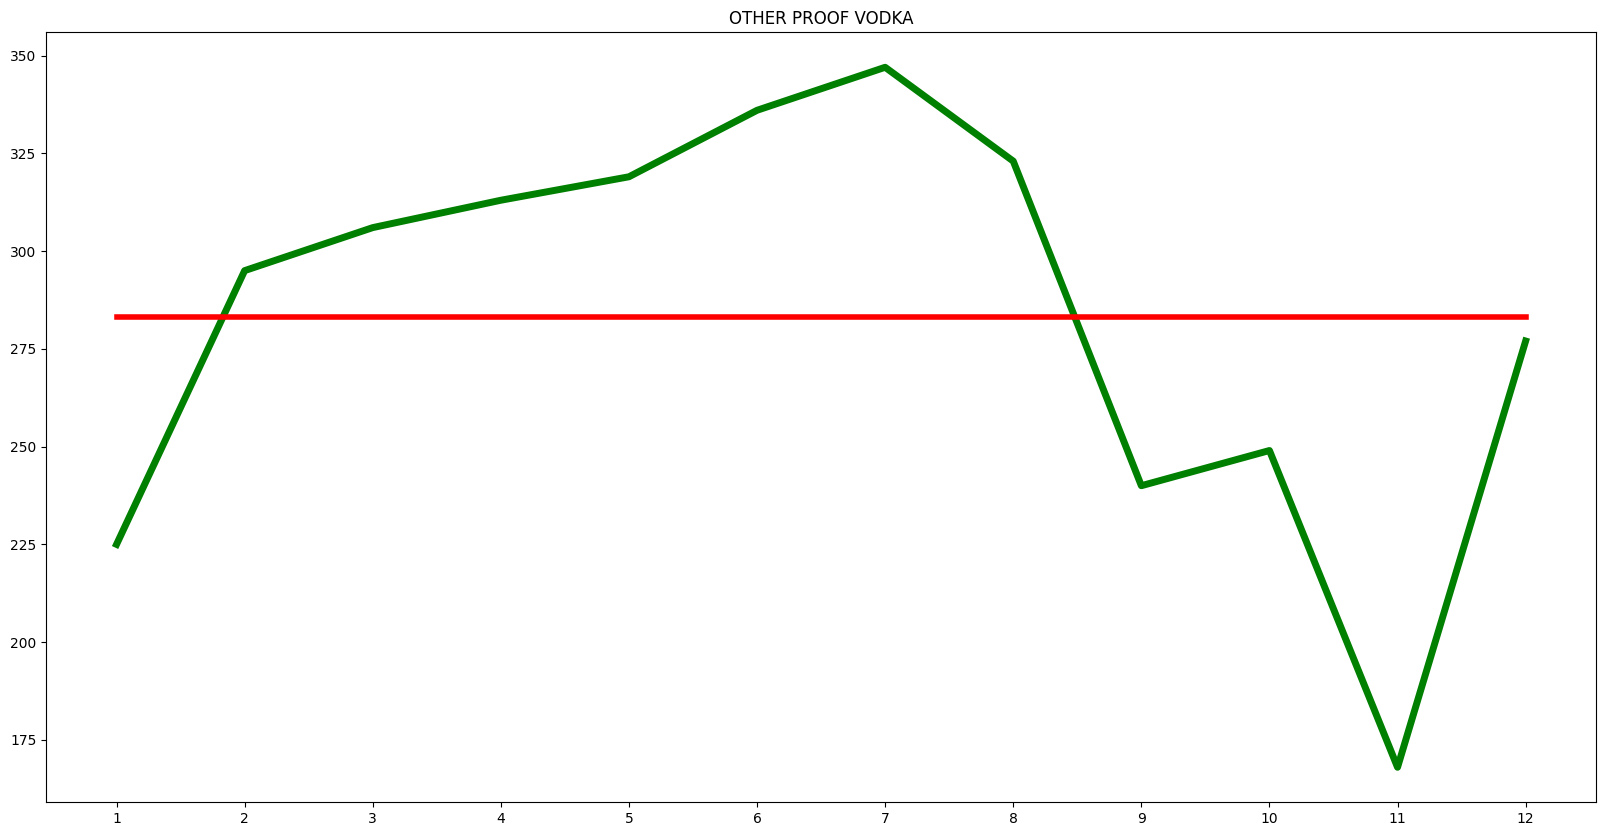

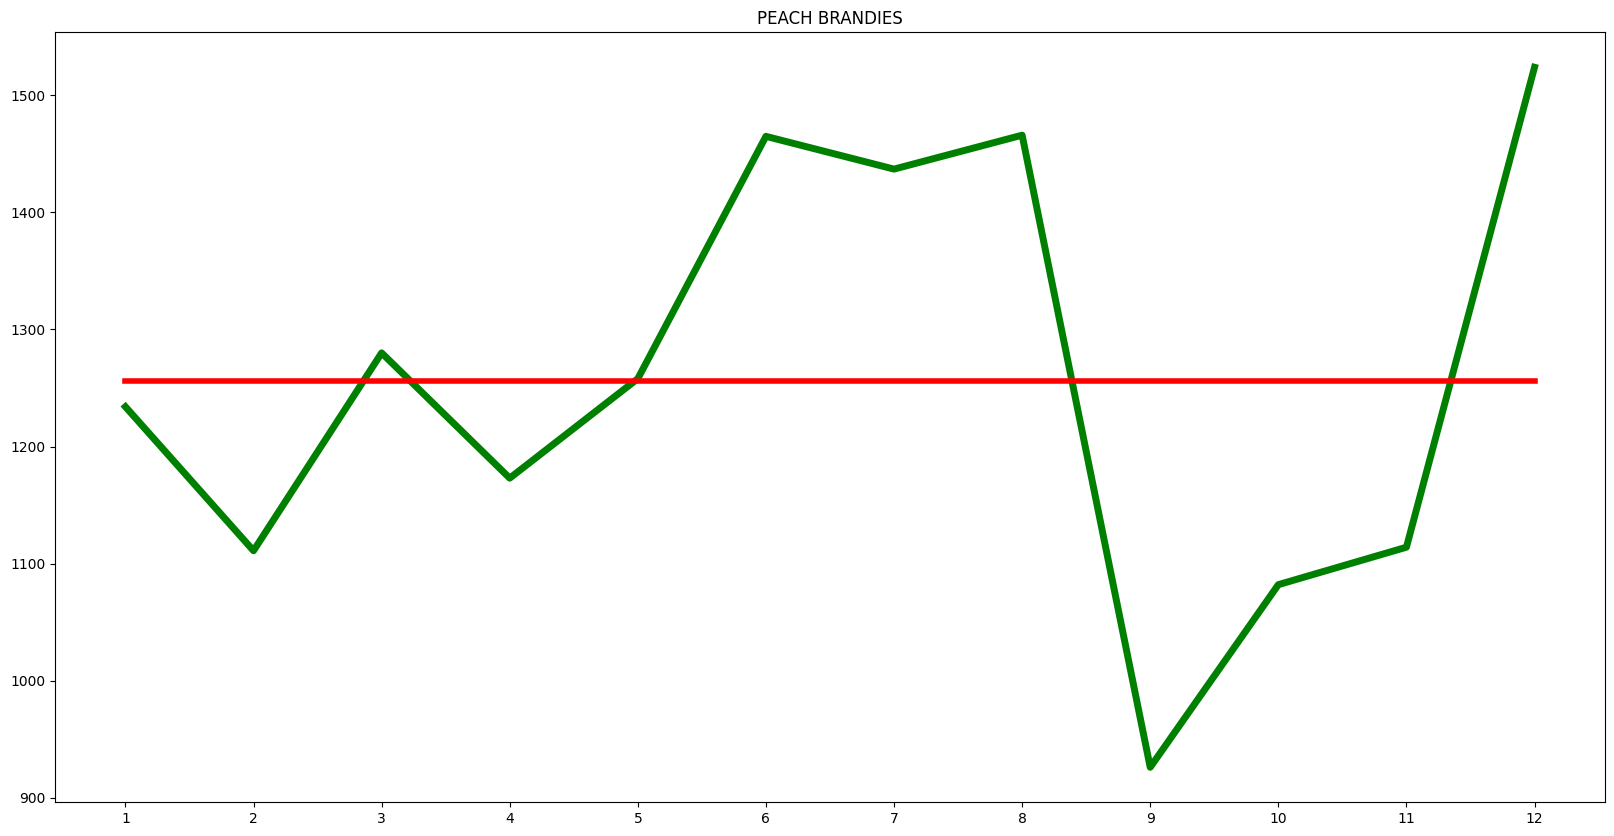

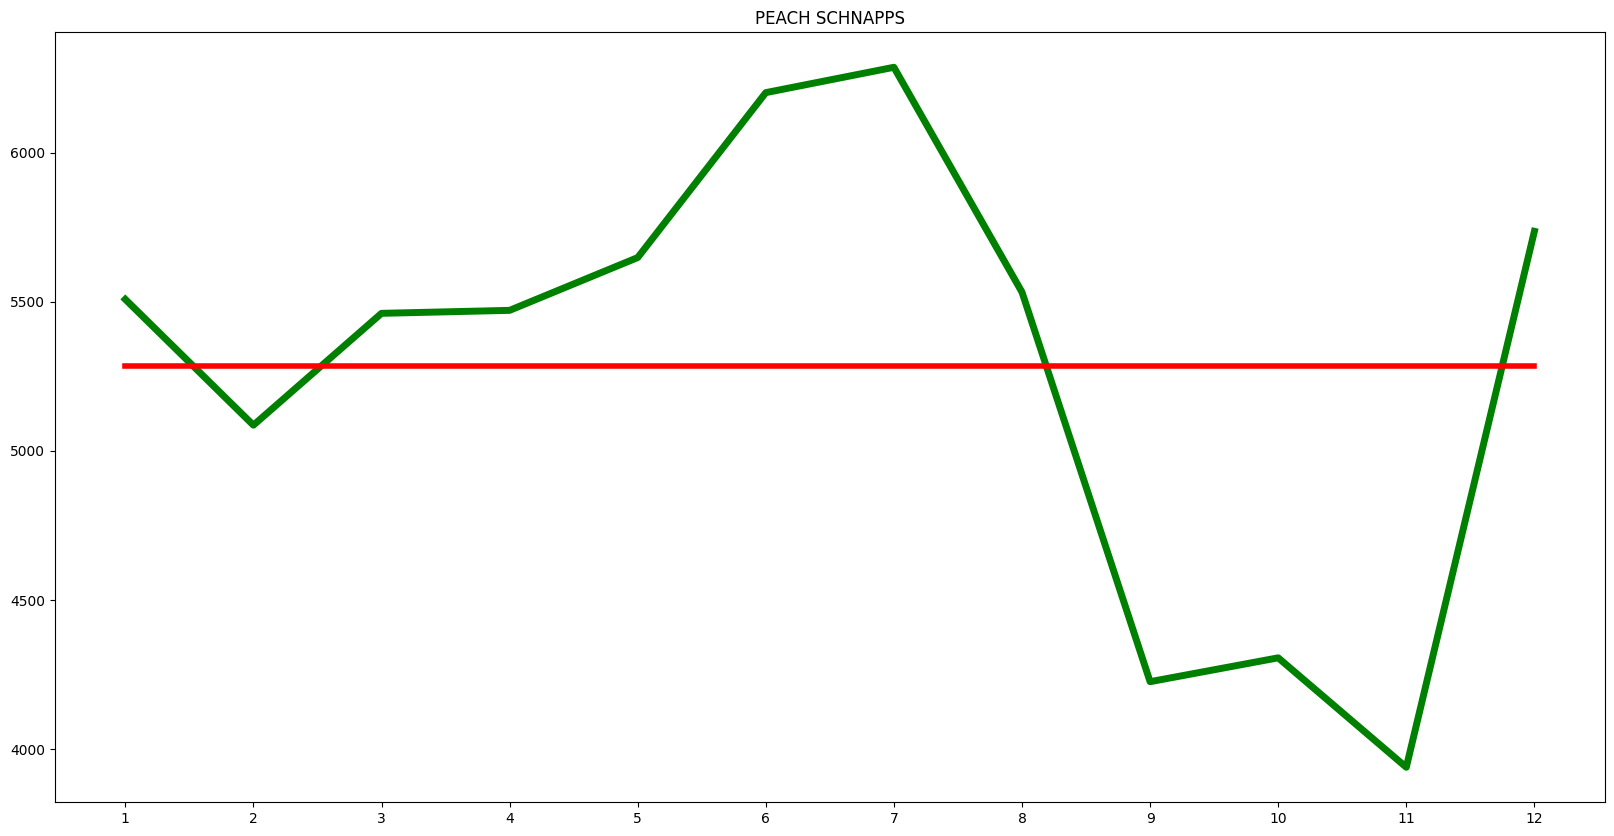

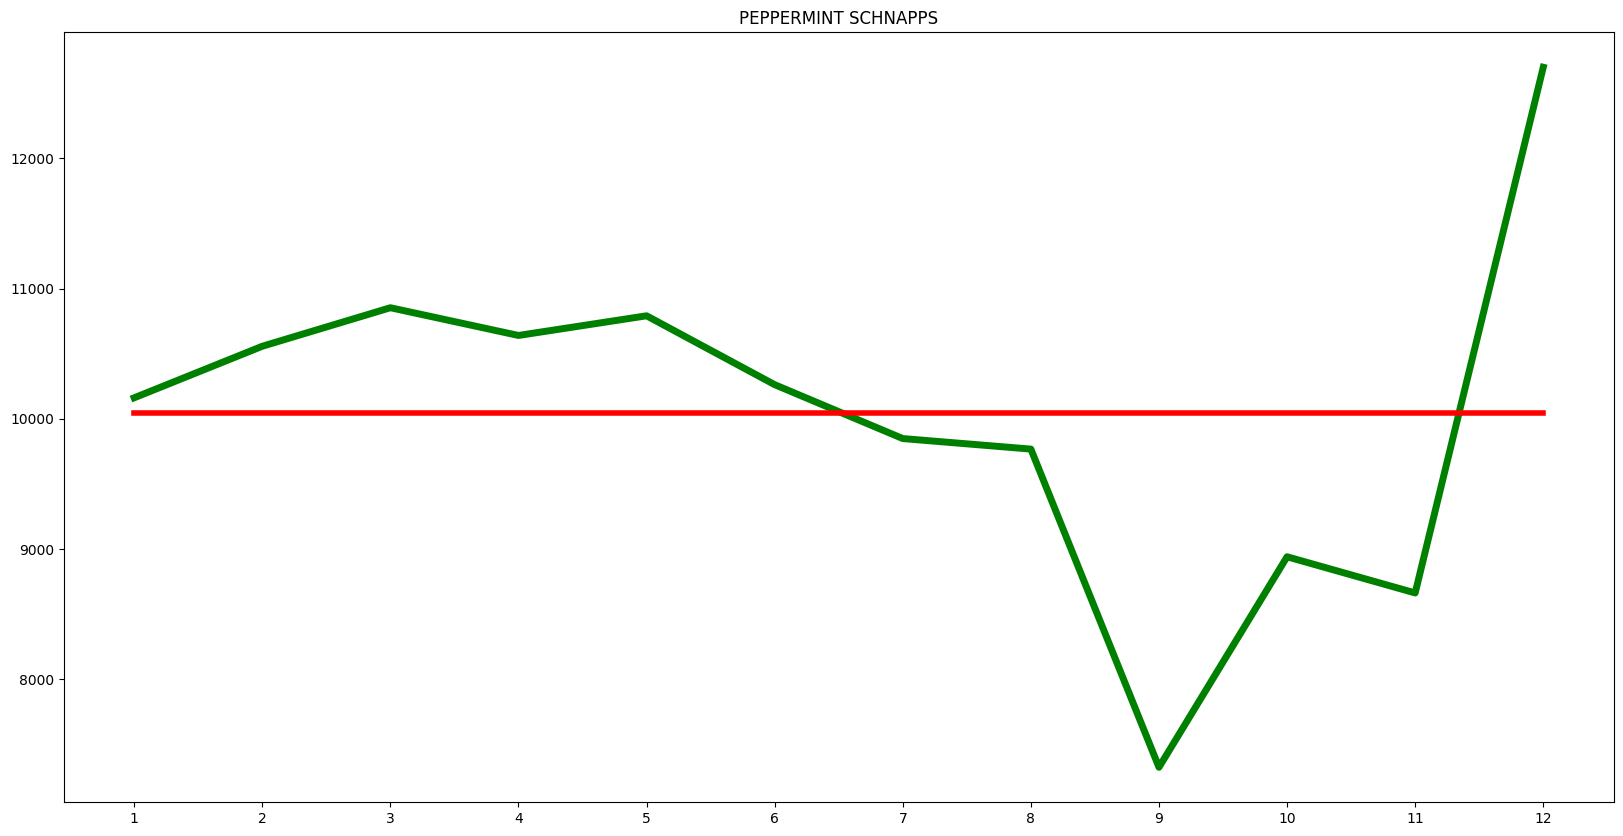

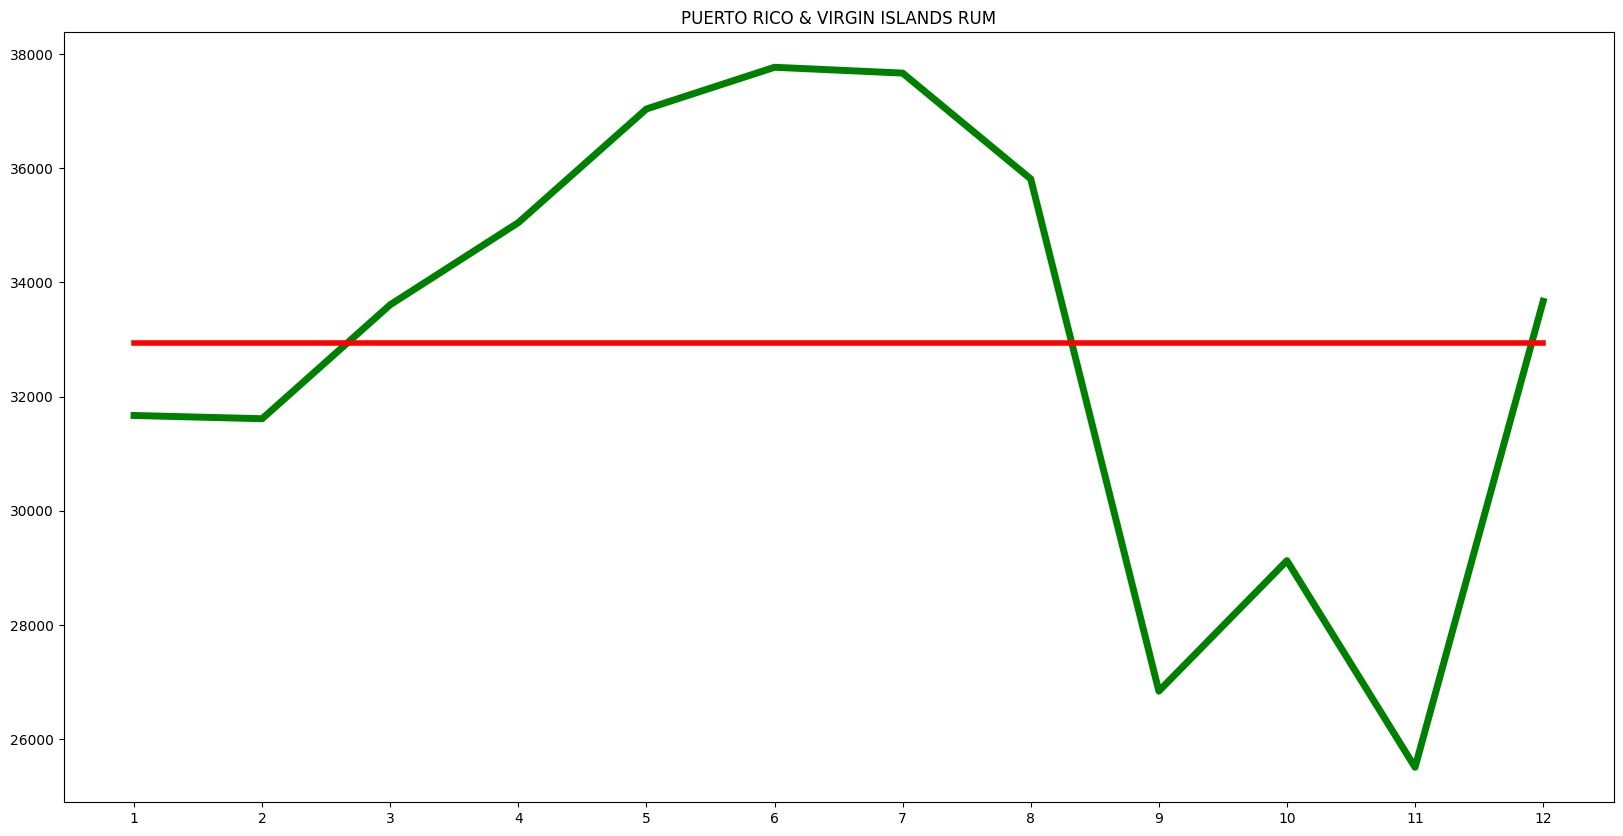

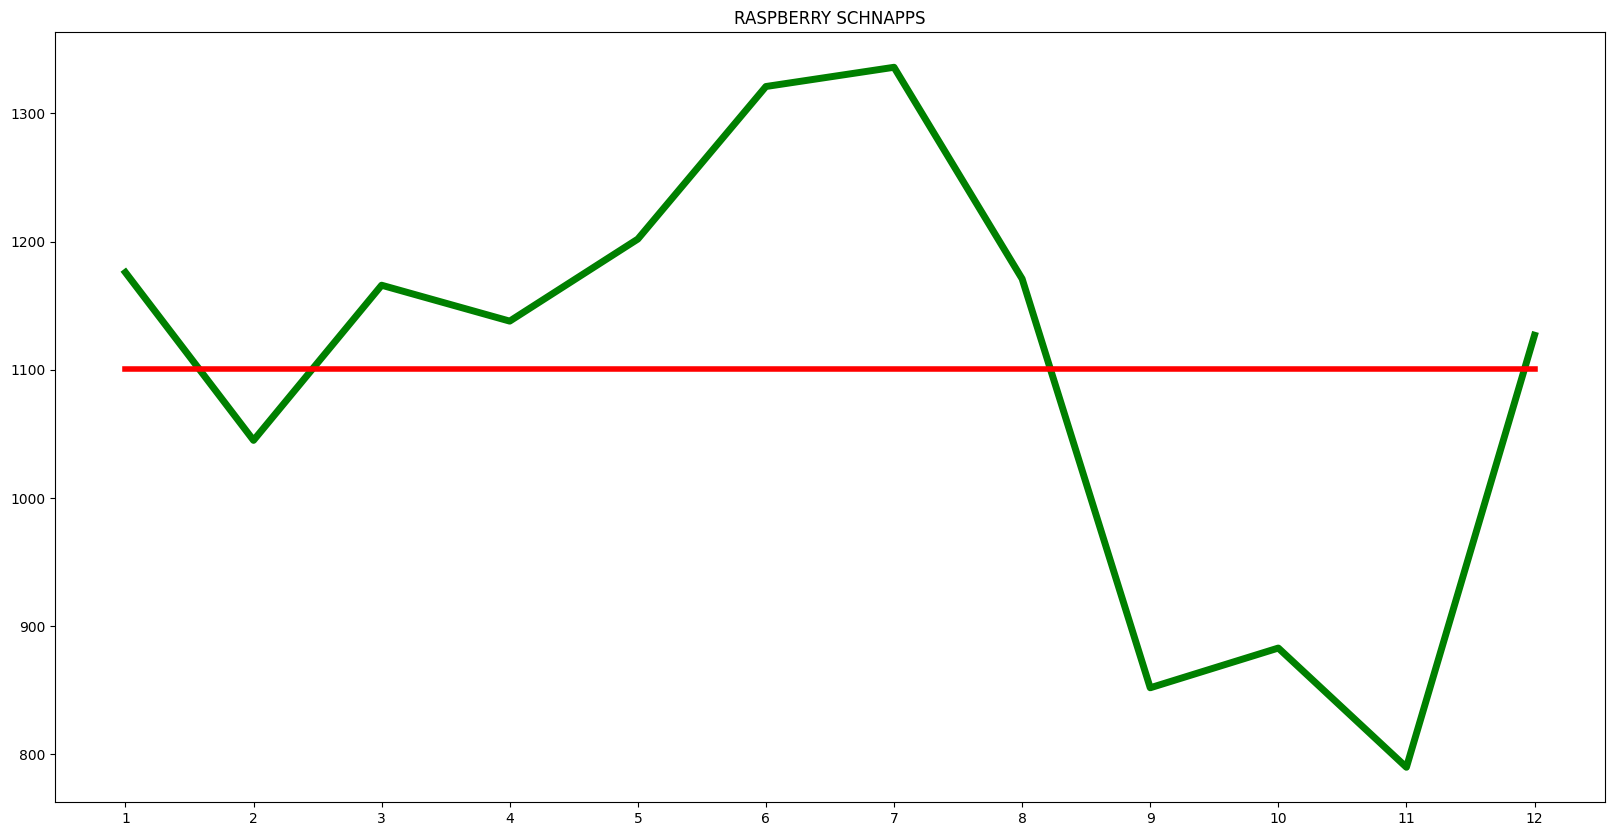

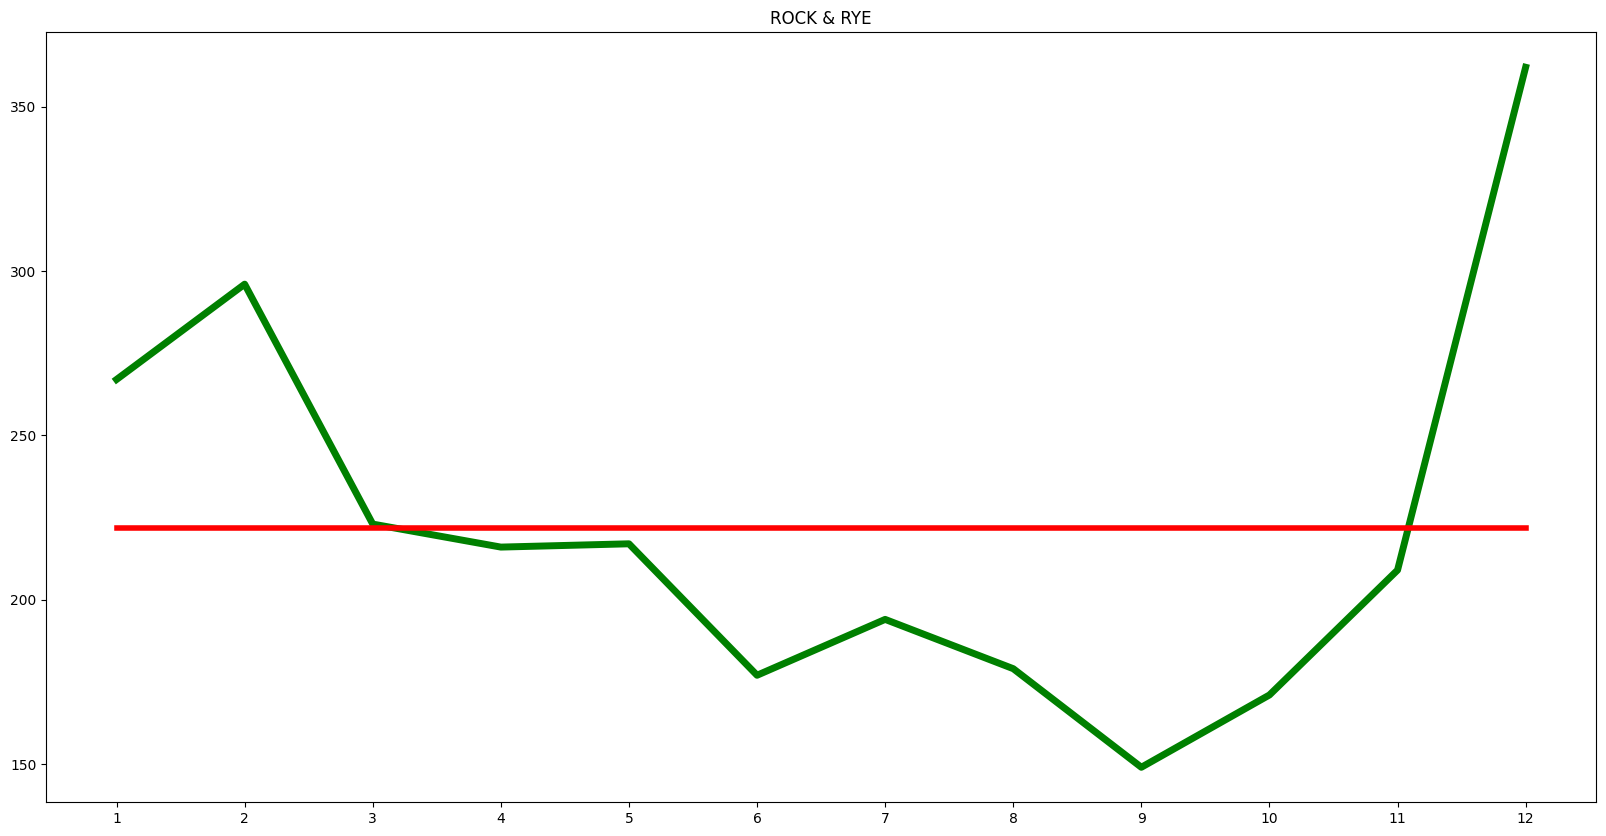

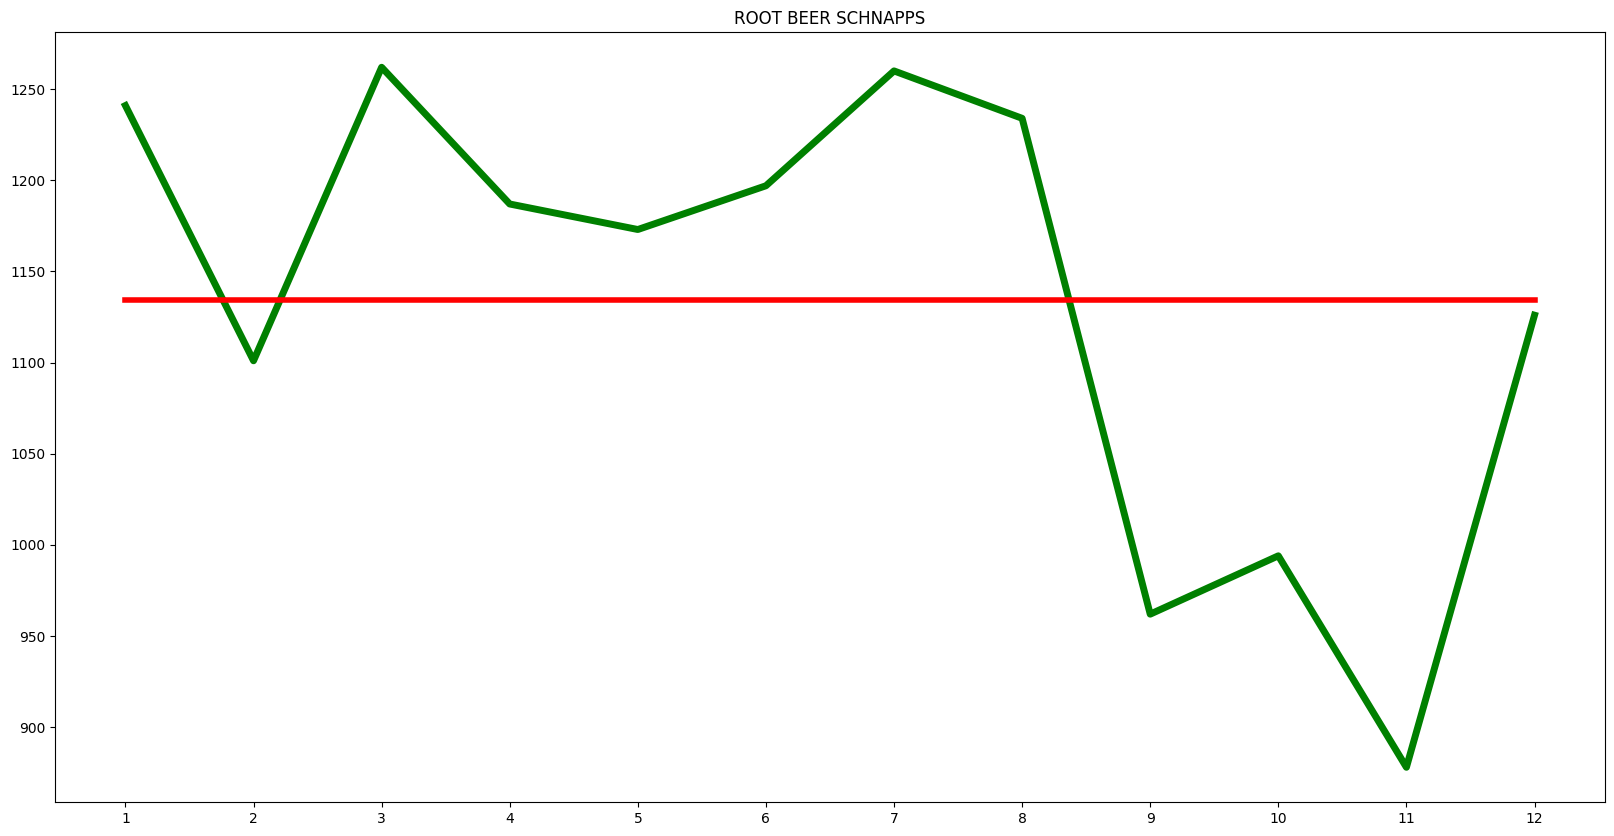

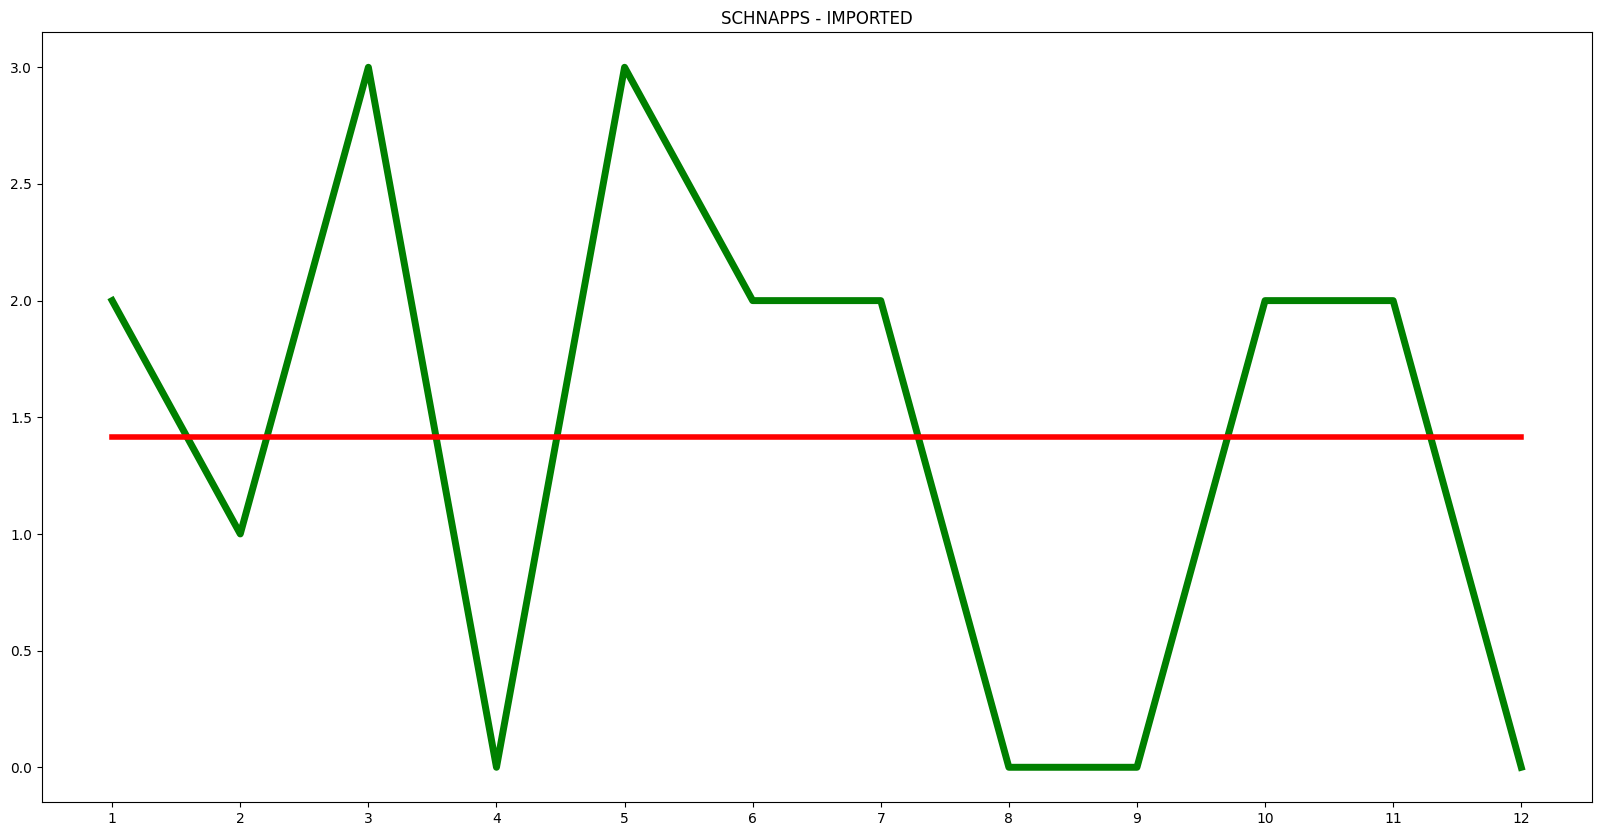

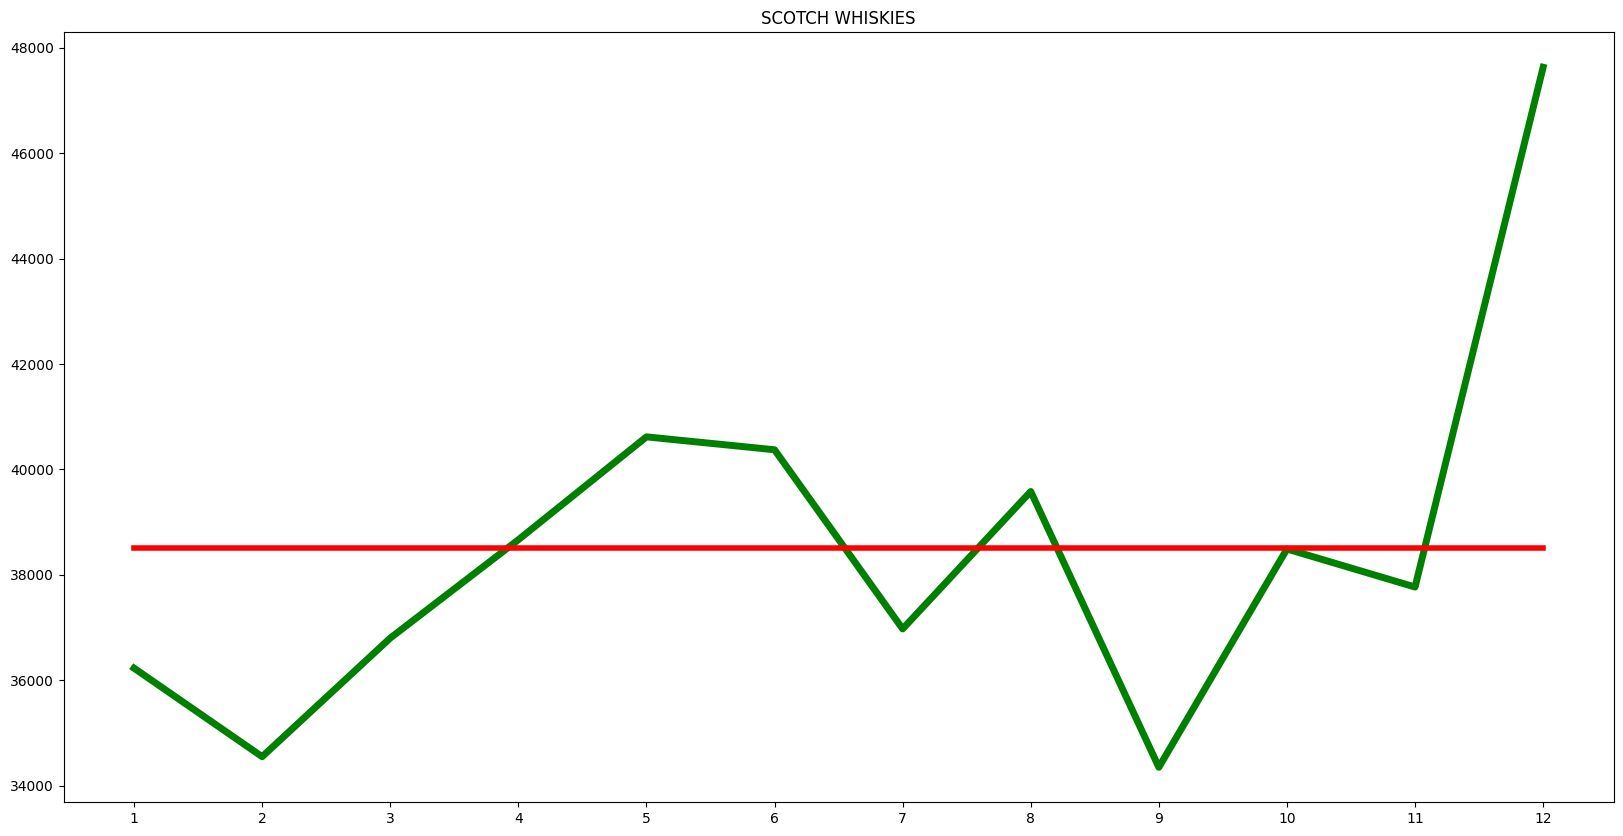

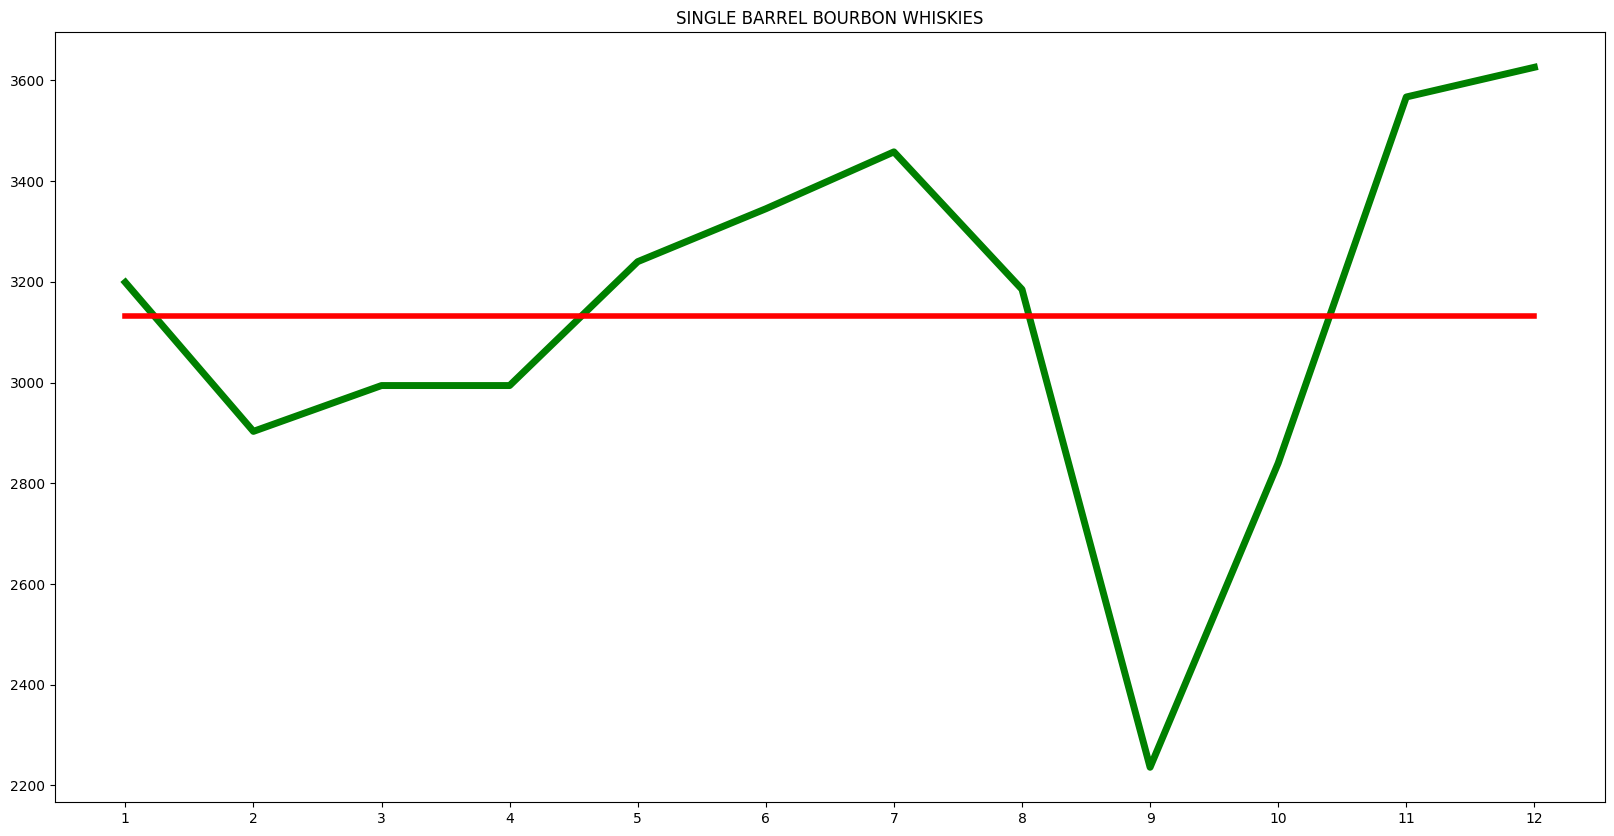

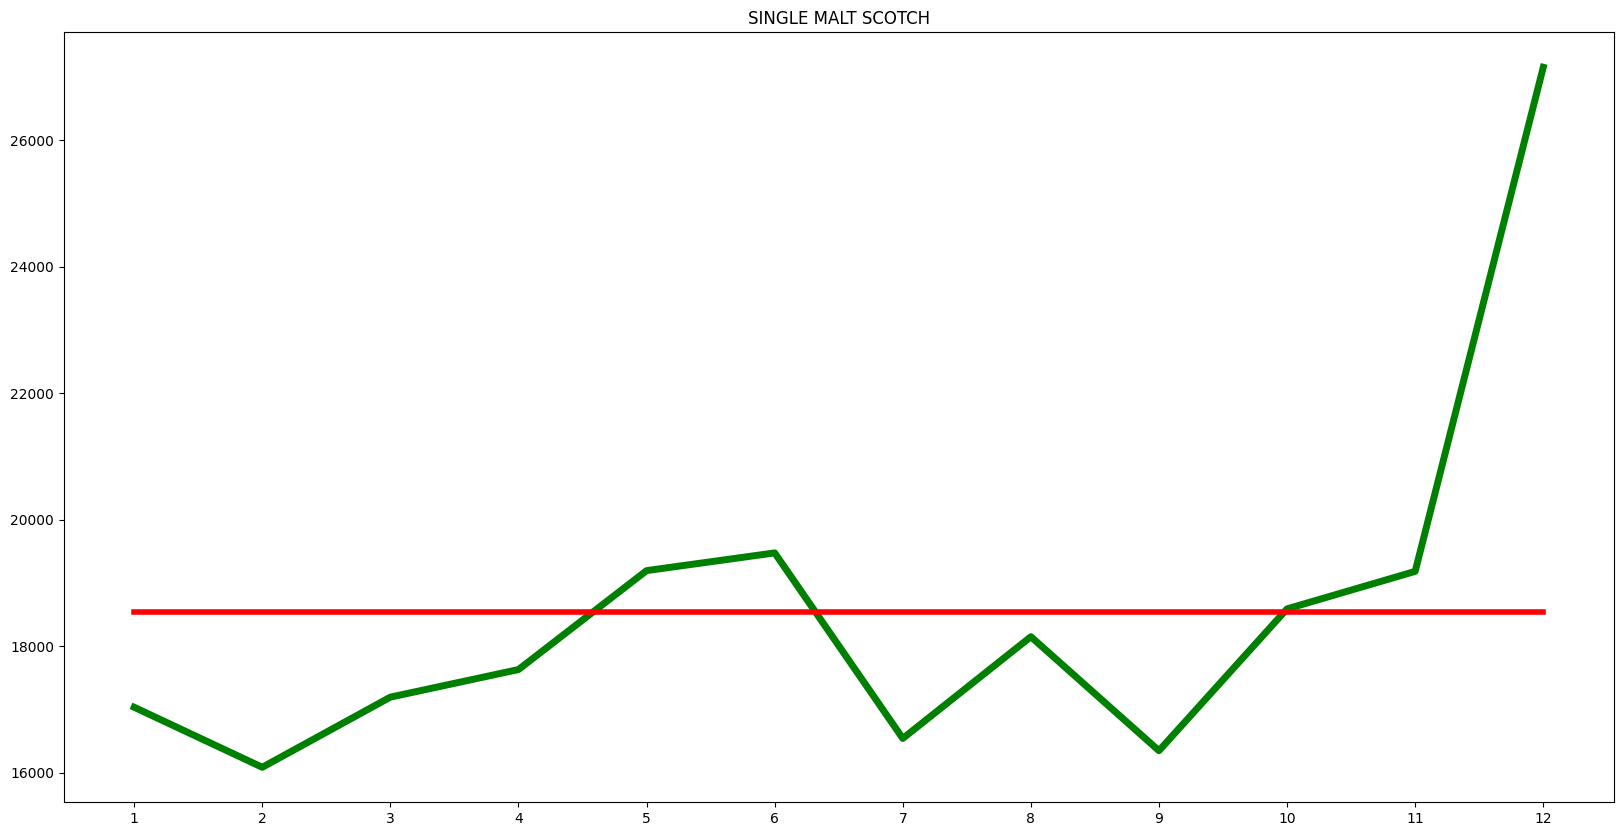

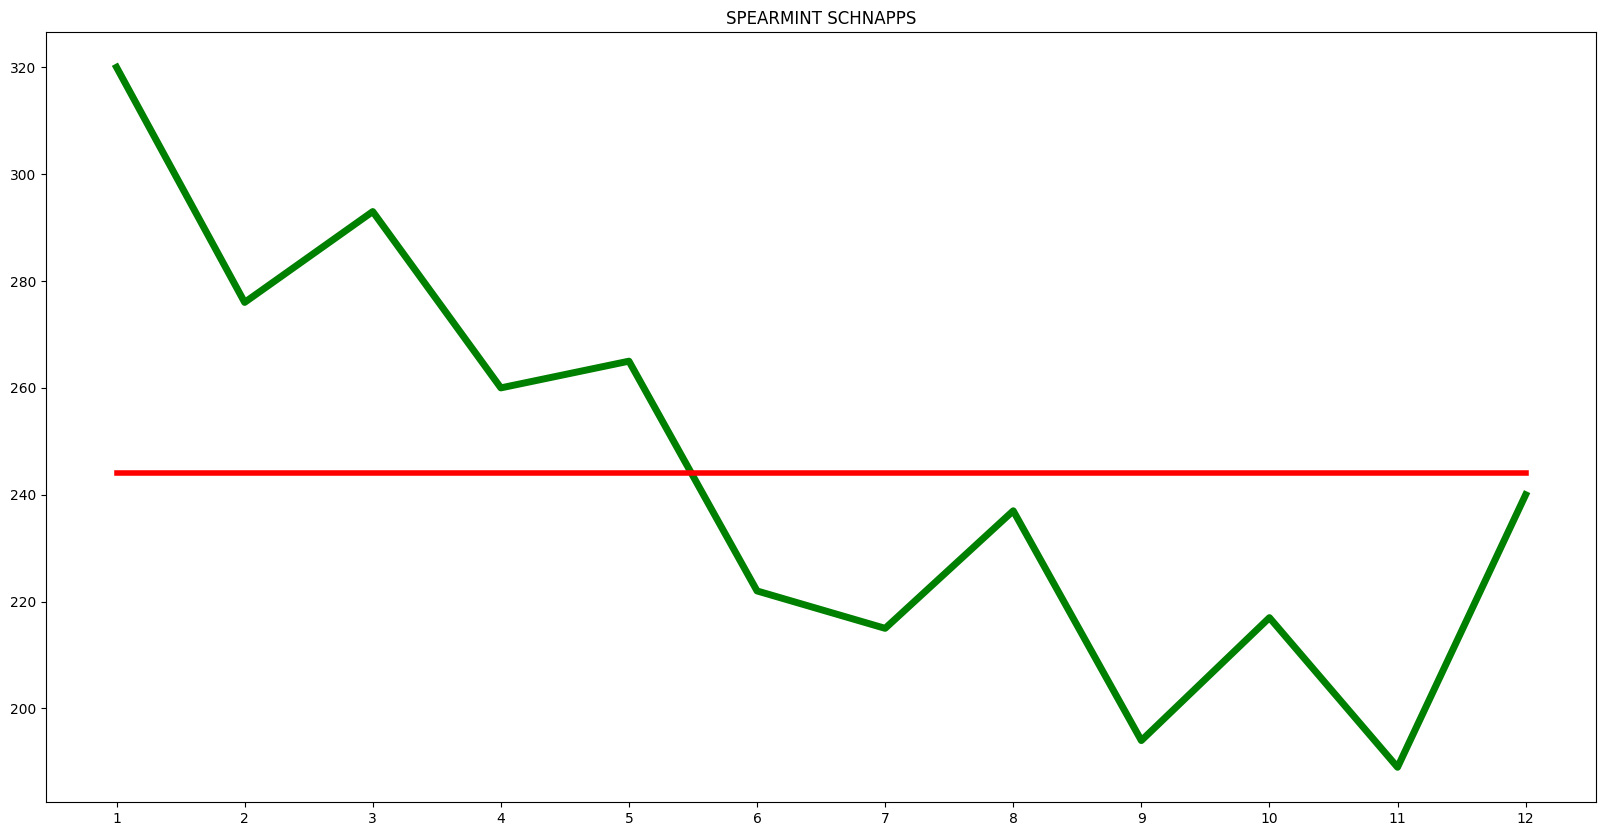

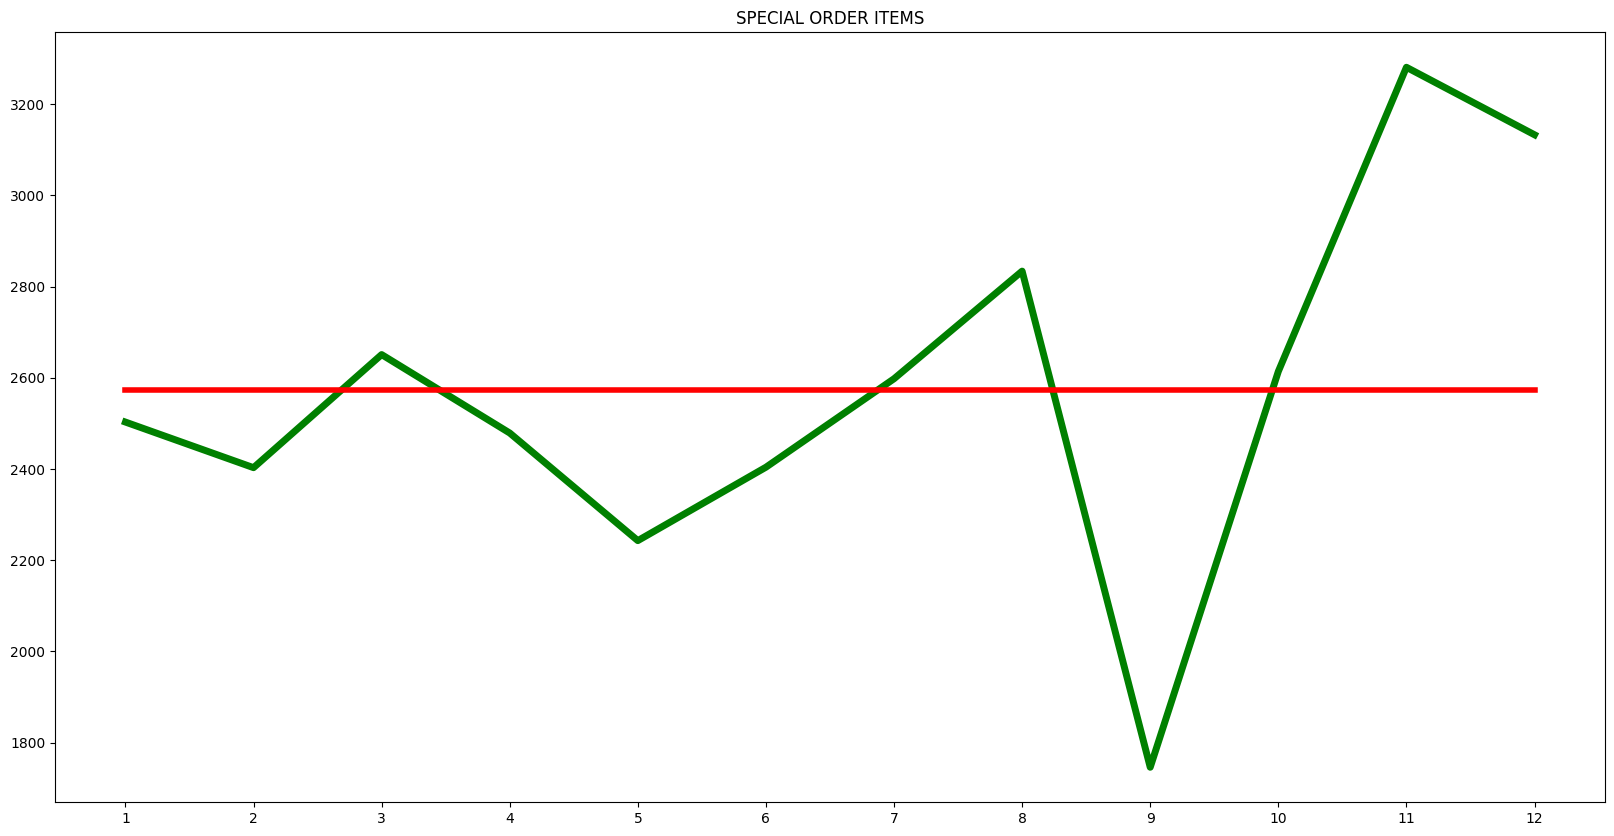

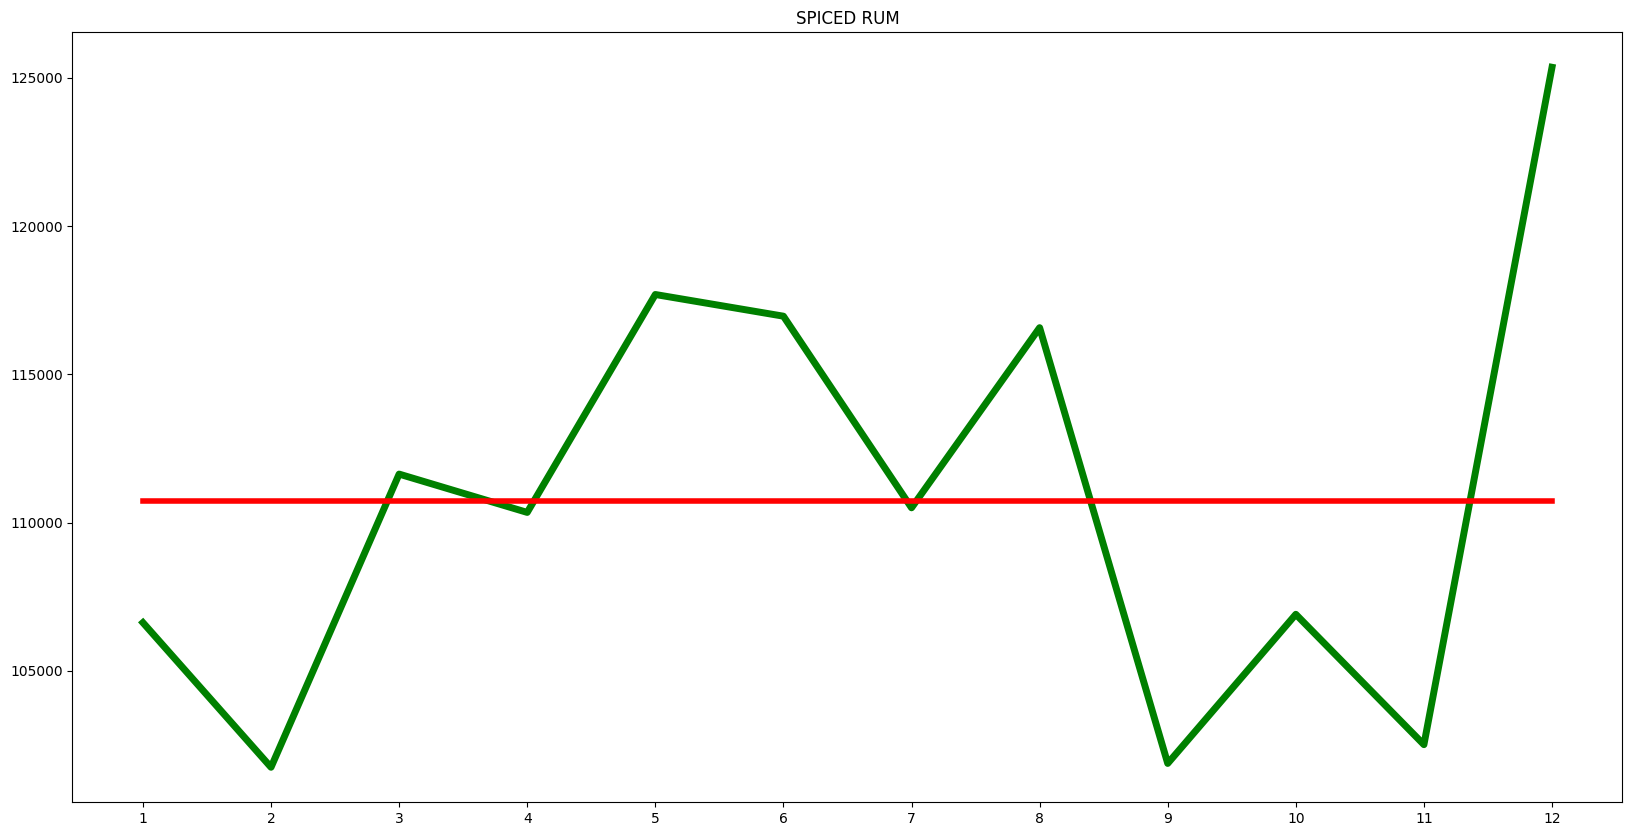

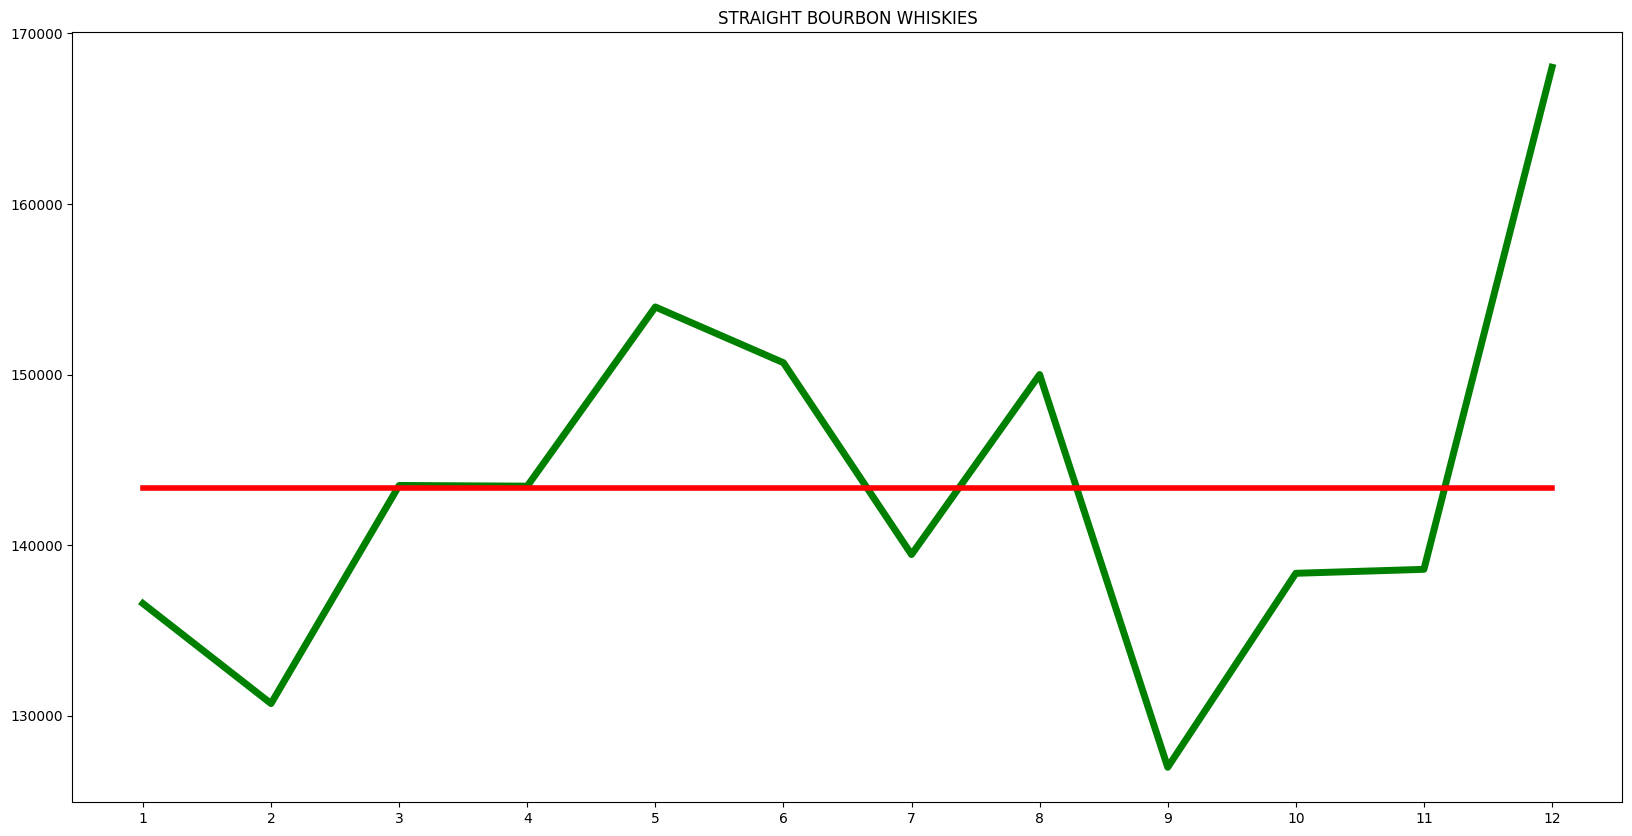

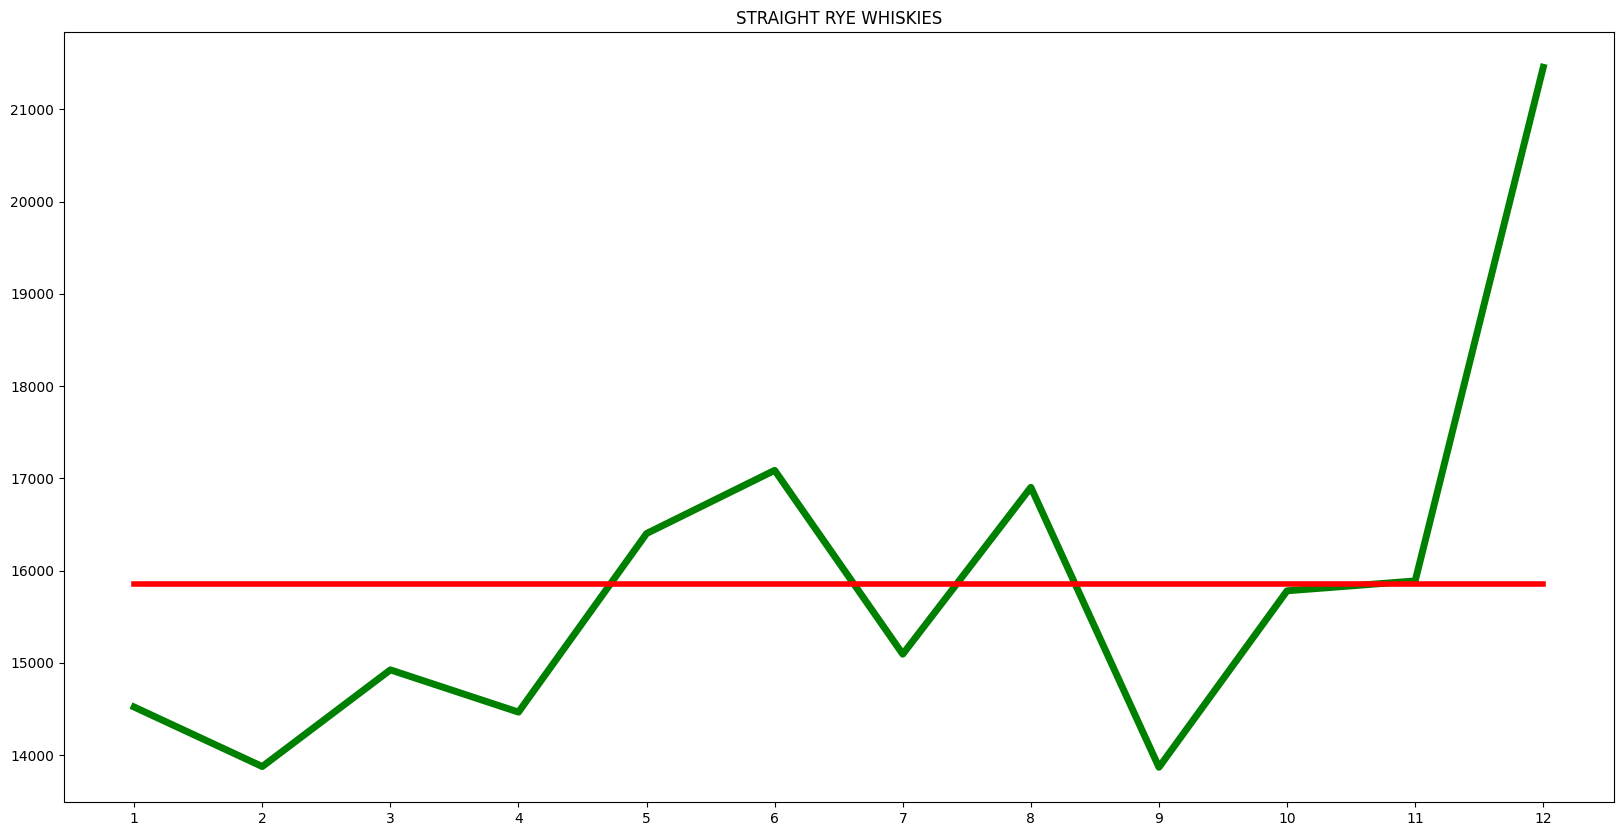

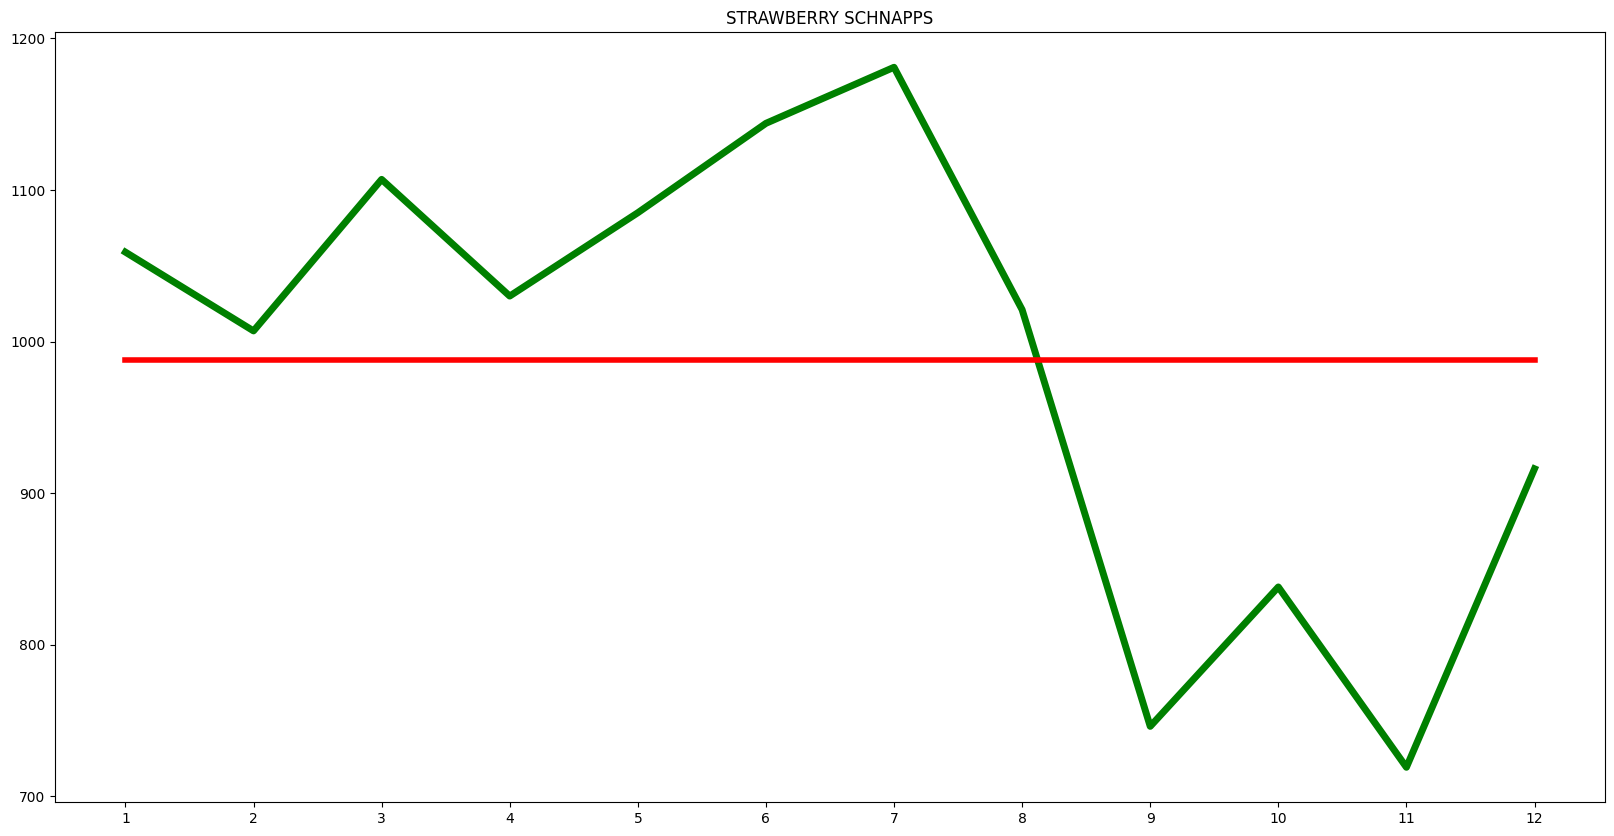

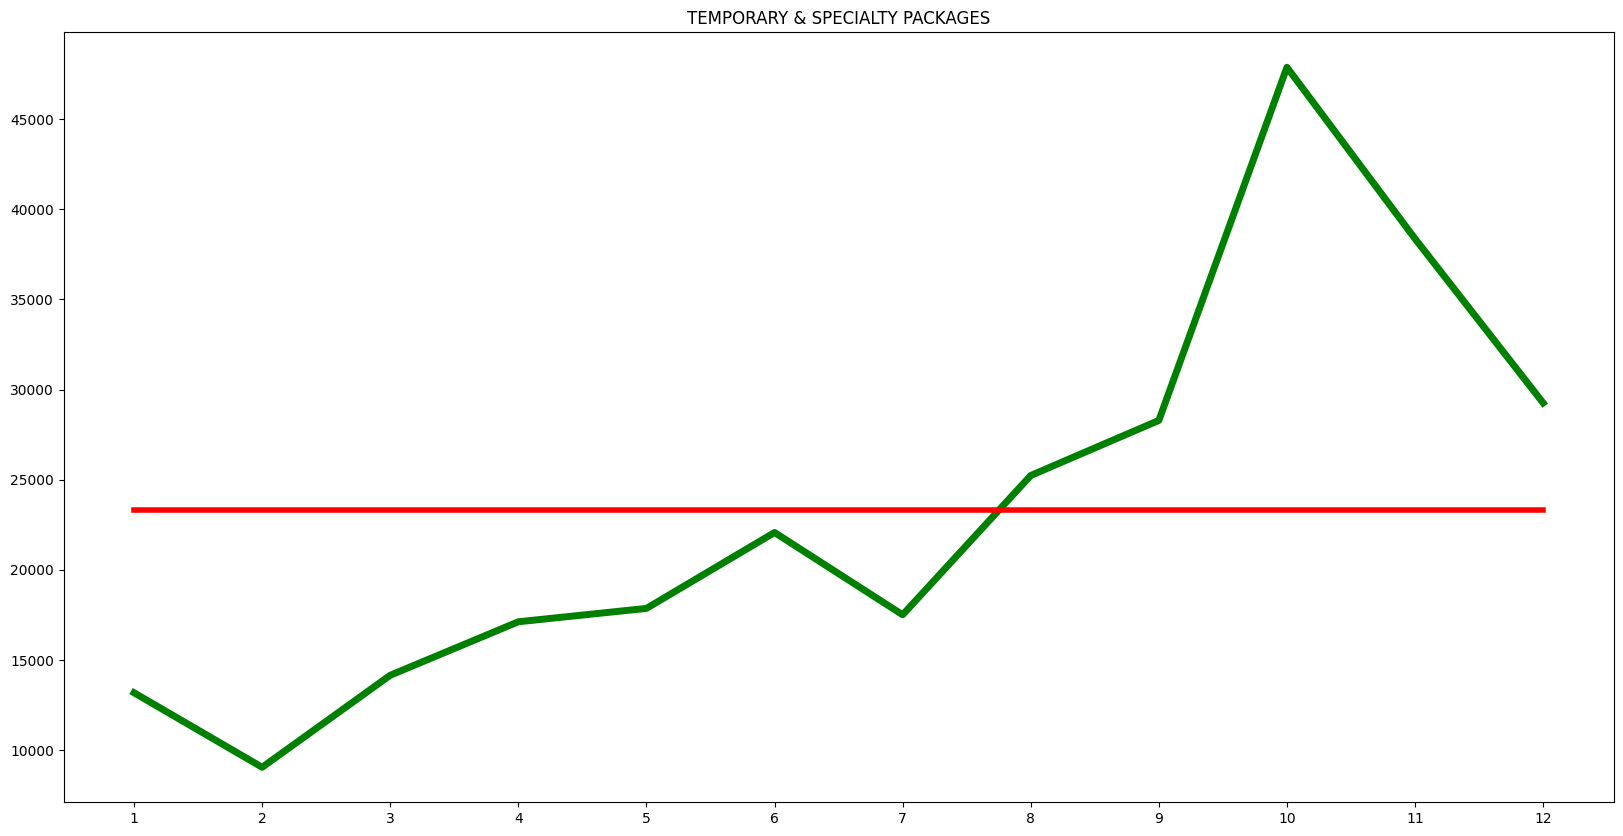

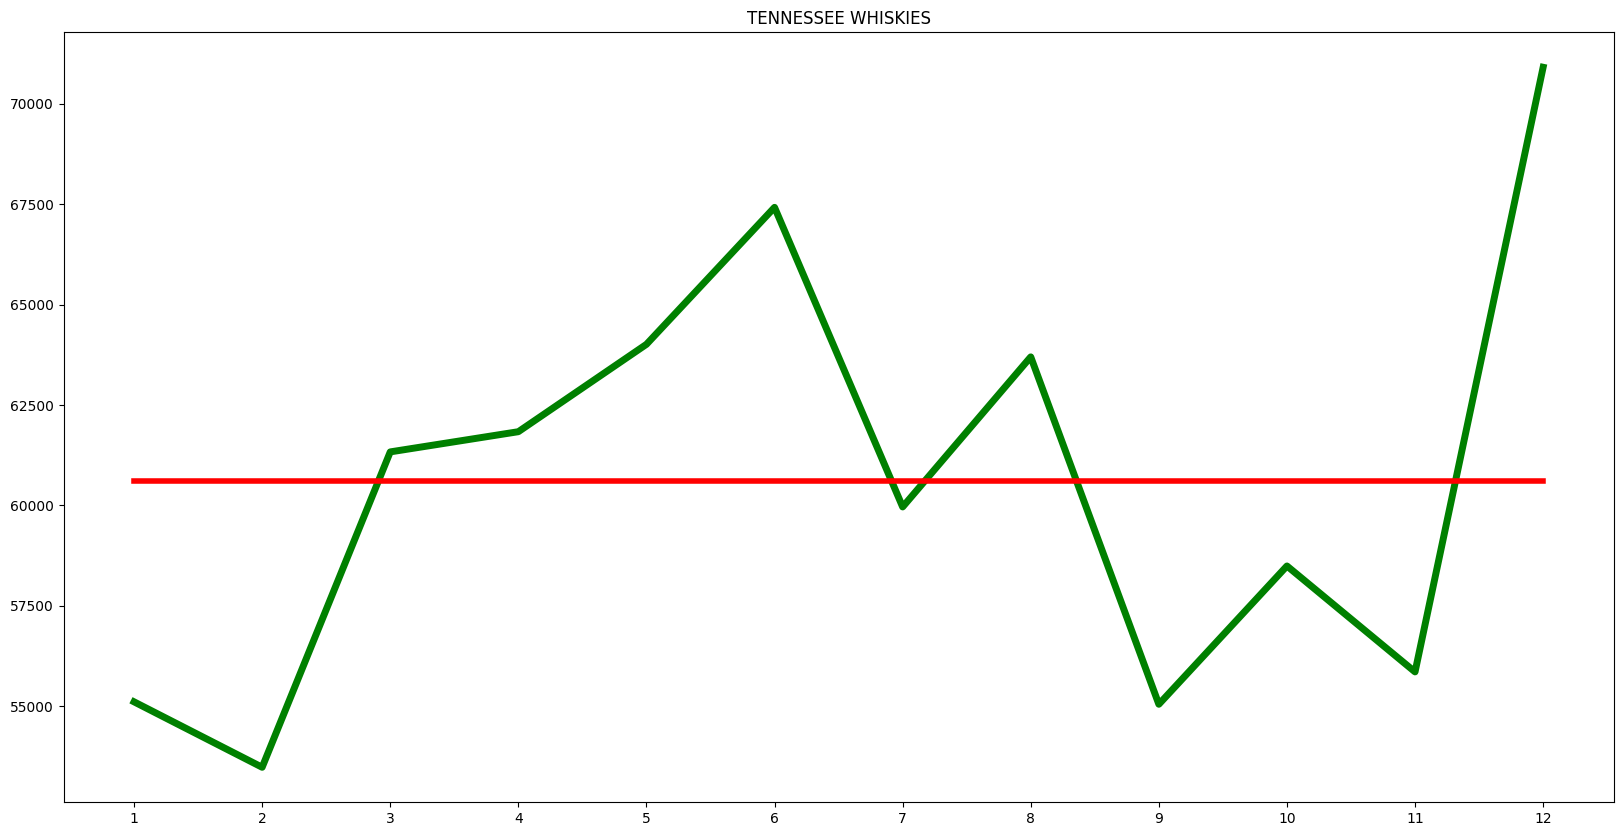

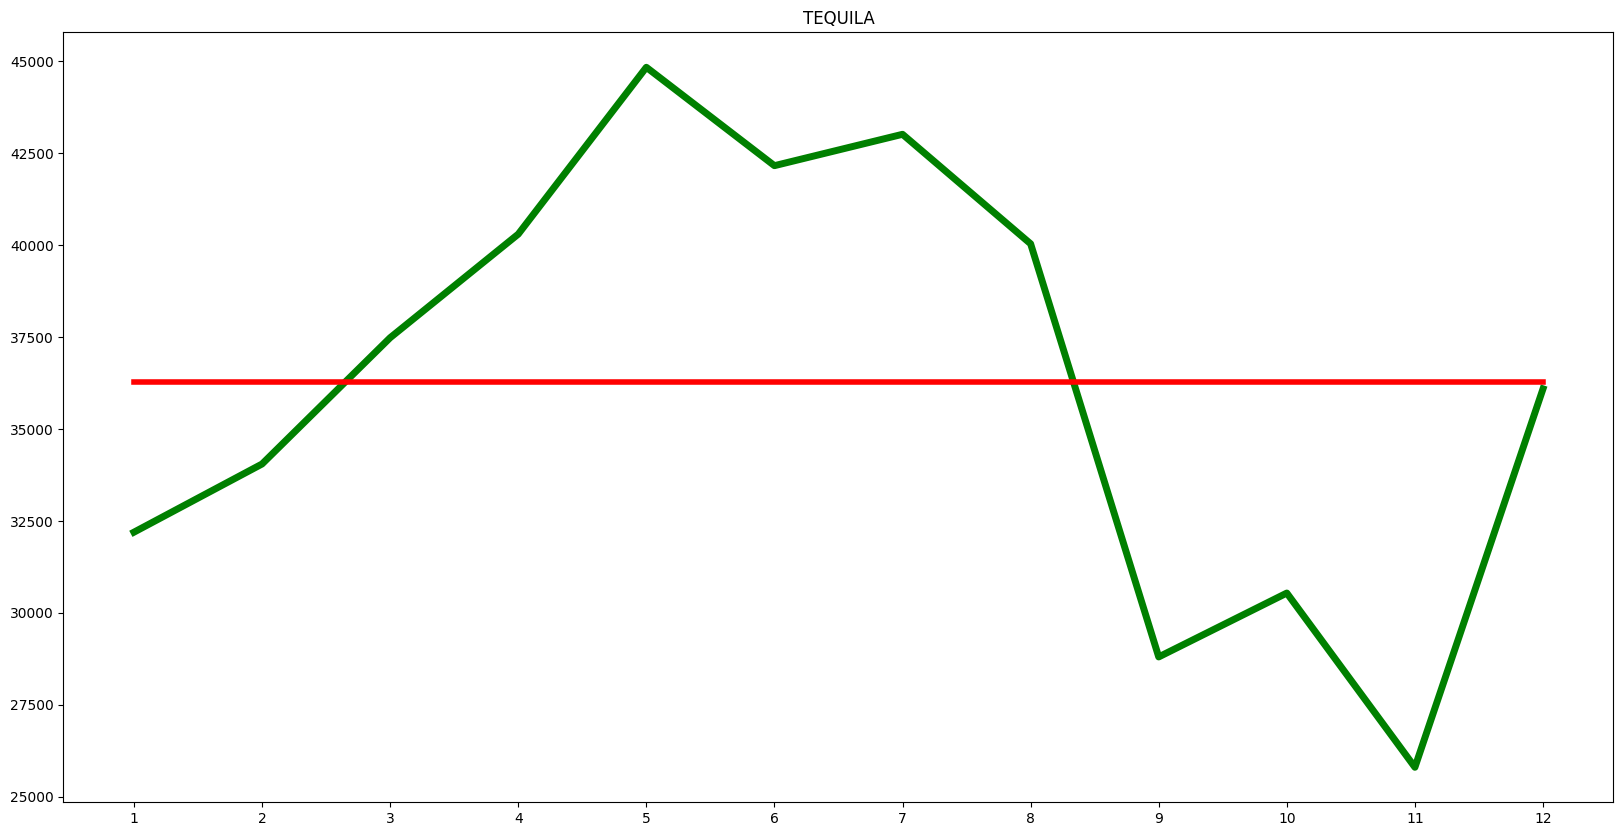

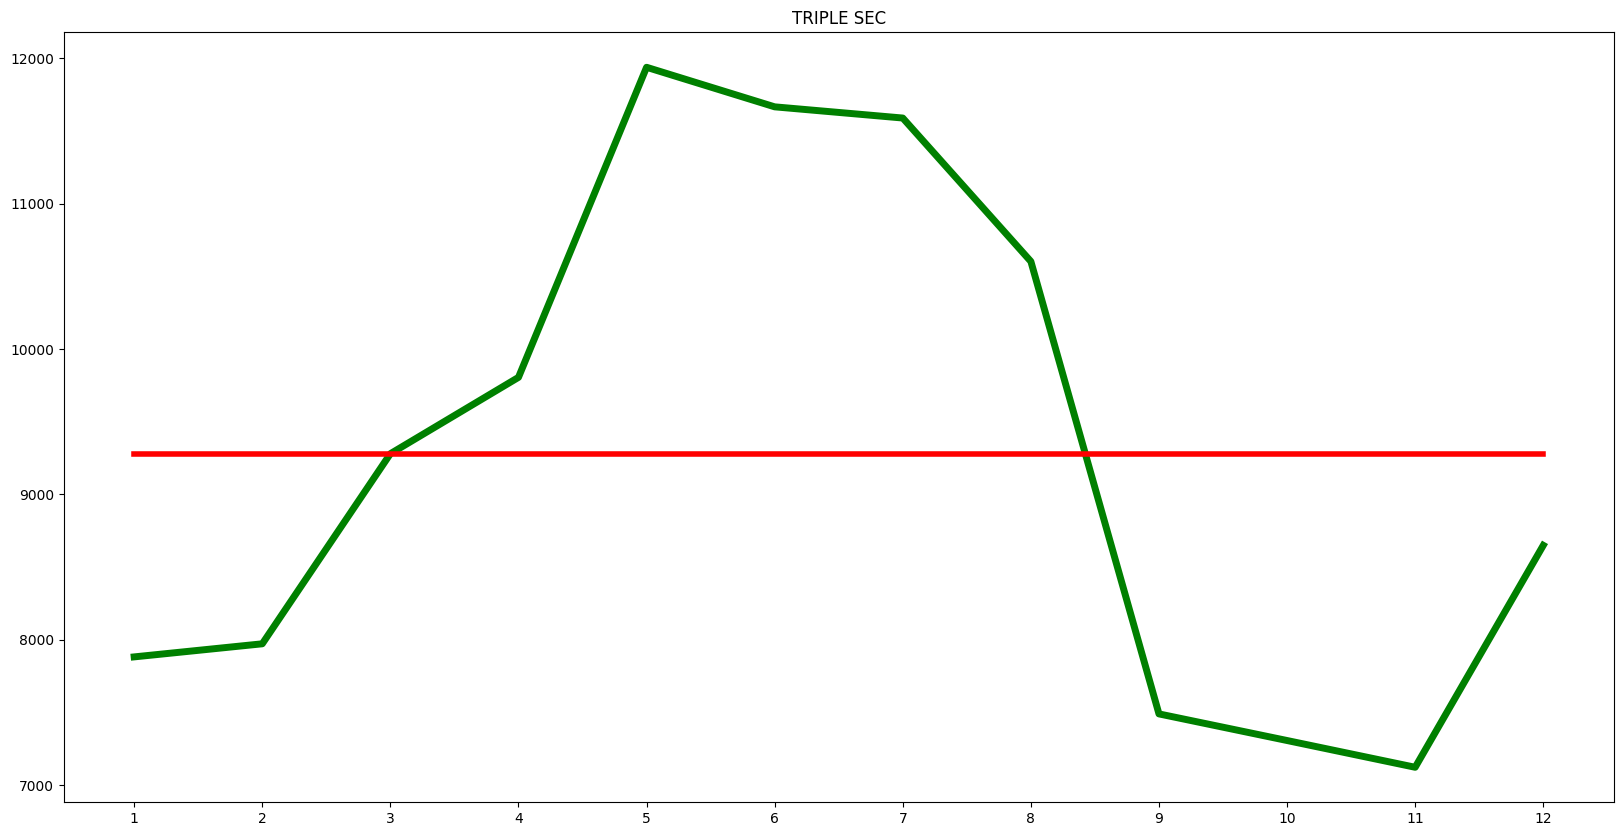

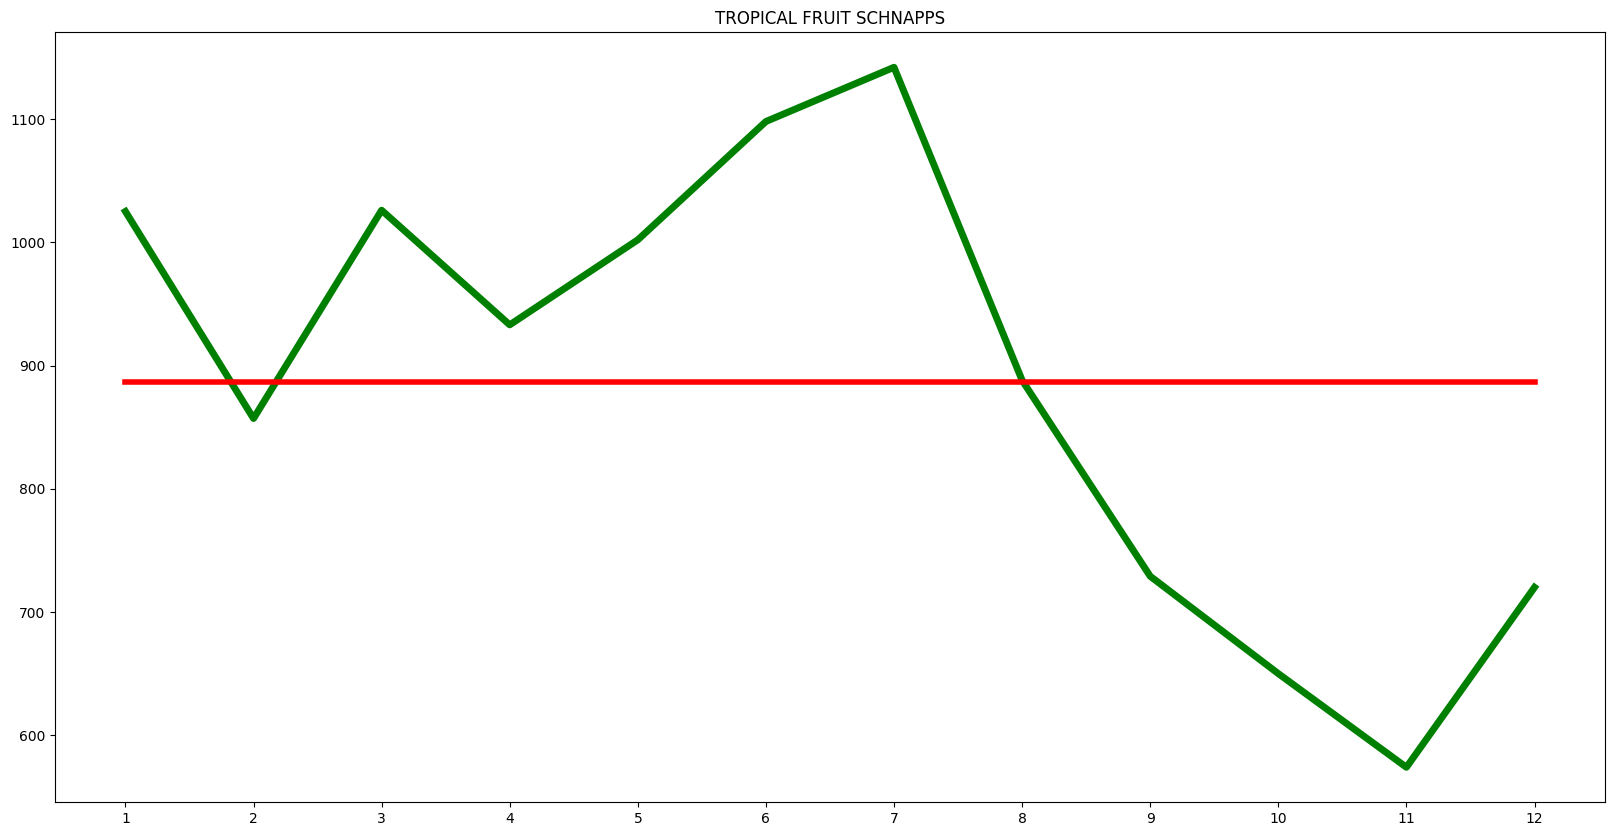

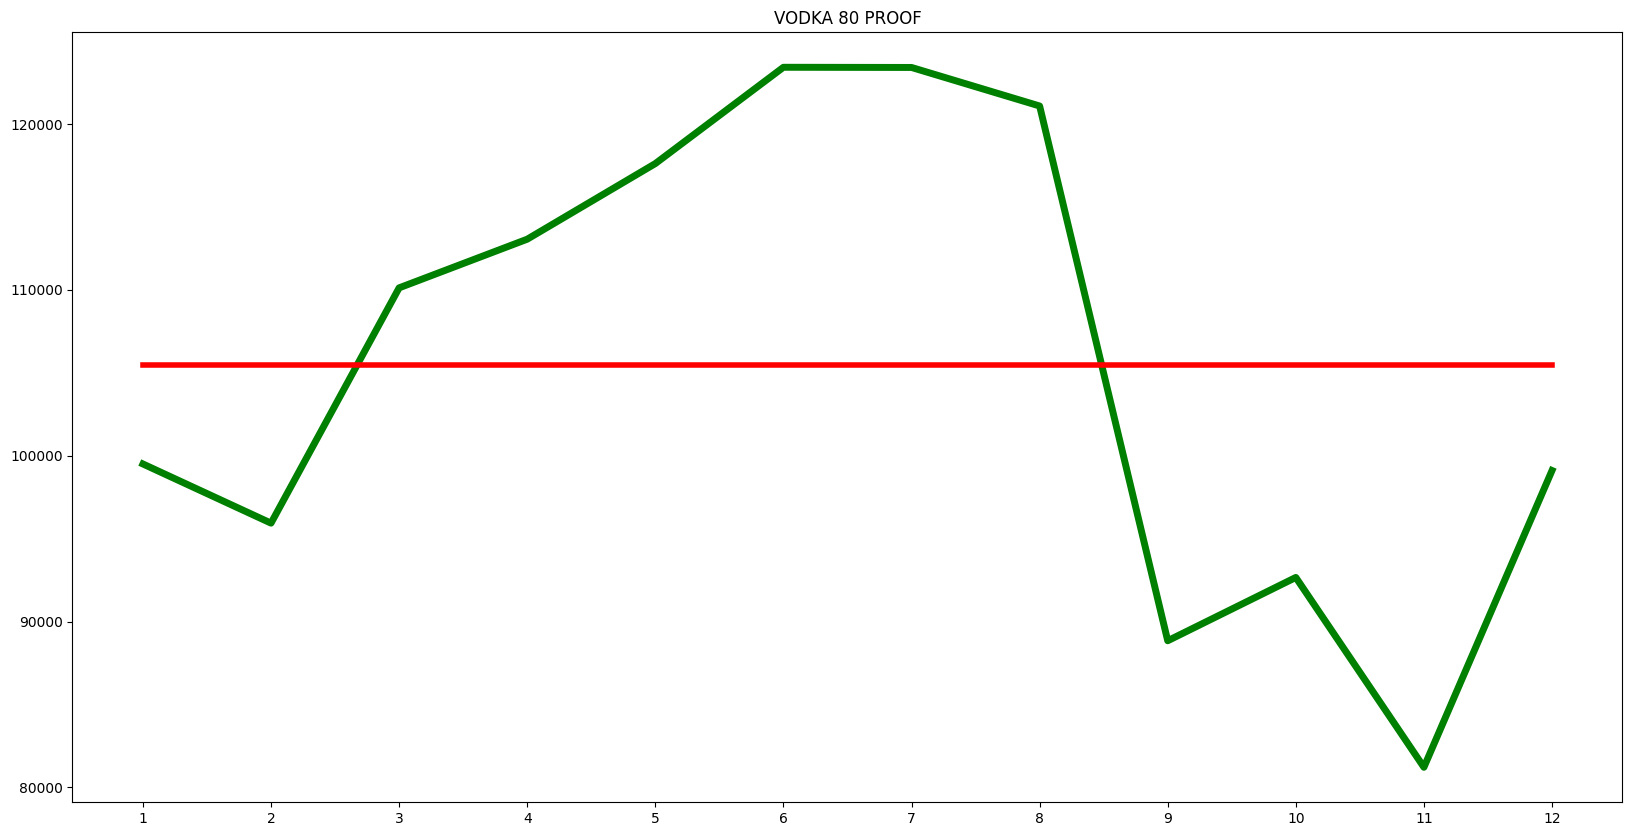

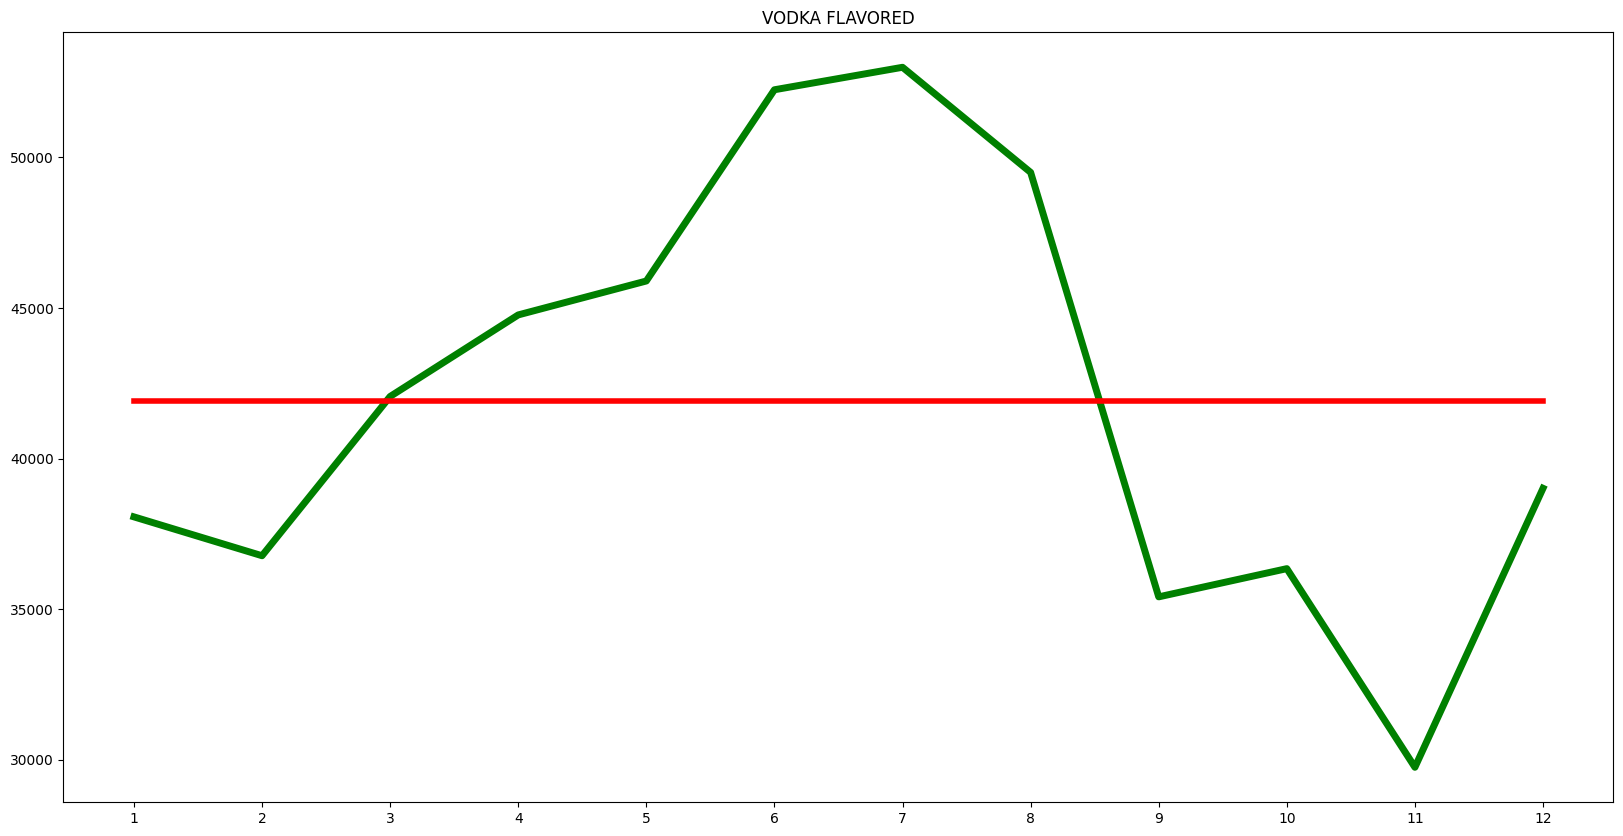

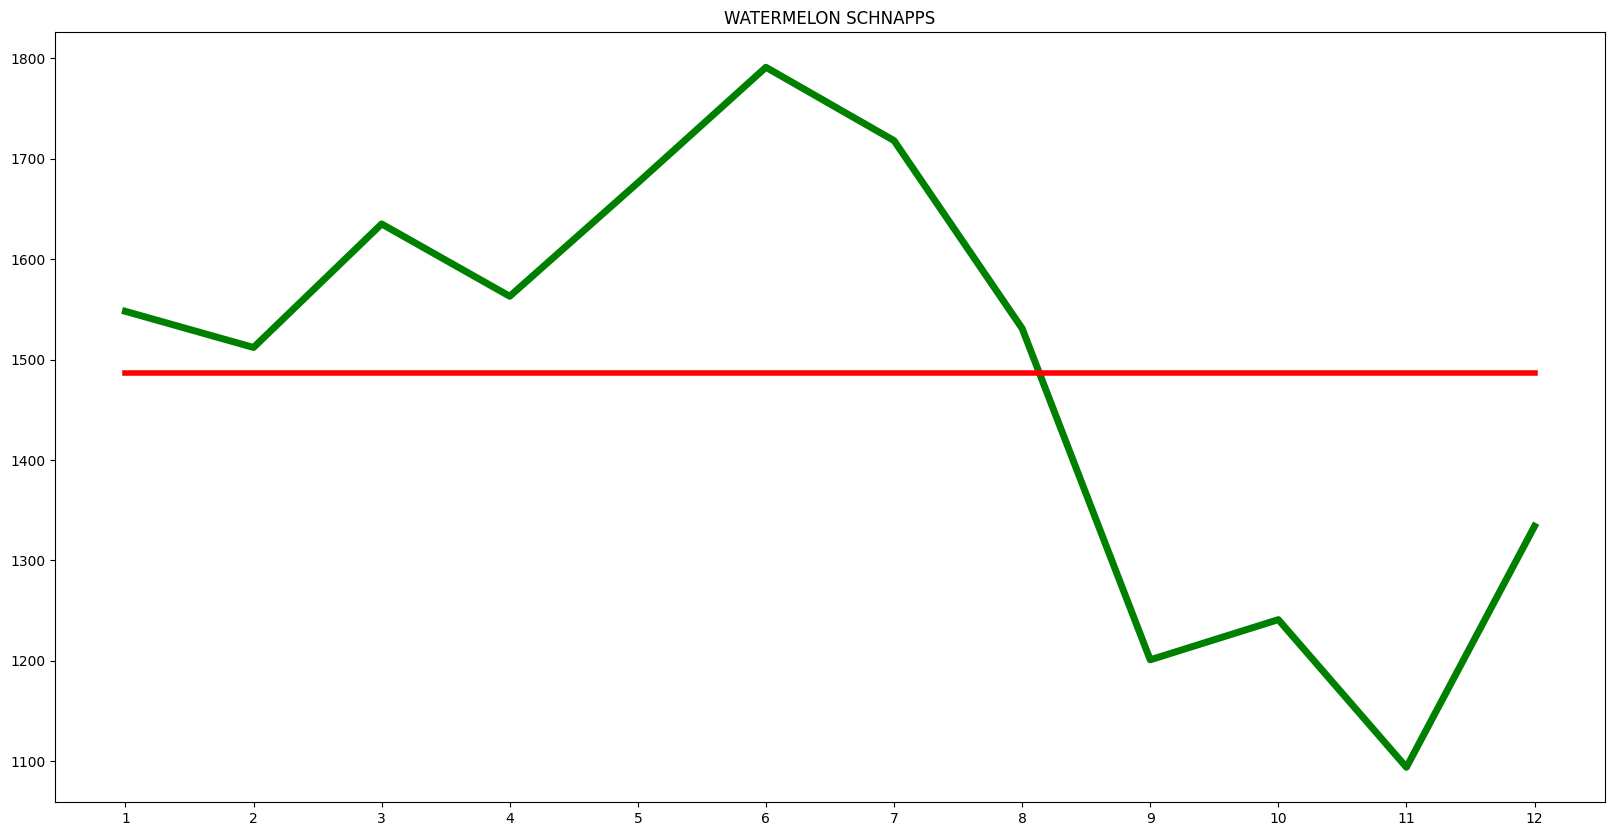

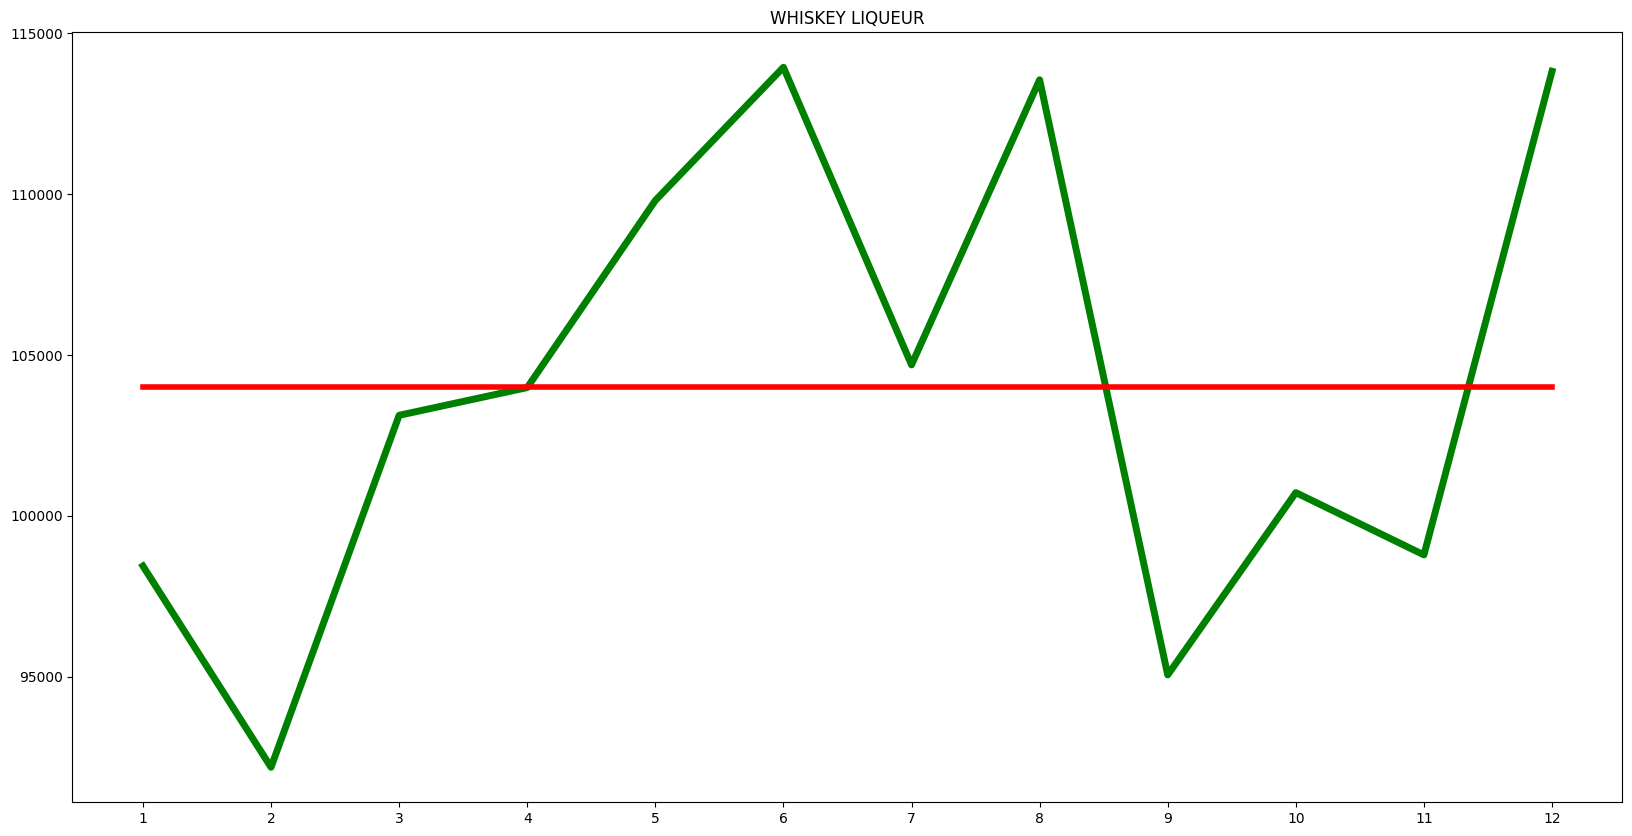

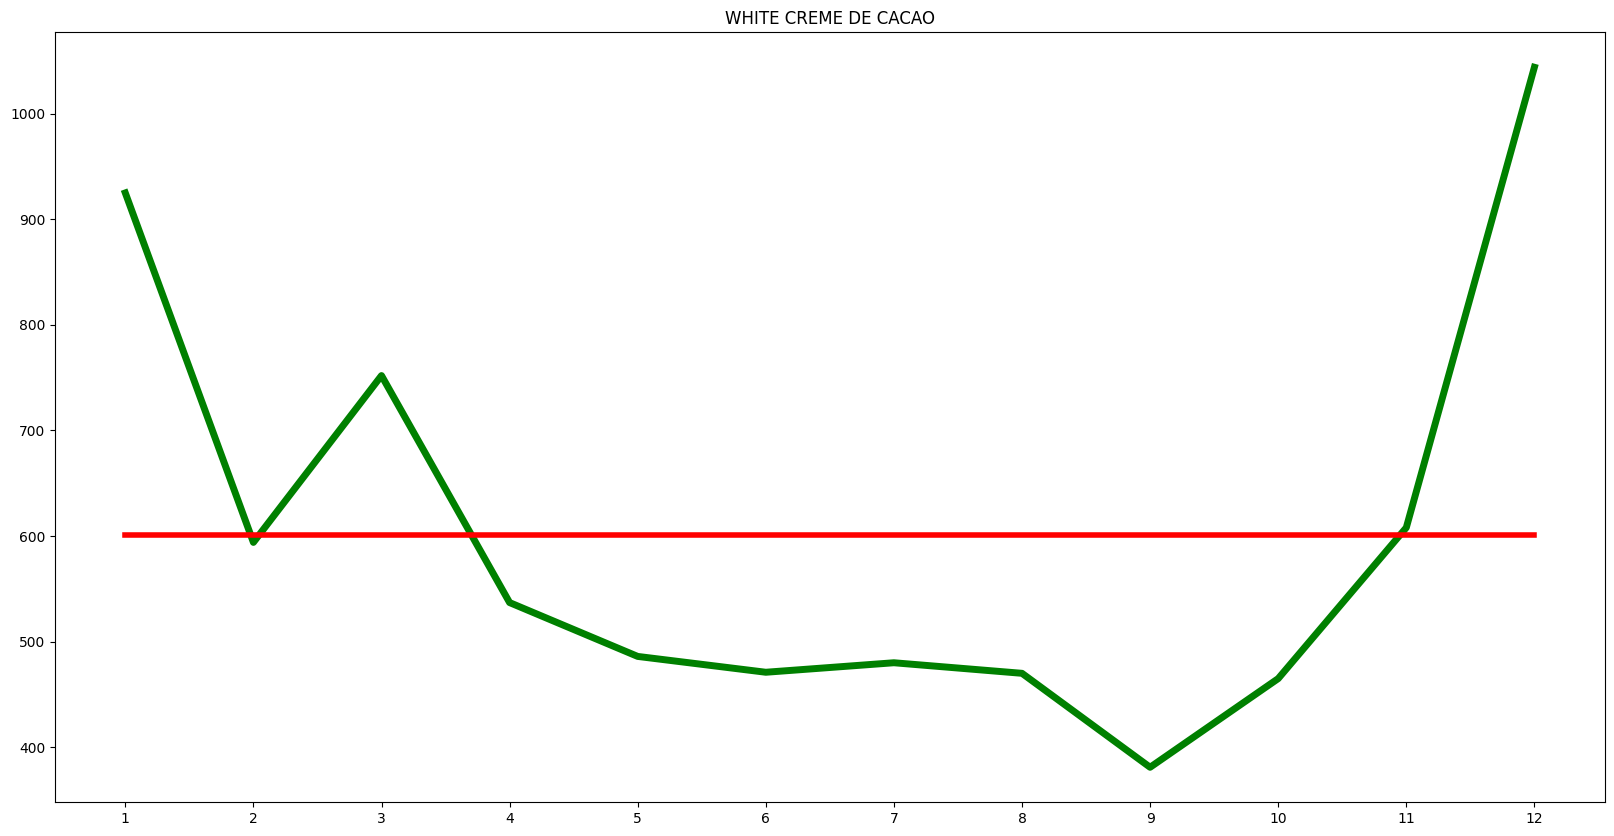

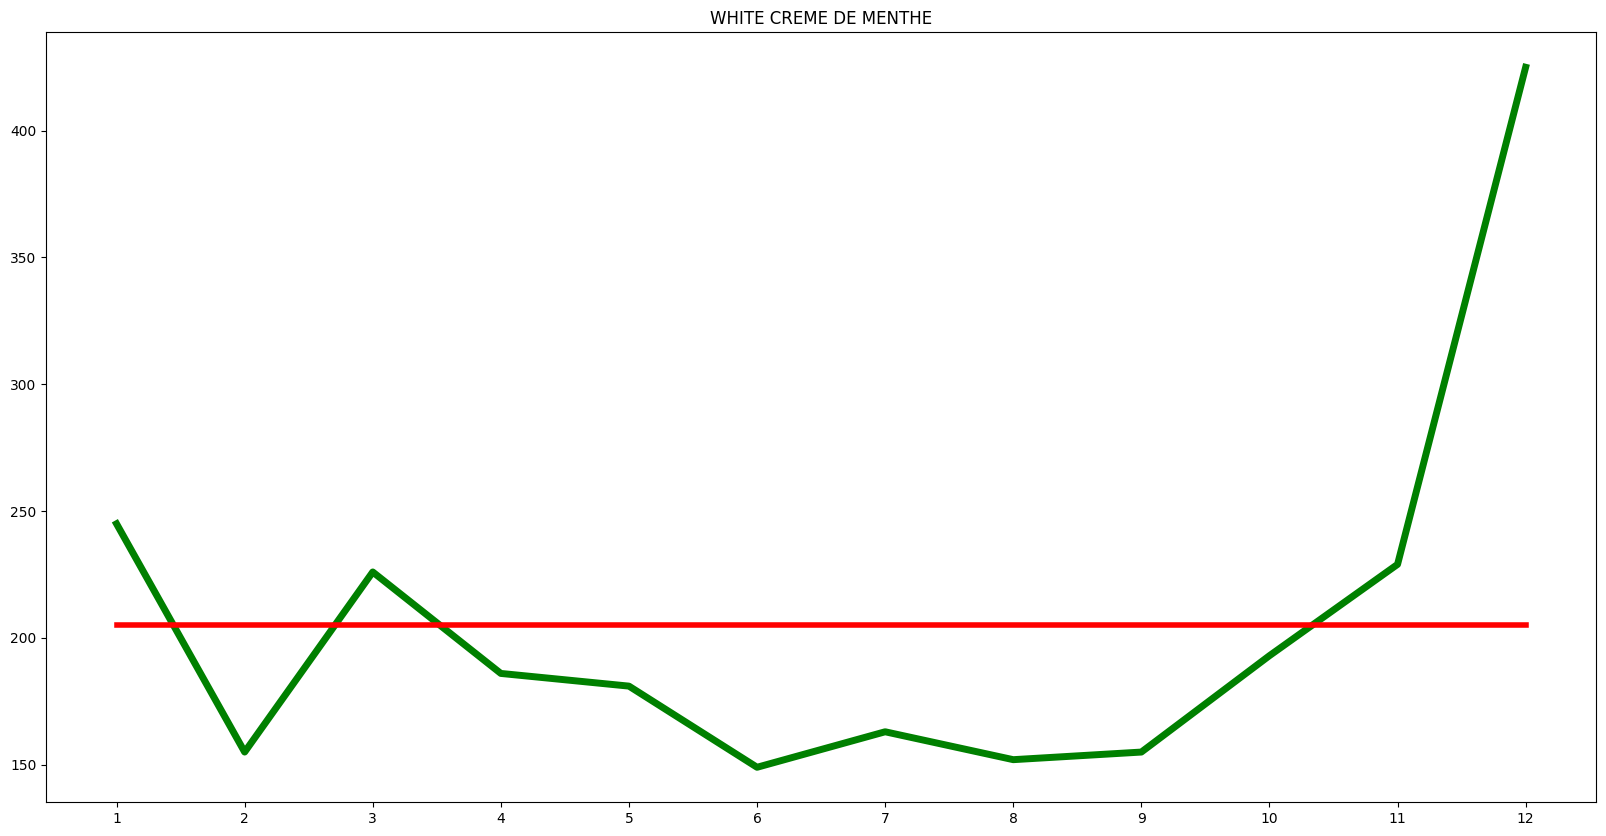

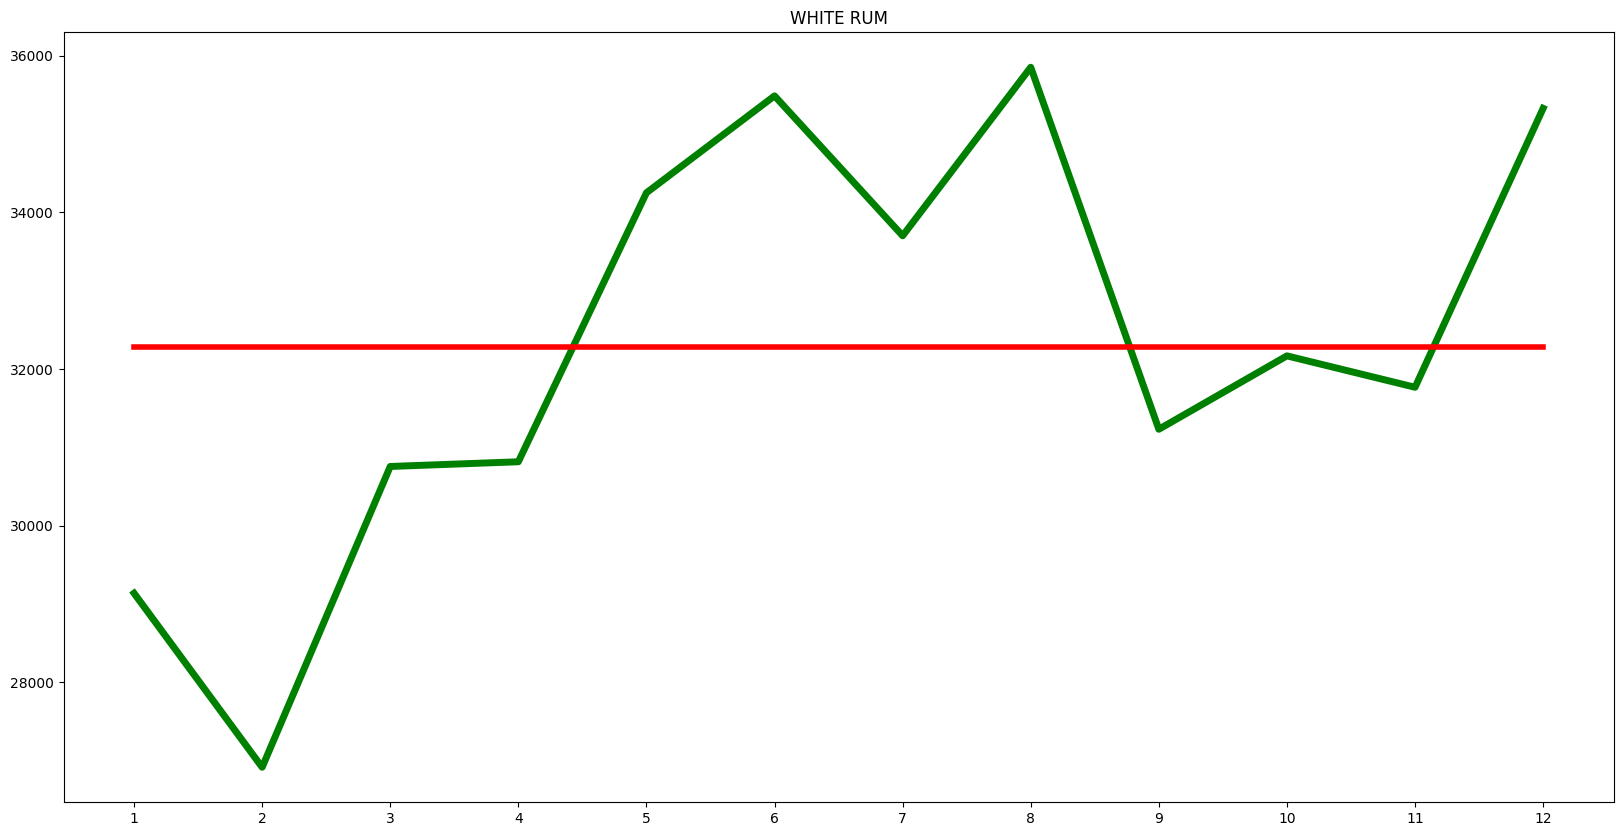

In [8]:
def show_sold_per_month(columnname):
    minyear = mindate.year
    maxyear = maxdate.year
    buwans = range(1,13)
    len_sales = [0,0,0,0,0,0,  0,0,0,0,0,0]
    for year in range(minyear,maxyear+1):
        now = soldpermonth.loc[str(year)]
        for month in range(1,13):
            try:
                len_sales[month-1] += (np.sum(now.loc[str('{}-{}'.format(year,month))][columnname]))
            except:
                len_sales[month-1] += 0
              
    plt.figure(figsize=(20,10))
    plt.title(columnname)
    plt.xticks(buwans)
    plt.plot(buwans, len_sales,color='green',linewidth =5)
    plt.plot(buwans,[np.mean(len_sales) for i in buwans], color='red',linewidth = 4)

        

for i in soldpermonth.columns:
    show_sold_per_month(i)

In [9]:
def make_table_demand_permonth():
    minyear = mindate.year
    maxyear = maxdate.year
    buwans = range(1,13)

    newdf = pd.DataFrame(
        columns=[
            # 'mean',                
            *soldpermonth.columns
        ]
    )

    for name in soldpermonth.columns:
        len_sales = [0,0,0,0,0,0,  0,0,0,0,0,0]

        for year in range(minyear,maxyear+1):
            now = soldpermonth.loc[str(year)]
            for month in range(1,13):
                try:
                    len_sales[month-1] += (np.sum(now.loc[str('{}-{}'.format(year,month))][name]))
                except:
                    len_sales[month-1] += 0
        newdf[name] = len_sales
    # newdf['mean'] = 
    return newdf


In [10]:
demands_per_month = make_table_demand_permonth()
demands_per_month

100 PROOF VODKA  100% AGAVE TEQUILA  AGED DARK RUM  AMARETTO - IMPORTED  \
0              8561               39646           3976                    9   
1             12144               38498           3460                    4   
2              7100               45832           3858                   17   
3              8170               48581           3813                   10   
4              7822               56754           4554                    5   
5              8335               55111           4808                   11   
6              8329               51079           4478                   12   
7              8124               54705           4449                   11   
8              7529               40554           3676                   10   
9              7923               42635           3870                    4   
10             6923               41205           4107                    7   
11             8164               49775           5412                    2   

    AMERICAN ALCOHOL  AMERICAN AMARETTO  AMERICAN BRANDIES  \
0               1840               4842              44378   
1               1678               4456              39288   
2               1615               4626              41379   
3               1597               4657              39862   
4               1775               4789              41856   
5               1852               4726              40353   
6               2088               4646              36650   
7               1962               4385              40706   
8               1937               3634              39161   
9               2583               3897              44172   
10              2255               3615              48093   
11              3169               5144              54332   

    AMERICAN COCKTAILS  AMERICAN CORDIALS & LIQUEURS  \
0                21529                         32764   
1                19889                         27654   
2                23204                         34797   
3                27643                         34133   
4                31188                         37825   
5                32337                         37842   
6                32177                         36055   
7                26767                         38021   
8                17587                         32183   
9                16519                         32936   
10               14432                         34266   
11               21423                         42996   

    AMERICAN DISTILLED SPIRITS SPECIALTY  ...  TEQUILA  TRIPLE SEC  \
0                                   3735  ...    32194        7883   
1                                   2999  ...    34048        7973   
2                                   3268  ...    37481        9280   
3                                   3578  ...    40297        9805   
4                                   3899  ...    44834       11937   
5                                   4839  ...    42159       11665   
6                                   3718  ...    43012       11588   
7                                   3553  ...    40035       10602   
8                                   3000  ...    28803        7491   
9                                   3689  ...    30540        7308   
10                                  3866  ...    25803        7124   
11                                  5067  ...    36092        8650   

    TROPICAL FRUIT SCHNAPPS  VODKA 80 PROOF  VODKA FLAVORED  \
0                      1025           99503           38062   
1                       857           95935           36771   
2                      1026          110121           42061   
3                       933          113055           44770   
4                      1002          117614           45897   
5                      1098          123420           52249   
6                      1142          123409           52996   
7                       8

In [11]:
def demand_per_month_labels():
    newdf = pd.DataFrame(
        columns=[
            'name',
            'mean',
            *range(1,13)
        ]
    )
    for i in demands_per_month.columns:
        colmean = np.mean(demands_per_month[i])
        newdf.loc[len(newdf)] = [
            i ,colmean,
            *[1 if i > colmean else 0  for i in demands_per_month[i]]
        ]


    return newdf
demand_label = demand_per_month_labels()
demand_label

name           mean  1  2  3  4  5  6  7  8  9  10  11  \
0          100 PROOF VODKA    8260.333333  1  1  0  0  0  1  1  0  0   0   0   
1       100% AGAVE TEQUILA   47031.250000  0  0  0  1  1  1  1  1  0   0   0   
2            AGED DARK RUM    4205.083333  0  0  0  0  1  1  1  1  0   0   0   
3      AMARETTO - IMPORTED       8.500000  1  0  1  1  0  1  1  1  1   0   0   
4         AMERICAN ALCOHOL    2029.250000  0  0  0  0  0  0  1  0  0   1   1   
..                     ...            ... .. .. .. .. .. .. .. .. ..  ..  ..   
98     WATERMELON SCHNAPPS    1487.000000  1  1  1  1  1  1  1  1  0   0   0   
99         WHISKEY LIQUEUR  104010.250000  0  0  0  0  1  1  1  1  0   0   0   
100   WHITE CREME DE CACAO     601.083333  1  0  1  0  0  0  0  0  0   0   1   
101  WHITE CREME DE MENTHE     204.916667  1  0  1  0  0  0  0  0  0   0   1   
102              WHITE RUM   32285.166667  0  0  0  0  1  1  1  1  0   0   0   

     12  
0     0  
1     1  
2     1  
3     0  
4     1  
..   ..  
98    0  
99    1  
100   1  
101   1  
102   1  

[103 rows x 14 columns]

In [13]:
def row_per_month():
    df = pd.DataFrame(
        columns=[*demands_per_month.columns]
    )
    for i in demands_per_month.columns:
        mean = np.mean(demands_per_month[i])
        df[i] = [1 if i > mean else 0 for i in demands_per_month[i]] 
    return df
row_per_month()

100 PROOF VODKA  100% AGAVE TEQUILA  AGED DARK RUM  AMARETTO - IMPORTED  \
0                 1                   0              0                    1   
1                 1                   0              0                    0   
2                 0                   0              0                    1   
3                 0                   1              0                    1   
4                 0                   1              1                    0   
5                 1                   1              1                    1   
6                 1                   1              1                    1   
7                 0                   1              1                    1   
8                 0                   0              0                    1   
9                 0                   0              0                    0   
10                0                   0              0                    0   
11                0                   1              1                    0   

    AMERICAN ALCOHOL  AMERICAN AMARETTO  AMERICAN BRANDIES  \
0                  0                  1                  1   
1                  0                  1                  0   
2                  0                  1                  0   
3                  0                  1                  0   
4                  0                  1                  0   
5                  0                  1                  0   
6                  1                  1                  0   
7                  0                  0                  0   
8                  0                  0                  0   
9                  1                  0                  1   
10                 1                  0                  1   
11                 1                  1                  1   

    AMERICAN COCKTAILS  AMERICAN CORDIALS & LIQUEURS  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    1                             0   
4                    1                             1   
5                    1                             1   
6                    1                             1   
7                    1                             1   
8                    0                             0   
9                    0                             0   
10                   0                             0   
11                   0                             1   

    AMERICAN DISTILLED SPIRITS SPECIALTY  ...  TEQUILA  TRIPLE SEC  \
0                                      0  ...        0           0   
1                                      0  ...        0           0   
2                                      0  ...        1           1   
3                                      0  ...        1           1   
4                                      1  ...        1           1   
5                                      1  ...        1           1   
6                                      0  ...        1           1   
7                                      0  ...        1           1   
8                                      0  ...        0           0   
9                                      0  ...        0           0   
10                                     1  ...        0           0   
11                                     1  ...        0           0   

    TROPICAL FRUIT SCHNAPPS  VODKA 80 PROOF  VODKA FLAVORED  \
0                         1               0               0   
1                         0               0               0   
2                         1               1               1   
3                         1               1               1   
4                         1               1               1   
5                         1               1               1   
6                         1               1               1   
7                        

In [14]:
def demand_per_month_labels():
    newdf = pd.DataFrame(
        columns=[
            'name',
            'mean',
            *range(1,13)
        ]
    )
    for i in demands_per_month.columns:
        colmean = np.mean(demands_per_month[i])
        newdf.loc[len(newdf)] = [
            i ,colmean,
            *[1 if i > colmean else 0  for i in demands_per_month[i]]
        ]


    return newdf
demand_label = demand_per_month_labels()
demand_label

name           mean  1  2  3  4  5  6  7  8  9  10  11  \
0          100 PROOF VODKA    8260.333333  1  1  0  0  0  1  1  0  0   0   0   
1       100% AGAVE TEQUILA   47031.250000  0  0  0  1  1  1  1  1  0   0   0   
2            AGED DARK RUM    4205.083333  0  0  0  0  1  1  1  1  0   0   0   
3      AMARETTO - IMPORTED       8.500000  1  0  1  1  0  1  1  1  1   0   0   
4         AMERICAN ALCOHOL    2029.250000  0  0  0  0  0  0  1  0  0   1   1   
..                     ...            ... .. .. .. .. .. .. .. .. ..  ..  ..   
98     WATERMELON SCHNAPPS    1487.000000  1  1  1  1  1  1  1  1  0   0   0   
99         WHISKEY LIQUEUR  104010.250000  0  0  0  0  1  1  1  1  0   0   0   
100   WHITE CREME DE CACAO     601.083333  1  0  1  0  0  0  0  0  0   0   1   
101  WHITE CREME DE MENTHE     204.916667  1  0  1  0  0  0  0  0  0   0   1   
102              WHITE RUM   32285.166667  0  0  0  0  1  1  1  1  0   0   0   

     12  
0     0  
1     1  
2     1  
3     0  
4     1  
..   ..  
98    0  
99    1  
100   1  
101   1  
102   1  

[103 rows x 14 columns]

In [39]:
x = pd.DataFrame(
    columns=['jan','feb','mar','apr','may','jun','jul','aug', 'sept', 'oct', 'nov', 'dev'],
    data=[[1 if x == i else 0 for i in range(0,12)] for x in range(0,12)]
)
y = row_per_month()
def ytolist():
    return [y.loc[i].tolist() for i in range(0,len(y))]
# x['labels'] = ytolist()

In [50]:
x

jan  feb  mar  apr  may  jun  jul  aug  sept  oct  nov  dev
0     1    0    0    0    0    0    0    0     0    0    0    0
1     0    1    0    0    0    0    0    0     0    0    0    0
2     0    0    1    0    0    0    0    0     0    0    0    0
3     0    0    0    1    0    0    0    0     0    0    0    0
4     0    0    0    0    1    0    0    0     0    0    0    0
5     0    0    0    0    0    1    0    0     0    0    0    0
6     0    0    0    0    0    0    1    0     0    0    0    0
7     0    0    0    0    0    0    0    1     0    0    0    0
8     0    0    0    0    0    0    0    0     1    0    0    0
9     0    0    0    0    0    0    0    0     0    1    0    0
10    0    0    0    0    0    0    0    0     0    0    1    0
11    0    0    0    0    0    0    0    0     0    0    0    1

In [122]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12)),
    tf.keras.layers.Dense(103),
    tf.keras.layers.Dense(len(y.columns),activation='sigmoid'),
])


In [123]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryCrossentropy()
)

In [124]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 103)               1339      
                                                                 
 dense_47 (Dense)            (None, 103)               10712     
                                                                 
Total params: 12051 (47.07 KB)
Trainable params: 12051 (47.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model.fit(x = x,y = row_per_month(), epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 428ms/step - loss: 0.6930 - binary_crossentropy: 0.6930
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6909 - binary_crossentropy: 0.6909
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6888 - binary_crossentropy: 0.6888
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6866 - binary_crossentropy: 0.6866
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6845 - binary_crossentropy: 0.6845
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6824 - binary_crossentropy: 0.6824
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6802 - binary_crossentropy: 0.6802
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6781 - binary_crossentropy: 0.6781
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6760 - binary_crossentropy: 0.6760
Epoch 10/10
1/1 [==================

In [109]:
input = 0
res = model.predict([x.loc[0].tolist()])
print('{:<40} {:<40} {:<40}'.format('predicted','input','actual'))
for i in range(0,len(res[0])):
    print('{:<40} {:<40} {:<40}'.format(res[0][i],x.to_numpy()[input][i] , y.to_numpy()[input][i]))


1/1 [==============================] - 0s 56ms/step
predicted                                input                                    actual                                  
0.349672794342041                        1                                        1                                       
0.4936881959438324                       0                                        0                                       
0.387023001909256                        0                                        0                                       
0.6978150606155396                       0                                        1                                       
0.3620000183582306                       0                                        0                                       
0.7651408314704895                       0                                        1                                       
0.32593077421188354                      0                                        1    

IndexError: index 12 is out of bounds for axis 0 with size 12